# workflow
## resolutions : 1x1x1,
### A. prepare original images
1. copy original images of T1gd, flair and T2

2. convert the original images to float images, names it "unitno_sequence_original2.nii.gz")

### C. 1x1x1 resolution - registration

###### using t1gd as template

###### 1. resample t1gd_original_float to 1x1x1 resolution, using MIPAV -> name it t1gd_iso_mipav  
###### 2-1 . (main flow) FSL : register t2_original / flair_original -> t1gd_iso_mipav  / flair_iso_mipav -> t1gd_iso_mipav  -> name it t2_iso_fslregi /flair_isoregi
###### 2-1 . (error cases) MIPAV : register t2_original / flair_original -> t1gd_iso_mipav  / flair_iso_mipav -> t1gd_iso_mipav  -> name it t2_iso_mipavregi /flair_iso_mipavregi

###### 2-3. check presence of FSL matrix / MIPAV matrix -> replace FSL-error cases with MIPAV registration

### D. skull stripping and N4 bias correction 
###### 1. Skull stripping on t1gd_iso_mipav -> apply bet_mask to t2_iso and flair_iso
###### 2. N4 bias correction 

### E. SI normalization, using skull_stripped iso_files from D-2.

### F. 3D wavelet transfomration

### G. 3D feature extraction

### A. prepare original images

In [1]:
import os
import pandas as pd
import shutil

rootpath_work = '/media/baon/baondata/0_research/glioma/images_since201806/'
os.chdir(rootpath_work)

from nipype.interfaces.ants import N4BiasFieldCorrection
from nipype.interfaces.fsl import BET, ApplyMask, ApplyXFM, ConvertXFM, BinaryMaths, ChangeDataType, MultiImageMaths

import SimpleITK as sitk

import numpy as np
import subprocess


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
total_list=pd.read_csv('Glioma_newlist_20190803.csv')
ptlist = total_list.iloc[ : ,0]

ptlist = pd.Series.tolist(ptlist)
print ptlist
print len(ptlist)

[8651745, 8662383, 8367857, 8662140, 2199443, 2651403, 8667969, 8670769, 8674019, 8073224, 8591024, 2826490, 8695364, 8674642, 8706749, 4199579, 8681862, 5240823, 8665561, 8677482, 8689350, 5707163, 8700503, 8703032, 6387205, 8706872, 8708423, 5324864, 8712318, 8674335, 8716628, 1974254, 8428954, 8725351, 5201788, 8099788, 8736479, 8736560, 824746, 8737593, 8712859, 8739559, 8664725, 8738465, 8750462, 8759304, 2937634, 8760750, 5916614, 4250762, 8762020, 8492896, 8764673, 5005671, 8770899, 8747465, 6924364, 8751259, 8766728, 7471985, 8778106, 8774660, 3679945, 8618840, 8762435, 9111662, 3876719, 9114379, 8791061, 8794394, 8789281, 8265280, 8789172, 8802114, 8785065, 8804407, 8808228, 8807522, 8810109, 8813259, 8836614, 9129785, 8822634, 8813188, 8806604, 8817904, 8817785, 8820008, 8819807, 8807774, 8254998, 8774903, 2639805, 8798506, 8824601, 8832580, 5245460, 8798205, 8831117, 8410701, 8815190, 8820728, 8825354, 8834587, 7192448, 8844070, 8356288, 8841826, 8849350, 8850132, 8852436, 8

##### copy folder structures
rootpath = '/media/baon/baondata/0_research/glioma/images_mipav_noskull3/'
rootpath2 = rootpath_work

for root, dir, file in os.walk(rootpath):
    folder_name = root[len(rootpath):]
    folder_fullname = os.path.join(rootpath2, folder_name)
    if os.path.exists(folder_fullname):
        print (folder_fullname)
        continue
    else :
        print (folder_fullname)
        os.makedirs(folder_fullname)

### copy source files



sequences = ['t1pre', 't1gd', 't2','flair', 'flair_pre']

for unitno in ptlist:
    for seq in sequences:
        src_path = os.path.join('/media/baon/baondata2/0_dcm_source/0_5_nifti_glioma_original',seq, '%s_%s_original2.nii.gz'%(unitno,seq))
        trg_path = os.path.join(rootpath_work, seq, 'original')
        if os.path.isfile(src_path):
            shutil.move(src_path, trg_path)
            



## Define file names - B. 1x1x1 registration

In [3]:
### original files 

def t1gd_original(unitno):
    t1gd_original = os.path.join('t1gd/original/%s_t1gd_original2.nii.gz' % (unitno))
    return t1gd_original

def t2_original(unitno):
    t2_original = os.path.join('t2/original/%s_t2_original2.nii.gz' % (unitno))
    return t2_original

def flair_original(unitno):
    flair_original = os.path.join('flair/original/%s_flair_original2.nii.gz' % (unitno))
    return flair_original


def t1pre_original(unitno):
    t1pre_original = os.path.join('t1pre/original/%s_t1pre_original2.nii.gz' % (unitno))
    return t1pre_original

#t1gd


    
def t1gd_iso_mipav(unitno): 
    t1gd_iso_mipav = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_mipav.nii.gz' % (unitno))
    return t1gd_iso_mipav


def t1gd_iso(unitno): 
    t1gd_iso = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso.nii.gz' % (unitno))
    return t1gd_iso


def t1gd_iso_fslregi(unitno): 
    t1gd_iso_fslregi = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_fslregi.nii.gz' % (unitno))
    return t1gd_iso_fslregi


def t1gd_iso_mipavregi(unitno): 
    t1gd_iso_mipavregi = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_mipavregi.nii.gz' % (unitno))
    return t1gd_iso_mipavregi

# t1pre

def t1pre_iso_mipav(unitno): 
    t1pre_iso_mipav = os.path.join('t1pre/t1pre_iso/%s_t1pre_iso_mipav.nii.gz' % (unitno))
    return t1pre_iso_mipav


def t1pre_iso(unitno): 
    t1pre_iso = os.path.join('t1pre/t1pre_iso/%s_t1pre_iso.nii.gz' % (unitno))
    return t1pre_iso


def t1pre_iso_fslregi(unitno): 
    t1pre_iso_fslregi = os.path.join('t1pre/t1pre_iso/%s_t1pre_iso_fslregi.nii.gz' % (unitno))
    return t1pre_iso_fslregi


def t1pre_iso_mipavregi(unitno): 
    t1pre_iso_mipavregi = os.path.join('t1pre/t1pre_iso/%s_t1pre_iso_mipavregi.nii.gz' % (unitno))
    return t1pre_iso_mipavregi

#t2

def t2_iso(unitno): 
    t2_iso = os.path.join('t2/t2_iso/%s_t2_iso.nii.gz' % (unitno))
    return t2_iso


def t2_iso_fslregi(unitno): 
    t2_iso_fslregi = os.path.join('t2/t2_iso/%s_t2_iso_fslregi.nii.gz' % (unitno))
    return t2_iso_fslregi



def t2_iso_mipavregi(unitno): 
    t2_iso_mipavregi = os.path.join('t2/t2_iso/%s_t2_iso_mipavregi.nii.gz' % (unitno))
    return t2_iso_mipavregi




#flair


def flair_iso(unitno): 
    flair_iso = os.path.join('flair/flair_iso/%s_flair_iso.nii.gz' % (unitno))
    return flair_iso


def flair_iso_fslregi(unitno): 
    flair_iso_fslregi = os.path.join('flair/flair_iso/%s_flair_iso_fslregi.nii.gz' % (unitno))
    return flair_iso_fslregi


def flair_iso_mipavregi(unitno): 
    flair_iso_mipavregi = os.path.join('flair/flair_iso/%s_flair_iso_mipavregi.nii.gz' % (unitno))
    return flair_iso_mipavregi


### matrix for C.1x1x1 registration

In [4]:



## matrix from FSL
def matrix_t22t1gd_iso_fsl(unitno):
    matrix_t22t1gd_iso_fsl = os.path.join('matrix/matrix_t22t1gd_iso_fsl/matrix_%s_t22t1gd_iso_fsl.mat' % (unitno))
    return matrix_t22t1gd_iso_fsl
    

def matrix_flair2t1gd_iso_fsl(unitno):
    matrix_flair2t1gd_iso_fsl = os.path.join('matrix/matrix_flair2t1gd_iso_fsl/matrix_%s_flair2t1gd_iso_fsl.mat' % (unitno))
    return matrix_flair2t1gd_iso_fsl

def matrix_t1pret1gd_iso_fsl(unitno):
    matrix_t1pre2t1gd_iso_fsl = os.path.join('matrix/matrix_t1pre2t1gd_iso_fsl/matrix_%s_t1pre2t1gd_iso_fsl.mat' % (unitno))
    return matrix_t1pre2t1gd_iso_fsl
    
    
    
## matrix from mipav
def matrix_t22t1gd_iso_mipav(unitno):
    matrix_t22t1gd_iso_mipav = os.path.join('matrix/matrix_t22t1gd_iso_mipav/matrix_%s_t22t1gd_iso_mipav.mat' % (unitno))
    return matrix_t22t1gd_iso_mipav
    

def matrix_flair2t1gd_iso_mipav(unitno):
    matrix_flair2t1gd_iso_mipav = os.path.join('matrix/matrix_flair2t1gd_iso_mipav/matrix_%s_flair2t1gd_iso_mipav.mat' % (unitno))
    return matrix_flair2t1gd_iso_mipav
    
def matrix_t1pre2t1gd_iso_mipav(unitno):
    matrix_t1pret1gd_iso_mipav = os.path.join('matrix/matrix_t1pre2t1gd_iso_mipav/matrix_%s_t1pre2t1gd_iso_mipav.mat' % (unitno))
    return matrix_t1pre2t1gd_iso_mipav

## multiproc for no table

In [5]:

from multiprocessing import Process, Queue
## parallel computing


def func_multiproc(image_functions): # ex> func_multiproc['func_mipav_resampling', ...]

    for n in range(len(image_functions)):

        def image_process(k,l):
            eval(image_functions[n])(k,l)  

        print('\n\n\n\n%s'%image_functions[n])
        if __name__ == '__main__' :
            proc_list = []
            
            core_no = 25  ## number of cores to assign
            pt_core = int(round(len(ptlist)/core_no))  ## number of patients per core
            
            for i in range(core_no - 1) :
                proc_list.append(Process(target=image_process, args= ((pt_core)*(i), (pt_core)*(i+1))))

            proc_list.append(Process(target=image_process, args= ((pt_core)*(core_no - 1), len(ptlist))))

            for proc in proc_list :
                proc.start()

            for proc in proc_list :
                proc.join()

## multiproc for table output

In [6]:

from multiprocessing import Process, Queue
## parallel computing


def func_multi_table(image_functions): # ex> func_multiproc['func_mipav_resampling', ...]
    for n in range(len(image_functions)):

        def image_process(k,l,result):
            eval(image_functions[n])(k,l,result)  

        print('\n\n\n\n%s'%image_functions[n])
        if __name__ == '__main__' :

            core_no = 25  ## number of cores to assign
            pt_core = int(round(len(ptlist)/core_no))  ## number of patients per core

            result_list = []
            for i in range(core_no) :
                result_list.append (Queue())

            proc_list = []
            for i in range(core_no-1) :
                proc_list.append(Process(target=image_process, args= ((pt_core)*(i), (pt_core)*(i+1), result_list[i])))
            proc_list.append(Process(target=image_process, args= ((pt_core)*(core_no-1), len(ptlist), result_list[core_no-1])))

            for proc in proc_list :
                proc.start()

            M = []
            print "ready to get"


            for result in result_list:
                M.append(result.get())
                result.close()

            for proc in proc_list :
                proc.join()

            print "ready to concatenate"

            df_total = pd.DataFrame()

            for m in M:
                df_total = pd.concat([df_total, m], axis = 0)

            print "concatenation done"
                #df_radiomics_total.to_csv('lowerGG_DL_CNN_texture_20180410.csv')
    return df_total
    

#### A-2. make sure data type = float 32bit

In [14]:
from nipype.interfaces.fsl.maths import ChangeDataType
import os
import SimpleITK as sitk

type0 = "32-bit float_32-bit float_32-bit float"

def func_check_datatype(k,l):
    for i in range(k,l):
        unitno = ptlist[i]
        if os.path.isfile(t1pre_original(unitno)):
            if os.path.isfile(flair_original(unitno)):
                image_t2 = sitk.ReadImage(t2_original(unitno))
                image_t1gd = sitk.ReadImage(t1gd_original(unitno))
                image_flair = sitk.ReadImage(flair_original(unitno))
                image_t1pre = sitk.ReadImage(t1pre_original(unitno))

                type_t1pre = image_t1pre.GetPixelIDTypeAsString()
                type_t1gd = image_t1gd.GetPixelIDTypeAsString()
                type_t2  = image_t2.GetPixelIDTypeAsString()
                type_flair  = image_flair.GetPixelIDTypeAsString()
                type = "%s_%s_%s_%s"%(type_t1pre, type_t1gd, type_t2, type_flair)
                if type != '32-bit float_32-bit float_32-bit float_32-bit float':
                    print "*******************%s_%s_ %s" %(i, unitno, type)
                #else:
                #    print "%s_%s_ %s" %(i, unitno, type)
            else : 
                image_t2 = sitk.ReadImage(t2_original(unitno))
                image_t1gd = sitk.ReadImage(t1gd_original(unitno))
                image_t1pre = sitk.ReadImage(t1pre_original(unitno))

                type_t1pre = image_t1pre.GetPixelIDTypeAsString()
                type_t1gd = image_t1gd.GetPixelIDTypeAsString()
                type_t2  = image_t2.GetPixelIDTypeAsString()

                type = "%s_%s_%s"%(type_t1pre, type_t1gd, type_t2)
                if type != '32-bit float_32-bit float_32-bit float':
                    print "*******************%s_%s_ %s" %(i, unitno, type)
                #else:
                #    print "%s_%s_ %s" %(i, unitno, type)


In [15]:
func_multiproc(['func_check_datatype'])






func_check_datatype


#### A-2. check original resolution

In [ ]:
from nipype.interfaces.fsl import ImageStats
import numpy as np

sequences = ['t1gd', 't2', 'flair']

def func_orig_resolution(k,l):  
    df_res = pd.DataFrame()
    df_res_sub = pd.DataFrame()
    
    for i in range(k,l):
        unitno = ptlist[i]
        print(unitno)
        df_res_sub['unitno'] = pd.Series(unitno)
        
        for seq in sequences : 
            image_name = "%s_original" % seq
            if os.path.isfile(eval(image_name)(unitno)):
                image = sitk.ReadImage(eval(image_name)(unitno))
                spacing = image.GetSpacing()
                res_xy = spacing[0]
                res_z = spacing[2]
            else : 
                res_xy = np.NaN
                res_z = np.NaN
            df_res_sub['%s_xy'%seq] = pd.Series(res_xy)
            df_res_sub['%s_z'%seq] = pd.Series(res_z)
        
        df_res = pd.concat([df_res, df_res_sub], axis = 0, sort = False) 
    return df_res

def func_orig_resolution2(k,l,result):
    df = func_orig_resolution(k,l)
    result.put(df)
    return



In [35]:
table_orig_resolution = func_multi_table(['func_orig_resolution2'])






func_orig_resolution2
8651745
2199443
8674019
8695364
8681862
8689350
6387205
8712318
8428954
8736479
8712859
8750462
5916614
8764673
6924364
8778106
8762435
8789172
8791061
8808228
8836614
8806604
8819807
2639805
5245460
ready to get


KeyboardInterrupt: 

Process Process-91:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-32-884ca27f09c2>", line 10, in image_process
    eval(image_functions[n])(k,l,result)
  File "<ipython-input-34-0b5a3abf3875>", line 32, in func_orig_resolution2
    df = func_orig_resolution(k,l)
  File "<ipython-input-34-0b5a3abf3875>", line 18, in func_orig_resolution
    image = sitk.ReadImage(eval(image_name)(unitno))
  File "/home/baon/.local/lib/python2.7/site-packages/SimpleITK/SimpleITK.py", line 8332, in ReadImage
    return _SimpleITK.ReadImage(*args)
KeyboardInterrupt
Process Process-92:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run


    df = func_orig_resolution(k,l)
  File "<ipython-input-34-0b5a3abf3875>", line 18, in func_orig_resolution
    image = sitk.ReadImage(eval(image_name)(unitno))
  File "/home/baon/.local/lib/python2.7/site-packages/SimpleITK/SimpleITK.py", line 8332, in ReadImage
    return _SimpleITK.ReadImage(*args)
KeyboardInterrupt
Process Process-106:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-32-884ca27f09c2>", line 10, in image_process
    eval(image_functions[n])(k,l,result)
  File "<ipython-input-34-0b5a3abf3875>", line 32, in func_orig_resolution2
    df = func_orig_resolution(k,l)
  File "<ipython-input-34-0b5a3abf3875>", line 18, in func_orig_resolution
    image = sitk.ReadImage(eval(image_name)(unitno))
  File "/home/baon/.local/lib/python2.7/site-packages/Simpl

    self._target(*self._args, **self._kwargs)
  File "<ipython-input-32-884ca27f09c2>", line 10, in image_process
    eval(image_functions[n])(k,l,result)
  File "<ipython-input-34-0b5a3abf3875>", line 32, in func_orig_resolution2
    df = func_orig_resolution(k,l)
  File "<ipython-input-34-0b5a3abf3875>", line 18, in func_orig_resolution
    return _SimpleITK.ReadImage(*args)
    image = sitk.ReadImage(eval(image_name)(unitno))
KeyboardInterrupt
  File "/home/baon/.local/lib/python2.7/site-packages/SimpleITK/SimpleITK.py", line 8332, in ReadImage
    return _SimpleITK.ReadImage(*args)
KeyboardInterrupt
Process Process-99:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-32-884ca27f09c2>", line 10, in image_process
    eval(image_functions[n])(k,l,result)
  File "<ip

table_orig_resolution.to_csv('tglioma_original_resolution_20181022.csv')

#### A-2. reorient  to RADIOLOCIAL coordinate (not NEUROLOGICAL)

In [18]:
sequences = ['t1pre','t1gd', 't2', 'flair']
sequences = ['t1pre']

def func_check_reorient(k,l):
    for i in range(k,l):
        unitno = ptlist[i]
        #print(unitno)
        for seq in sequences:    
            if os.path.isfile('%s/original/%s_%s_original2.nii.gz'% (seq, unitno, seq)):
                command = 'fslorient -getorient %s/original/%s_%s_original2.nii.gz'% (seq, unitno, seq)
                get_coord_old =  subprocess.Popen(command, stdout=subprocess.PIPE, stderr=None, shell=True)
                coord_old = get_coord_old.communicate()[0]
                

                if coord_old=='NEUROLOGICAL\n':    
                    print("%s_%s_%s" %(unitno, seq, coord_old))
                #    os.system('fslswapdim %s/original/%s_%s_original2.nii.gz -x y z %s/original/%s_%s_original2.nii.gz' % (seq, unitno, seq, seq, unitno, seq))
                #    os.system('fslorient -forceradiological %s/original/%s_%s_original2.nii.gz' % (seq, unitno, seq))
                    
            #else:
                #print("%s_%s_no file"% (unitno, seq))


In [19]:
func_multiproc(['func_check_reorient'])





func_check_reorient



#### B /C. generate MIPAV script for resampling to 1x1x1

In [11]:
sequences = ['t1gd']

def func_generate_mipav_script(k,l):
    for i in range(k,l):
        for seq in sequences : 
            unitno = ptlist[i]
            print(unitno)
            image_name = "%s_original" % seq
            if os.path.isfile(eval(image_name)(unitno)):
                image = sitk.ReadImage(eval(image_name)(unitno))
                size = image.GetSize()
                spacing = image.GetSpacing()

                fovx = size[0] * spacing[0]
                fovy = size[1] * spacing[1]
                fovxy = max(fovx, fovy)
                fovz = size[2] * spacing[2]

   

                ### 111 resampling

                dimxy = int(round(fovxy/1.0))
                dimz = int(round(fovz/1.0))


                f= open(os.path.join('./matrix/mipav_resampling/mipav_sct_%s_111_%s.sct' % (seq, unitno)),"w+")
                f.write("""ScriptableTransform("input_image_1 ext_image $image1", "interpolation_type int 0",\
                "constant_fov int 1", "do_transform_VOIs boolean false", "do_clip_output boolean true",\
                "do_rotate_about_center boolean false", "do_talairach_transform boolean false",\
                "use_scanner_center boolean false", "do_invert_matrix boolean false",\
                "do_process_in_2.5D boolean false", "do_update_origin boolean true",\
                "do_pad boolean false", "out_of_bounds_index int 0", "fill_value float 0.0",\
                "transform_source string none", "resample_type string to_user",\
                "output_res list_float 1.0,1.0,1.0", "output_dim list_int %s,%s,%s")
                SaveImageAs("input_image_1 image $image2", ""file_type string .nii.gz")"""%(dimxy, dimxy, dimz))
                f.close()


           

In [12]:
func_multiproc(['func_generate_mipav_script'])





func_generate_mipav_script
8651745
2199443
8674019
8695364
8681862
8689350
6387205
8712318
8428954
8736479
8712859
8750462
5916614
8764673
6924364
8778106
8762435
8791061
8789172
8808228
8836614
8806604
8819807
2639805
5245460
5707163
8706872
8751259
8674335
5240823
2651403
8798205
8802114
8073224
5005671
8736560
8798506
9111662
8807774
8725351
8674642
8739559
8817904
8794394
8662383
8774660
8807522
4250762
9129785
8759304
8700503
8367857
8766728
8708423
8831117
8716628
8785065
8591024
8762020
8665561
8770899
8667969
2826490
8677482
8824601
824746
8817785
8822634
8664725
3876719
8706749
8254998
8789281
8810109
3679945
5201788
8662140
7471985
2937634
5324864
8747465
1974254
8703032
8410701
8804407
8265280
8670769
8832580
8492896
8820008
8737593
8813188
8738465
8813259
9114379
8099788
4199579
8618840
8760750
8815190
8774903
8820728
8825354
8834587
7192448
8844070


KeyboardInterrupt: 

Process Process-50:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-7-eb2d51aa2472>", line 11, in image_process
    eval(image_functions[n])(k,l)
  File "<ipython-input-11-056753728366>", line 10, in func_generate_mipav_script
    image = sitk.ReadImage(eval(image_name)(unitno))
  File "/home/baon/.local/lib/python2.7/site-packages/SimpleITK/SimpleITK.py", line 8332, in ReadImage
    return _SimpleITK.ReadImage(*args)
KeyboardInterrupt


#### B. Run mipav script -111 resampling of t1gd 

In [24]:
import subprocess

def func_mipav_resampling3d(k,l):
    for i in range(k, l):
        unitno = ptlist[i]
        print(unitno)
        t1gd_111_sct = os.path.join(rootpath_work,"matrix/mipav_resampling/mipav_sct_t1gd_111_%s.sct"%(unitno))
       
        p = subprocess.Popen(["""./mipav -i %s -s %s -o %s -hide \n"""%(os.path.join(rootpath_work, t1gd_original(unitno)),
                                                                        t1gd_111_sct,
                                                                        os.path.join(rootpath_work, t1gd_iso_mipav(unitno)))],
                             cwd= '/home/baon/mipav/', shell = True)
        p.wait()


In [25]:
func_mipav_resampling3d(5,6)

2651403


In [64]:
import subprocess

def func_mipav_resampling3d(k,l):
    for i in range(k, l):
        unitno = ptlist[i]
        print(unitno)
        t1gd_111_sct = os.path.join(rootpath_work,"matrix/mipav_resampling/mipav_sct_t1gd_111_%s.sct"%(unitno))
        p = subprocess.Popen(["export DISPLAY=:0"],stdout=subprocess.PIPE,
                             stderr=subprocess.STDOUT,
                             shell=True)
        p.wait()
        p = subprocess.Popen(["""mipav -i %s -s %s -o %s -hide \n"""%(os.path.join(rootpath_work, t1gd_original(unitno)),
                                                                        t1gd_111_sct,
                                                                        os.path.join(rootpath_work, t1gd_iso_mipav(unitno)))], 
                             stdout=subprocess.PIPE,
                             stderr=subprocess.STDOUT,
                             shell=True)
        print(p.communicate())
        p.wait()

In [66]:
%env DISPLAY=:0

env: DISPLAY=:0


In [67]:
func_mipav_resampling3d(5,7)

2651403
('Command line argument list:\nargument[0]= -i\nargument[1]= /media/baon/baondata/0_research/glioma/images_since201806/t1gd/original/2651403_t1gd_original2.nii.gz\nargument[2]= -s\nargument[3]= /media/baon/baondata/0_research/glioma/images_since201806/matrix/mipav_resampling/mipav_sct_t1gd_111_2651403.sct\nargument[4]= -o\nargument[5]= /media/baon/baondata/0_research/glioma/images_since201806/t1gd/t1gd_iso/2651403_t1gd_iso_mipav.nii.gz\nargument[6]= -hide\n2651403_t1gd_original2.nii: Changing image to new type\n', None)
8667969
('Command line argument list:\nargument[0]= -i\nargument[1]= /media/baon/baondata/0_research/glioma/images_since201806/t1gd/original/8667969_t1gd_original2.nii.gz\nargument[2]= -s\nargument[3]= /media/baon/baondata/0_research/glioma/images_since201806/matrix/mipav_resampling/mipav_sct_t1gd_111_8667969.sct\nargument[4]= -o\nargument[5]= /media/baon/baondata/0_research/glioma/images_since201806/t1gd/t1gd_iso/8667969_t1gd_iso_mipav.nii.gz\nargument[6]= -hid

In [32]:
import subprocess

def func_mipav_resampling3d(k,l):
    for i in range(k, l):
        unitno = ptlist[i]
        print(unitno)
        t1gd_111_sct = os.path.join(rootpath_work,"matrix/mipav_resampling/mipav_sct_t1gd_111_%s.sct"%(unitno))
        print(t1gd_111_sct)
        line = """mipav -i %s -s %s -o %s -hide \n \n """%(os.path.join(rootpath_work, t1gd_original(unitno)),
                                                                        t1gd_111_sct,
                                                                        os.path.join(rootpath_work, t1gd_iso_mipav(unitno)))
        p = subprocess.call(line, shell=True)
    

In [20]:


for unitno in ptlist:
    t1gd_111_sct = os.path.join(rootpath_work,"matrix/mipav_resampling/mipav_sct_t1gd_111_%s.sct"%(unitno))
    print("""mipav -i %s -s %s -o %s -hide \n"""%(os.path.join(rootpath_work, t1gd_original(unitno)),
                                                                    t1gd_111_sct,
                                                                    os.path.join(rootpath_work, t1gd_iso_mipav(unitno))))

mipav -i /media/baon/baondata/0_research/glioma/images_since201806/t1gd/original/8651745_t1gd_original2.nii.gz -s /media/baon/baondata/0_research/glioma/images_since201806/matrix/mipav_resampling/mipav_sct_t1gd_111_8651745.sct -o /media/baon/baondata/0_research/glioma/images_since201806/t1gd/t1gd_iso/8651745_t1gd_iso_mipav.nii.gz -hide 

mipav -i /media/baon/baondata/0_research/glioma/images_since201806/t1gd/original/8662383_t1gd_original2.nii.gz -s /media/baon/baondata/0_research/glioma/images_since201806/matrix/mipav_resampling/mipav_sct_t1gd_111_8662383.sct -o /media/baon/baondata/0_research/glioma/images_since201806/t1gd/t1gd_iso/8662383_t1gd_iso_mipav.nii.gz -hide 

mipav -i /media/baon/baondata/0_research/glioma/images_since201806/t1gd/original/8367857_t1gd_original2.nii.gz -s /media/baon/baondata/0_research/glioma/images_since201806/matrix/mipav_resampling/mipav_sct_t1gd_111_8367857.sct -o /media/baon/baondata/0_research/glioma/images_since201806/t1gd/t1gd_iso/8367857_t1gd_iso_m

In [33]:
func_mipav_resampling3d(3,5)

8662140
/media/baon/baondata/0_research/glioma/images_since201806/matrix/mipav_resampling/mipav_sct_t1gd_111_8662140.sct
2199443
/media/baon/baondata/0_research/glioma/images_since201806/matrix/mipav_resampling/mipav_sct_t1gd_111_2199443.sct


In [61]:
func_multiproc(['func_mipav_resampling3d'])





func_mipav_resampling3d
8651745
2199443
8674019
8695364
8681862
8689350
6387205
8712318
8428954
8736479
8712859
8750462
5916614
8764673
6924364
8778106
8762435
8791061
8789172
8808228
8836614
8806604
8819807
2639805
5245460
2651403
5240823
8674642
8662383
8706872
8674335
8073224
8725351
8739559
5707163
8759304
8736560
4250762
9111662
8807522
5005671
8751259
8817904
9129785
8774660
8798506
8807774
8794394
8798205
8802114
8665561
8667969
8706749
8591024
8716628
8708423
5201788
8367857
824746
8810109
8700503
2937634
3876719
8762020
8766728
8817785
8664725
8831117
8770899
8822634
8824601
3679945
8254998
8785065
8789281
8677482
8670769
8737593
4199579
8492896
8760750
1974254
8662140
8813259
5324864
2826490
8703032
8099788
9114379
8820008
7471985
8738465
8747465
8265280
8410701
8618840
8813188
8832580
8804407
8774903
8815190
8820728
8825354
8834587
7192448
8844070
8356288
8841826
8849350
8850132
8852436
8841532
8839056
8855099
8845888
3720122
10023448
8845529
8513421
10000818
8849793
100

#### check resampled resolution 

In [49]:
sequences = ['t1gd']
resolutions = ['iso_mipav']

def func_check_resampled_resolution(k,l):
    for i in range(k,l):
        unitno = ptlist[i]
        print(unitno)        
        for seq in sequences : 
            for res in resolutions : 
                image_name = "%s_%s" % (seq, res)
                
                
                if os.path.isfile(eval(image_name)(unitno)):
                    image = sitk.ReadImage(eval(image_name)(unitno))
                    size = image.GetSize()
                    spacing = image.GetSpacing()
                    image_resolution = "%s_%s_%s_%s"%(res, spacing[0], spacing[1], spacing[2])
                    correct_res = ['iso_mipav_1.0_1.0_1.0']
                    if not image_resolution in correct_res:
                        print("%s_%s_%s" %(unitno,seq,image_resolution))
                
                    

In [50]:
func_multiproc(['func_check_resampled_resolution'])





func_check_resampled_resolution
8651745
8662383
8367857
8662140
2199443
8674019
2651403
8667969
8073224
8670769
8591024
8695364
2826490
8674642
8706749
8681862
4199579
5240823
8665561
8689350
8677482
5707163
8700503
6387205
8703032
8706872
8708423
8712318
5324864
8674335
8716628
8428954
1974254
8725351
5201788
8099788
8736479
8736560
824746
8737593
8712859
8739559
8664725
8738465
8750462
8759304
2937634
8760750
5916614
4250762
8764673
8762020
8492896
5005671
8770899
8747465
6924364
8751259
8778106
8766728
7471985
8774660
3679945
8762435
8618840
9111662
3876719
8791061
9114379
8794394
8789281
8789172
8802114
8265280
8785065
8808228
8804407
8807522
8810109
8836614
8813259
9129785
8822634
8813188
8806604
8817904
8817785
8819807
8820008
8807774
8254998
8774903
2639805
8798506
8824601
8832580
5245460
8798205
8831117
8410701
8815190
8820728
8825354
8834587
7192448
8844070
8356288
8841826
8849350
8850132
8852436
8841532
8839056
8855099
8845888
3720122
10023448
8845529
8513421
10000818
884

## C-1. FSL registration

In [51]:

from nipype.interfaces.ants import N4BiasFieldCorrection
from nipype.interfaces.fsl import FLIRT, BET, ApplyMask, ApplyXFM, ConvertXFM, BinaryMaths, ChangeDataType, MultiImageMaths

def func_coregi_3d_fsl(k,l):
    for i in range(k,l):
        unitno = ptlist[i]
        print(unitno)     
        coregi_t2_iso = FLIRT(bins=640, cost_func='mutualinfo', dof=12, output_type="NIFTI_GZ", verbose=0,
                            datatype = 'float', interp = 'trilinear',
                            in_file = t2_original(unitno), reference = t1gd_iso_mipav(unitno),
                            out_file = t2_iso_fslregi(unitno),
                            out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
        coregi_t2_iso.run()
           
        if os.path.isfile(flair_original(unitno)):
            coregi_flair_iso = FLIRT(bins=640, cost_func='mutualinfo', dof=12, output_type="NIFTI_GZ", verbose=0,
                                datatype = 'float', interp = 'trilinear',
                                in_file = flair_original(unitno), reference = t1gd_iso_mipav(unitno),
                                out_file = flair_iso_fslregi(unitno),
                                out_matrix_file = matrix_flair2t1gd_iso_fsl(unitno))
            coregi_flair_iso.run()



In [52]:
func_multiproc(['func_coregi_3d_fsl'])





func_coregi_3d_fsl
8651745


Process Process-261:


2199443


Traceback (most recent call last):
Process Process-262:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run


8674019


  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self._target(*self._args, **self._kwargs)
    self.run()
Process Process-263:
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    eval(image_functions[n])(k,l)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
    self._target(*self._args, **self._kwargs)


8695364


    self.run()
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
Process Process-264:


8681862


    eval(image_functions[n])(k,l)
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
Process Process-265:
    super(FSLCommand, self).__init__(**inputs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    eval(image_functions[n])(k,l)
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
Traceback (most recent call last):


8689350


  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
Process Process-266:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    super(CommandLine, self).__init__(**inputs)
    super(FSLCommand, self).__init__(**inputs)
    self.run()
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
Traceback (most recent call last):
    self._target(*self._args, **self._kwargs)
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__


6387205


  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
    self._target(*self._args, **self._kwargs)
    super(CommandLine, self).__init__(**inputs)
    super(FSLCommand, self).__init__(**inputs)
    self.inputs = self.input_spec(**inputs)
    self.run()
Process Process-267:
    eval(image_functions[n])(k,l)
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process


8712318


  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
Traceback (most recent call last):
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
    eval(image_functions[n])(k,l)
Process Process-268:
    super(CommandLine, self).__init__(**inputs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.inputs = self.input_spec(**inputs)
    self._target(*self._args, **self._kwargs)
    super(BaseTraitedSpec, self).__init__(**kwargs)
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
Traceback (most recent call last):
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
    self.run()
  File "/hom

8428954


    eval(image_functions[n])(k,l)
    super(BaseTraitedSpec, self).__init__(**kwargs)
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
    self.info_text, value))
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
Process Process-269:
    super(FSLCommand, self).__init__(**inputs)
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
    self.run()
    self._target(*self._args, **self._kwargs)
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/8651745_t1gd_iso_mipav.nii.gz' does not exist.
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
    super(FSLCommand, self).__init__(**inputs)
    super(BaseTraitedSpec, self).__init__(**kwargs)
Traceback (most recent call last):
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
    out_mat

8736479


    self.info_text, value))
    self._target(*self._args, **self._kwargs)
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
    super(CommandLine, self).__init__(**inputs)
Process Process-270:
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/2199443_t1gd_iso_mipav.nii.gz' does not exist.
    eval(image_functions[n])(k,l)
    super(FSLCommand, self).__init__(**inputs)
    self.info_text, value))
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
Traceback (most recent call last):
    sup

8712859


  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
    eval(image_functions[n])(k,l)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
    super(CommandLine, self).__init__(**inputs)
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
    self.run()
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
    self.inputs = self.input_spec(**inputs)
    self._target(*self._args, **self._kwargs)
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
Process Process-271:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    super(BaseTraitedSpec, self).__init__(**kwargs)
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
  File "<ipython-input-31-eb2

8750462


Traceback (most recent call last):
    super(FSLCommand, self).__init__(**inputs)
    self._target(*self._args, **self._kwargs)
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
    super(BaseTraitedSpec, self).__init__(**kwargs)
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
    eval(image_functions[n])(k,l)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
Process Process-272:
    self.info_text, value))
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
    super(FSLCommand, self).__init__(**inputs)
    super(BaseTraitedSpec, self).__init__(**kwargs)
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
    self.r

5916614


    super(CommandLine, self).__init__(**inputs)
    eval(image_functions[n])(k,l)
Traceback (most recent call last):
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/8695364_t1gd_iso_mipav.nii.gz' does not exist.
    self.info_text, value))
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl


8764673


  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process Process-273:
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/8681862_t1gd_iso_mipav.nii.gz' does not exist.
    self.info_text, value))
    super(CommandLine, self).__init__(**inputs)
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
    self._target(*self._args, **self._kwargs)
    self.inputs = self.input_spec(**inputs)
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
Traceback (most recent call last):
    self.run()
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/8689350_t1gd_iso_mipav.nii.gz' does not exist.
Process Process-274:
    super(FSLCommand, self).__init__(**inputs)
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
  File 

6924364


  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    super(CommandLine, self).__init__(**inputs)
    super(BaseTraitedSpec, self).__init__(**kwargs)
    self.run()
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
    eval(image_functions[n])(k,l)
    self._target(*self._args, **self._kwargs)
    self.info_text, value))
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__


8778106


Process Process-275:
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
    super(CommandLine, self).__init__(**inputs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/6387205_t1gd_iso_mipav.nii.gz' does not exist.
    self.inputs = self.input_spec(**inputs)
Traceback (most recent call last):
    self.info_text, value))
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
    self._target(*self._args, **self._kwargs)
    super(FSLCommand, self).__init__(**inputs)
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
    eval(image_functions[n])(k,l)
Process Process-276:


8762435


    super(FSLCommand, self).__init__(**inputs)
    super(CommandLine, self).__init__(**inputs)
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
    super(BaseTraitedSpec, self).__init__(**kwargs)
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
Process Process-277:
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
    self.info_text, value))
    self.run()


8791061


    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
    self._target(*self._args, **self._kwargs)
    self.inputs = self.input_spec(**inputs)
    super(CommandLine, self).__init__(**inputs)
Traceback (most recent call last):
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/8428954_t1gd_iso_mipav.nii.gz' does not exist.
    super(FSLCommand, self).__init__(**inputs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
    self.info_text, value))
Process Process-278:
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process


8789172


  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/8736479_t1gd_iso_mipav.nii.gz' does not exist.
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
    super(FSLCommand, self).__init__(**inputs)
    eval(image_functions[n])(k,l)
    self.inputs = self.input_spec(**inputs)
    super(BaseTraitedSpec, self).__init__(**kwargs)
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
    self.run()
    super(CommandLine, self).__init__(**inputs)
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
Process Process-279:
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
  File "/home/baon/nipype/nipype/interface

8808228


  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
    self.inputs = self.input_spec(**inputs)
    super(FSLCommand, self).__init__(**inputs)
    self.run()
    self.info_text, value))
    self._target(*self._args, **self._kwargs)
    eval(image_functions[n])(k,l)
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
    super(BaseTraitedSpec, self).__init__(**kwargs)
Process Process-280:
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
Tr

8836614


  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
Traceback (most recent call last):
    super(BaseTraitedSpec, self).__init__(**kwargs)
    self._target(*self._args, **self._kwargs)
    super(CommandLine, self).__init__(**inputs)
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
    eval(image_functions[n])(k,l)
    super(FSLCommand, self).__init__(**inputs)
    self.info_text, value))
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
Process Process-281:
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
TraitEr

8806604


  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
    super(CommandLine, self).__init__(**inputs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
    self._target(*self._args, **self._kwargs)
Process Process-282:
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
    super(FSLCommand, self).__init__(**inputs)
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
    super(BaseTraitedSpec, self).__init__(**kwargs)
    self.run()
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
Traceback (most recent call last):
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
    super(CommandLine, self).__init__(**inputs)
  File "/home/baon/nipyp

8819807


    self._target(*self._args, **self._kwargs)
    self.info_text, value))
  File "<ipython-input-51-5120ff30f644>", line 13, in func_coregi_3d_fsl
    super(CommandLine, self).__init__(**inputs)
    self.run()
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
    self.inputs = self.input_spec(**inputs)
    super(BaseTraitedSpec, self).__init__(**kwargs)
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/6924364_t1gd_iso_mipav.nii.gz' does not exist.
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
Process Process-283:
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in valida

2639805


    self.inputs = self.input_spec(**inputs)
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/8778106_t1gd_iso_mipav.nii.gz' does not exist.
    self.run()
    super(BaseTraitedSpec, self).__init__(**kwargs)
    self.info_text, value))
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
    eval(image_functions[n])(k,l)
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, in __init__
Process Process-284:
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/8762435_t1gd_iso_mipav.nii.gz' does not exist.
  File "<ipython-input-51-512

5245460


    self._target(*self._args, **self._kwargs)
    self.info_text, value))
    out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
  File "/home/baon/nipype/nipype/interfaces/base.py", line 775, in __init__
  File "/home/baon/nipype/nipype/interfaces/traits_extension.py", line 92, in validate
  File "/home/baon/nipype/nipype/interfaces/base.py", line 1664, in __init__
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "<ipython-input-31-eb2d51aa2472>", line 11, in image_process
TraitError: The trait 'reference' of a FLIRTInputSpec instance is an existing file name, but the path  't1gd/t1gd_iso/8791061_t1gd_iso_mipav.nii.gz' does not exist.
  File "/home/baon/nipype/nipype/interfaces/fsl/base.py", line 174, in __init__
Process Process-285:
    self.inputs = self.input_spec(**inputs)
    self.info_text, value))
    eval(image_functions[n])(k,l)
    super(CommandLine, self).__init__(**inputs)
  File "/home/baon/nipype/nipype/interfaces/base.py", line 365, 

In [ ]:
count=0
for unitno in ptlist:
    if os.path.isfile(t1gd_iso_mipav(unitno)) and not os.path.isfile(t2_iso_fslregi(unitno)):
        print(unitno)
        count +=1
print(count)

### B / C. check mean values of registred file

In [13]:
from nipype.interfaces.fsl import ImageStats

def func_meanvalues_iso_fsl(k,l):  
    df_meanvalues = pd.DataFrame()
    df_meanvalues_sub = pd.DataFrame()
    for i in range(k,l):
        unitno = ptlist[i]
        print(unitno)
        stats = ImageStats(in_file = t2_iso_fslregi(unitno),
                           op_string = "-m",
                           terminal_output = 'allatonce')
        res = stats.run()
        value = res.outputs.out_stat
      
        df_meanvalues_sub['unitno'] = pd.Series(unitno)
        df_meanvalues_sub['t2_iso_mean'] = pd.Series(value)
        
        if os.path.isfile(flair_original(unitno)):
            stats = ImageStats(in_file = flair_iso_fslregi(unitno),
                               op_string = "-m",
                               terminal_output = 'allatonce')
            res = stats.run()
            value = res.outputs.out_stat
            df_meanvalues_sub['flair_iso_mean'] = pd.Series(value)
            #shutil.copy(os.path.join(rootpath_work, mask_flair_transform(unitno)), os.path.join(rootpath_work, 'mask/mask_flair2t2/'))
        else: 
            df_meanvalues_sub['flair_iso_mean'] = pd.Series(np.NaN)
        df_meanvalues = pd.concat([df_meanvalues, df_meanvalues_sub], axis = 0, sort=False)
    return df_meanvalues

def func_meanvalues_iso_fsl2(k,l,result):
    df_mean = func_meanvalues_iso_fsl(k,l)
    result.put(df_mean)
    return


In [ ]:
df_mean_total_3d_fsl = func_multi_table(['func_meanvalues_iso_fsl2'])

###### show errorneous files

In [ ]:
t2error_list = df_mean_total_3d_fsl.loc[df_mean_total_3d_fsl.t2_iso_mean < 50, 'unitno' ]
for unitno in t2error_list:  
    print(unitno)
    func_imshow_all(t2_iso_fslregi(unitno))
    
    time.sleep(0.1)
    
    clear_output()
    plt.show()


In [ ]:
flairerror_list = df_mean_total_3d_fsl.loc[df_mean_total_3d_fsl.flair_iso_mean <40, 'unitno' ]
for unitno in flairerror_list:  
    print(unitno)
    func_imshow_all(flair_iso_fslregi(unitno))
    
    time.sleep(0.1)
    
    clear_output()
    plt.show()


In [ ]:
df_regitable = pd.DataFrame()
df_regitable_sub = pd.DataFrame()

for unitno in ptlist:
    df_regitable_sub['unitno'] = pd.Series(unitno)
    if float(df_mean_total_3d_fsl.loc[df_mean_total_3d_fsl['unitno'] == unitno, 't2_iso_mean']) <50 :
        df_regitable_sub['t2_iso'] = pd.Series('mipav')
    else: 
        df_regitable_sub['t2_iso'] = pd.Series('fsl')
        
    if float(df_mean_total_3d_fsl.loc[df_mean_total_3d_fsl['unitno'] == unitno, 'flair_iso_mean']) <40 :
        df_regitable_sub['flair_iso'] = pd.Series('mipav')
    elif not os.path.isfile(flair_original(unitno)):
        df_regitable_sub['flair_iso'] = pd.Series('no flair')
    else: 
        df_regitable_sub['flair_iso'] = pd.Series('fsl')
   

    df_regitable = pd.concat([df_regitable, df_regitable_sub], axis =0 )

In [ ]:
df_regitable.to_csv('regi_table_20181214_iso.csv')

### C-2. FSL / MIPAV registration, for error cases 

In [15]:

from nipype.interfaces.ants import N4BiasFieldCorrection
from nipype.interfaces.fsl import FLIRT, BET, ApplyMask, ApplyXFM, ConvertXFM, BinaryMaths, ChangeDataType, MultiImageMaths

def func_coregi_3d_fsl_t2_iso(unitno_list):
    for unitno in unitno_list:
        print(unitno)     
        coregi_t2_iso = FLIRT(bins=640, cost_func='mutualinfo', dof=12, output_type="NIFTI_GZ", verbose=0,
                            datatype = 'float', interp = 'trilinear',
                            in_file = t2_original(unitno), reference = t1gd_iso_mipav(unitno),
                            out_file = t2_iso_fslregi(unitno),
                            out_matrix_file = matrix_t22t1gd_iso_fsl(unitno))
        coregi_t2_iso.run()
        
            
def func_coregi_3d_fsl_flair_iso(unitno_list):
    for unitno in unitno_list:
        print(unitno)     
        coregi_flair_iso = FLIRT(bins=640, cost_func='mutualinfo', dof=12, output_type="NIFTI_GZ", verbose=0,
                            datatype = 'float', interp = 'trilinear',
                            in_file = flair_original(unitno), reference = t1gd_iso_mipav(unitno),
                            out_file = flair_iso_fslregi(unitno),
                            out_matrix_file = matrix_flair2t1gd_iso_fsl(unitno))
        coregi_flair_iso.run()


###### generage mipav script to t2 / flair_original -> t1gd_iso_mipav registration

In [ ]:

## t2_original -> t1gd_iso_mipav
f= open(os.path.join('./matrix/mipav_resampling/mipav_reg_t2_original2t1gd_iso_mipav.sct'),"w+")
f.write("""ConstrainedOAR3D("input_image_1 ext_image $image1", "reference_image ext_image $image2",\
"do_use_weight_images boolean false", "degrees_of_freedom int 12", "initial_interpolation_type int 0",\
"final_interpolation_type int 0", "cost_function_type int 10", "use_elsunc boolean false", \
"rotate_begin list_float -10.0,-10.0,-10.0", "rotate_end list_float 10.0,10.0,10.0", "coarse_rate list_int 3,3,3",\
"do_display_transform boolean true", "do_use_max_of_min_resolutions boolean true", "do_subsample boolean true",\
"do_use_fast_mode boolean false", "do_calc_COG boolean true", "out_of_bounds_index int 0", "fill_value float 0.0",\
"matrix_directory string /media/baon/baondata/0_research/glioma/images_mipav_noskull3/matrix/matrix_t22t1gd_iso_mipav/",\
"bracket_bound int 10", "max_iterations int 10",\
"num_minima int 5", "translation_limits list_float -115.0,115.0,-115.0,115.0,-70.0,70.0")
SaveImageAs("input_image_1 image $image3", "file_type string .nii.gz")""")
f.close()

## flair_original -> t1gd_iso_mipav
f= open(os.path.join('./matrix/mipav_resampling/mipav_reg_flair_original2t1gd_iso_mipav.sct'),"w+")
f.write("""ConstrainedOAR3D("input_image_1 ext_image $image1", "reference_image ext_image $image2",\
"do_use_weight_images boolean false", "degrees_of_freedom int 12", "initial_interpolation_type int 0",\
"final_interpolation_type int 0", "cost_function_type int 10", "use_elsunc boolean false", \
"rotate_begin list_float -10.0,-10.0,-10.0", "rotate_end list_float 10.0,10.0,10.0", "coarse_rate list_int 3,3,3",\
"do_display_transform boolean true", "do_use_max_of_min_resolutions boolean true", "do_subsample boolean true",\
"do_use_fast_mode boolean false", "do_calc_COG boolean true", "out_of_bounds_index int 0", "fill_value float 0.0",\
"matrix_directory string /media/baon/baondata/0_research/glioma/images_mipav_noskull3/matrix/matrix_flair2t1gd_iso_mipav/",\
"bracket_bound int 10", "max_iterations int 10",\
"num_minima int 5", "translation_limits list_float -115.0,115.0,-115.0,115.0,-70.0,70.0")
SaveImageAs("input_image_1 image $image3", "file_type string .nii.gz")""")
f.close()


In [16]:

from nipype.interfaces.ants import N4BiasFieldCorrection
from nipype.interfaces.fsl import FLIRT, BET, ApplyMask, ApplyXFM, ConvertXFM, BinaryMaths, ChangeDataType, MultiImageMaths

def func_coregi_3d_mipav_t2_iso(unitno_list):
    for unitno in unitno_list:
        print(unitno)     
        sct_t2_original2_t1gd_iso_mipav= os.path.join(rootpath_work, 'matrix/mipav_resampling/mipav_reg_t2_original2t1gd_iso_mipav.sct') 
        p = subprocess.Popen(["""./mipav -i %s -i %s -s %s -o %s -hide \n"""%(os.path.join(rootpath_work, t2_original(unitno)),
                                                                              os.path.join(rootpath_work, t1gd_iso_mipav(unitno)),
                                                                              sct_t2_original2_t1gd_iso_mipav,
                                                                              os.path.join(rootpath_work, t2_iso_mipavregi(unitno)))],
                             cwd= '/home/baon/mipav/', shell = True)
        p.wait()
        
        if not os.path.isfile(t2_iso_mipavregi(unitno)):
            print("%s_t2 iso failed" % unitno)
        
        
            
def func_coregi_3d_mipav_flair_iso(unitno_list):
    for unitno in unitno_list:
        print(unitno)     
        sct_flair_original2_t1gd_iso_mipav= os.path.join(rootpath_work, 'matrix/mipav_resampling/mipav_reg_flair_original2t1gd_iso_mipav.sct') 
        p = subprocess.Popen(["""./mipav -i %s -i %s -s %s -o %s -hide \n"""%(os.path.join(rootpath_work, flair_original(unitno)),
                                                                              os.path.join(rootpath_work, t1gd_iso_mipav(unitno)),
                                                                              sct_flair_original2_t1gd_iso_mipav,
                                                                              os.path.join(rootpath_work, flair_iso_mipavregi(unitno)))],
                             cwd= '/home/baon/mipav/', shell = True)
        p.wait()
        
        if not os.path.isfile(flair_iso_mipavregi(unitno)):
            print("%s_flair iso failed" % unitno)
        

In [ ]:
t2error_list_fsl = df_regitable.loc[df_regitable.t2_iso == 'mipav', 'unitno'].tolist()
func_coregi_3d_mipav_t2_iso(t2error_list_fsl)

In [ ]:
flairerror_list_fsl = df_regitable.loc[df_regitable.flair_iso == 'mipav', 'unitno'].tolist()
func_coregi_3d_mipav_flair_iso(flairerror_list_fsl)

###### show mipav regitered files 
###### -> pick "mipav/fsl error" cases :  t1gd_iso_mipav to t2/flair_original registration  -> brain mask registration to t2/flair_original -> restration of BET t2/flair_original to BET t1gd_iso_mipav


In [ ]:
for unitno in ptlist:
    if not os.path.isfile(t2_iso_mipavregi(unitno)) and df_regitable.loc[df_regitable.unitno == unitno, 't2_iso'].values[0] == 'mipav':
        print(unitno)
        df_regitable.loc[df_regitable.unitno == unitno, 't2_iso'] = 'no fsl no mipav'
    if not os.path.isfile(flair_iso_mipavregi(unitno)) and df_regitable.loc[df_regitable.unitno == unitno, 'flair_iso'].values[0] == 'mipav' :
        print(unitno)
        df_regitable.loc[df_regitable.unitno == unitno, 'flair_iso'] = 'no fsl no mipav'

In [ ]:
df_regitable[df_regitable.unitno == 8194446]

In [ ]:
t2error_list_mipav = df_regitable.loc[df_regitable.t2_iso == 'mipav', 'unitno'].tolist()
for unitno in t2error_list_mipav:  
    
    func_imshow_all(t2_iso_mipavregi(unitno))
    
    time.sleep(0.5)
    
    clear_output()
    plt.show()

In [ ]:
t2error_list_mipav = [7832370]

for unitno in t2error_list_mipav:
    df_regitable.loc[df_regitable.unitno == unitno, 't2_iso'] = 'no fsl no mipav'

In [ ]:
flairerror_list_mipav

In [ ]:
flairerror_list_mipav = df_regitable.loc[df_regitable.flair_iso == 'mipav', 'unitno'].tolist()
for unitno in flairerror_list_mipav:  
    
    func_imshow_all(flair_iso_mipavregi(unitno))
    
    time.sleep(1)
    
    clear_output()
    plt.show()

In [ ]:
flairerror_list_mipav = [3232584, 7409719, 7760703, 7797494, 8114173, 8255343, 8377887, 8456743, 8518093, 3569496, 5494915, 5533514,
 7378012, 7512829, 7641663, 7692055, 7729312, 7898233, 8037487, 8052811, 8109230] 

for unitno in flairerror_list_mipav:
    df_regitable.loc[df_regitable.unitno == unitno, 'flair_iso'] = 'no fsl no mipav'

In [ ]:
#df_regitable.to_csv('df_regitable_iso_20181214.csv')

## C-3. FSL - bet -> registration 

In [17]:
def t2_iso_fslregi2(unitno):
    t2_iso_fslregi2 = os.path.join('t2/t2_iso/%s_t2_iso_fslregi2.nii.gz' % unitno)
    return t2_iso_fslregi2

def flair_iso_fslregi2(unitno):
    flair_iso_fslregi2 = os.path.join('flair/flair_iso/%s_flair_iso_fslregi2.nii.gz' % unitno)
    return flair_iso_fslregi2

In [ ]:
flair_list = df_regitable.loc[df_regitable.flair_iso == 'no fsl no mipav', 'unitno'].tolist()

t2_list = df_regitable.loc[df_regitable.t2_iso == 'no fsl no mipav', 'unitno'].tolist()


In [18]:
def func_c3_flair_bet_regi(k,l):
    for i in range(k,l):
        unitno = flair_list[i]
        # check 3D or 2D of T1GD
        
        if not os.path.isfile(mask_t1gd_bet_iso(unitno)):
            image = sitk.ReadImage(t1gd_original(unitno))
            spacing = image.GetSpacing()
            res_z = spacing[2]
            print " %s - BET t1gd" % ( unitno)

            if res_z < 2.5 : 
            # BET t1gd_iso

                bet_t1gd_iso = BET(in_file = t1gd_iso_mipav(unitno),
                                   frac = 0.3,
                                   mask = True,
                                   reduce_bias = True,
                                  out_file = '%s_t1gd_iso_bet.nii.gz'%unitno)
                bet_t1gd_iso.run()

            elif res_z >= 2.5:
                bet_t1gd_iso = BET(in_file = t1gd_iso_mipav(unitno),
                                   frac = 0.4,
                                   mask = True,
                                   reduce_bias = True,
                                   out_file = '%s_t1gd_iso_bet.nii.gz'%unitno)
                bet_t1gd_iso.run()

            # move mask_t1gd_bet to mask folder, rename
            oldpath = os.path.join('%s_t1gd_iso_bet_mask.nii.gz' % (unitno))
            newpath = os.path.join('mask/mask_t1gd_iso_bet/')
            shutil.move(oldpath, newpath)


            #os.remove(os.path.join('%s_t1gd_iso_bet.nii.gz'%unitno))


        
        ### r
        coregi_t1gdiso2flair = FLIRT(bins=640, cost_func='mutualinfo', dof=12, output_type="NIFTI_GZ", verbose=0,
                            datatype = 'float', interp = 'trilinear',
                            in_file = t1gd_iso_mipav(unitno), reference = flair_original(unitno),
                            out_file = '%s_t1gdiso2flairoriginal.nii.gz' %(unitno),
                            out_matrix_file = '%s_matrix_t1gdiso2flairoriginal.mat'%(unitno))
        coregi_t1gdiso2flair.run()
        
        coregi_betmask_flair = ApplyXFM(in_file = mask_t1gd_bet_iso(unitno),
                                     in_matrix_file = '%s_matrix_t1gdiso2flairoriginal.mat'%(unitno),
                                     out_file = '%s_mask_flair_original_bet.nii.gz'% unitno,
                                     reference= flair_original(unitno))
        coregi_betmask_flair.run()
        
        ApplyBet_flairoriginal = ApplyMask(in_file = flair_original(unitno),
                                      mask_file= '%s_mask_flair_original_bet.nii.gz'% unitno,
                                      out_file = '%s_flair_original_bet.nii.gz'% unitno)
        ApplyBet_flairoriginal.run()
        
        
        coregi_flairbet_2t1gdiso_bet = FLIRT(bins=640, cost_func='mutualinfo', dof=12, output_type="NIFTI_GZ", verbose=0,
                            datatype = 'float', interp = 'trilinear',
                            in_file = '%s_flair_original_bet.nii.gz'% unitno, 
                                          reference = '%s_t1gd_iso_bet.nii.gz'%unitno,
                            out_file = '%s_flair_original_beflairt1gd_iso_bet.nii.gz'% unitno,
                            out_matrix_file = matrix_flair2t1gd_iso_fsl(unitno))
        coregi_flairbet_2t1gdiso_bet.run()
        


In [19]:
from multiprocessing import Process, Queue
## parallel computing

flair_list = df_regitable.loc[df_regitable.flair_iso == 'no fsl no mipav', 'unitno'].tolist()

j = len(flair_list) // 28

def image_process(k,l):
    func_c3_flair_bet_regi(k,l)  

if __name__ == '__main__' :
    proc_list = []

    for i in range(28):
        proc_list.append(Process(target=image_process, args= (j*(i), j*(i+1))))

    proc_list.append(Process(target=image_process, args= (j*(28), len(flair_list))))

    for proc in proc_list :
        proc.start()

    for proc in proc_list :
        proc.join()

NameError: name 'df_regitable' is not defined

In [ ]:

flair_list = df_regitable.loc[df_regitable.flair_iso == 'no fsl no mipav', 'unitno'].tolist()

j = len(flair_list) // 6
len(flair_list)

In [ ]:
for unitno in flair_list:
    
    coregi_flair2t1gd_iso = ApplyXFM(in_file = flair_original(unitno),
                                     in_matrix_file = matrix_flair2t1gd_iso_fsl(unitno),
                                     out_file = flair_iso_fslregi2(unitno),
                                     reference= t1gd_iso_mipav(unitno))
    coregi_flair2t1gd_iso.run()

In [ ]:
for unitno in flair_list:
    func_imshow_all(flair_iso_fslregi2(unitno))
    time.sleep(1)
    
    clear_output()
    plt.show()

In [ ]:
df_regitable.loc[df_regitable.unitno.isin(t2_list), 't2_iso' ] = 'fsl2'
df_regitable.loc[df_regitable.unitno.isin(flair_list), 'flair_iso' ] = 'fsl2'

In [ ]:
#df_regitable.to_csv('df_regitable_iso_20181214.csv')

## note to myself: 

##### for mask registartion : according to regi table!

###### call regitable 

In [ ]:
df_regitable = pd.read_csv('df_regitable_iso_20181214.csv')

In [ ]:
df_regitable

## check the image consistentcy by displaying mid-slice.

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', aspect='equal')
%matplotlib inline
import SimpleITK as sitk
import numpy as np


In [11]:
def myshow(img, title=None, margin=0.05, dpi=80):
    nda = sitk.GetArrayViewFromImage(img)
    spacing = img.GetSpacing()
        
    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]
        
        # the the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            nda = nda[nda.shape[0]//2,:,:]
    
    elif nda.ndim == 4:
        c = nda.shape[-1]
        
        if not c in (3,4):
            raise Runtime("Unable to show 3D-vector Image")
                
        # take a z-slice
        nda = nda[nda.shape[0]//2,:,:,:]
            
    ysize = nda.shape[0]
    xsize = nda.shape[1]
      
    # Make a figure big enough to accommodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    #figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi
    figsize = 15,15

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    extent = (0, xsize*spacing[1], ysize*spacing[0], 0)
    
    t = ax.imshow(nda,extent=extent,interpolation=None)
    
    if nda.ndim == 2:
        t.set_cmap("gray")
    
    if(title):
        plt.title(title)
        
    
        
        
        

#### Display T1GD / T2 / (FLAIR) registered images with mid-slice

In [22]:
import time
from IPython.display import clear_output
def func_imshow_midslice_iso(k,l):
    for i in range(k,l):
        unitno = ptlist[i]
        img_t1gd = sitk.ReadImage(t1gd_iso_mipav(unitno))
        img_t2 = sitk.ReadImage(t2_iso(unitno))
        if os.path.isfile(flair_iso(unitno)):
            img_flair = sitk.ReadImage(flair_iso(unitno))

        mid_z = int(img_t1gd.GetSize()[2]/2)

        if os.path.isfile(flair_iso(unitno)):
            arr_merged = np.append(sitk.GetArrayViewFromImage(img_t1gd)[mid_z], 
                                   sitk.GetArrayViewFromImage(img_t2)[mid_z], axis=1)
            arr_merged = np.append(arr_merged, 
                                   sitk.GetArrayViewFromImage(img_flair)[mid_z], axis=1)
        else:
            arr_merged = np.append(sitk.GetArrayViewFromImage(img_t1gd)[mid_z], 
                                   sitk.GetArrayViewFromImage(img_t2)[mid_z], axis=1)


        img_merged = sitk.GetImageFromArray(arr_merged)
        myshow(img_merged, title = "%d_%d" % (i,unitno))
        time.sleep(0.5)
        clear_output()
        plt.show()


In [ ]:
func_imshow_midslice_iso(0,10)

###### function show middle 5 slices of a specific file

In [23]:
import time
from IPython.display import clear_output
def func_imshow_all(file):   ### ex: func_imshowall(t2_1005_mipav(unitno))
    
    img = sitk.ReadImage(file)
    
    mid_z = int(img.GetSize()[2]/2)
    arr_merged = sitk.GetArrayViewFromImage(img)[mid_z-9]
    
    for i in range(5):
        arr_merged = np.append(arr_merged,
                               sitk.GetArrayViewFromImage(img)[mid_z+(i*3)], axis=1)
        img_merged = sitk.GetImageFromArray(arr_merged)
    myshow(img_merged, title = file)

In [ ]:
print(inspect.getsource(func_coregi_2d))
    

###### copy and mipavregi / fslregi files and change name to iso.nii.gz

In [24]:
import shutil
regi_seq = ['t2_iso', 'flair_iso']
for seq in regi_seq :
    print(seq)
    for unitno in ptlist :
        print(unitno)
        regisrc = df_regitable.loc[df_regitable['unitno'] == unitno, seq].values[0]
        if regisrc == 'fsl':
            srcimage = eval(seq + "_fslregi")(unitno)
            trgimage = eval(seq)(unitno)
        if regisrc == 'fsl2':
            srcimage = eval(seq + "_fslregi2")(unitno)
            trgimage = eval(seq)(unitno)
        if regisrc == 'mipav':
            srcimage = eval(seq + "_mipavregi")(unitno)
            trgimage = eval(seq)(unitno)
        print(srcimage, trgimage)
        if os.path.isfile(srcimage) and not os.path.isfile(trgimage):
            shutil.copy(srcimage, trgimage)

t2_iso
651789


NameError: name 'df_regitable' is not defined

#### check image direction 

In [ ]:
def func_check_direction(k,l):
    for i in range(k,l):
        unitno = ptlist[i]
        img_t1gd = sitk.ReadImage(t1gd_iso_mipav(unitno))
        img_t2 = sitk.ReadImage(t2_iso(unitno))

        t1gd_ori = img_t1gd.GetDirection()
        t2_ori = img_t2.GetDirection()
        if t1gd_ori != t2_ori:
            print('%s_%s_t1gd_t2 : incosnstient orientation \n %s \n %s' %(i,unitno, t1gd_ori, t2_ori))


        if os.path.isfile(flair_iso(unitno)):
            img_flair = sitk.ReadImage(flair_iso(unitno))
            flair_ori = img_flair.GetDirection()
            if t1gd_ori != flair_ori:
                print('%s_%s_t1gd_flair : incosnstient orientation\n %s \n %s' %(i,unitno, t1gd_ori, flair_ori))
            if t2_ori != flair_ori:
                print('%s_%s_t2_flair : incosnstient orientation\n %s \n %s' %(i,unitno, t2_ori, flair_ori))

In [ ]:
func_multiproc(['func_check_direction'])

In [25]:
from nipype.interfaces.fsl import CopyGeom

def func_copygeom(k,l):
    for i in range(k,l):
        unitno = ptlist[i]
        print(unitno)
        copygeo_2t2 = CopyGeom(in_file = t1gd_iso_mipav(unitno),
                               dest_file = t2_iso(unitno))
        if os.path.isfile(flair_iso(unitno)):
            copygeo_2flair = CopyGeom(in_file = t1gd_iso_mipav(unitno),
                                      dest_file = flair_iso(unitno))


In [ ]:
func_multiproc(['func_copygeom'])

## D-1. (1x1x1)  skull stripping

###### define file names for skull stripping

In [ ]:
def t1gd_iso_bet(unitno): 
    t1gd_iso_bet = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_bet.nii.gz' % (unitno))
    return t1gd_iso_bet

def t2_iso_bet(unitno): 
    t2_iso_bet = os.path.join('t2/t2_iso/%s_t2_iso_bet.nii.gz' % (unitno))
    return t2_iso_bet

def flair_iso_bet(unitno): 
    flair_iso_bet = os.path.join('flair/flair_iso/%s_flair_iso_bet.nii.gz' % (unitno))
    return flair_iso_bet

def mask_t1gd_bet_iso(unitno):
    mask_t1gd_bet_iso = os.path.join('mask/mask_t1gd_iso_bet/%s_t1gd_iso_bet_mask.nii.gz' % unitno)
    return mask_t1gd_bet_iso


In [27]:
## BET 1mm isovoxel images

def func_bet_iso(k,l):
    for i in range(k, l):

        unitno = ptlist[i]
         
    # check 3D or 2D of T1GD
        if not os.path.isfile(mask_t1gd_bet_iso(unitno)):
            image = sitk.ReadImage(t1gd_original(unitno))
            spacing = image.GetSpacing()
            res_z = spacing[2]
            print "patient No.%d : %s - BET t1gd" % (i, unitno)

            if res_z < 2.5 : 
            # BET t1gd_iso

                bet_t1gd_iso = BET(in_file = t1gd_iso_mipav(unitno),
                                   frac = 0.3,
                                   mask = True,
                                   reduce_bias = True,
                                  out_file = '%s_t1gd_iso_bet.nii.gz'%unitno)
                bet_t1gd_iso.run()

            elif res_z >= 2.5:
                bet_t1gd_iso = BET(in_file = t1gd_iso_mipav(unitno),
                                   frac = 0.4,
                                   mask = True,
                                   reduce_bias = True,
                                   out_file = '%s_t1gd_iso_bet.nii.gz'%unitno)
                bet_t1gd_iso.run()

            # move mask_t1gd_bet to mask folder, rename
            oldpath = os.path.join('%s_t1gd_iso_bet_mask.nii.gz' % (unitno))
            newpath = os.path.join('mask/mask_t1gd_iso_bet/')
            shutil.move(oldpath, newpath)

            os.remove(os.path.join('%s_t1gd_iso_bet.nii.gz'%unitno))

    # Apply brain mask to t1gd_iso_mipav, t
                  
        ApplyBet_t1gd = ApplyMask(in_file = t1gd_iso_mipav(unitno),
                                      mask_file= mask_t1gd_bet_iso(unitno),
                                      out_file=t1gd_iso_bet(unitno))
        ApplyBet_t1gd.run()
        
        ApplyBet_t2 = ApplyMask(in_file = t2_iso(unitno),
                                      mask_file= mask_t1gd_bet_iso(unitno),
                                      out_file = t2_iso_bet(unitno))
        ApplyBet_t2.run()

        if os.path.isfile(flair_iso(unitno)):
            ApplyBet_flair = ApplyMask(in_file = flair_iso(unitno),
                                      mask_file = mask_t1gd_bet_iso(unitno),
                                      out_file = flair_iso_bet(unitno))
            ApplyBet_flair.run()
  

In [ ]:
func_multiproc(['func_bet_iso'])

In [ ]:
for unitno in ptlist:
    if not os.path.isfile(t1gd_iso_bet(unitno)):
        print(unitno)

####  D-1 . check BET result

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', aspect='equal')
%matplotlib inline
import SimpleITK as sitk
import numpy as np


def myshow(img, title=None, margin=0.05, dpi=80):
    nda = sitk.GetArrayViewFromImage(img)
    spacing = img.GetSpacing()
        
    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]
        
        # the the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            nda = nda[nda.shape[0]//2,:,:]
    
    elif nda.ndim == 4:
        c = nda.shape[-1]
        
        if not c in (3,4):
            raise Runtime("Unable to show 3D-vector Image")
                
        # take a z-slice
        nda = nda[nda.shape[0]//2,:,:,:]
            
    ysize = nda.shape[0]
    xsize = nda.shape[1]
      
    # Make a figure big enough to accommodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    #figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi
    figsize = 15,15

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    extent = (0, xsize*spacing[1], ysize*spacing[0], 0)
    
    t = ax.imshow(nda,extent=extent,interpolation=None)
    
    if nda.ndim == 2:
        t.set_cmap("gray")
    
    if(title):
        plt.title(title)
        

In [29]:
import time
from IPython.display import clear_output
def func_imshow_bet(k, l):   ### ex: func_imshowall(t2_1005_mipav(unitno))
    for i in range(k,l):
        
        unitno = ptlist[i]

        img_bet = sitk.ReadImage(t1gd_0753_bet(unitno))
        img = sitk.ReadImage(t1gd_0753(unitno))
        z_mid = int(img.GetSize()[2]/2)
        z_max = int(img.GetSize()[2])
        arr_bet = sitk.GetArrayViewFromImage(img_bet)[z_mid-9]
        arr = sitk.GetArrayViewFromImage(img)[z_mid-9]

        arr_top_bet = sitk.GetArrayViewFromImage(img_bet)[z_max-3]
        arr_top = sitk.GetArrayViewFromImage(img)[z_max-3]
        print(z_max)
        for j in range(4):
            arr_bet = np.append(arr_bet,
                                   sitk.GetArrayViewFromImage(img_bet)[z_mid+(j*3)], axis=1)
            arr = np.append(arr,
                                   sitk.GetArrayViewFromImage(img)[z_mid+(j*3)], axis=1)
            arr_top_bet = np.append(arr_top_bet,
                                   sitk.GetArrayViewFromImage(img_bet)[z_max-3-(j*3)], axis=1)
            arr_top = np.append(arr_top,
                                   sitk.GetArrayViewFromImage(img)[z_max-3-(j*3)], axis=1)

        arr_merged = np.append(arr_bet, arr, axis = 0)
        arr_merged = np.append(arr_merged, arr_top_bet, axis = 0)
        arr_merged = np.append(arr_merged, arr_top, axis = 0)

        img_merged = sitk.GetImageFromArray(arr_merged)

        myshow(img_merged, title =  "%d_%d" % (i,unitno))
        time.sleep(1.5)
        clear_output()
        plt.show()


## Handling T1pre images

In [5]:

def t1pre_original(unitno):
    t1pre_original = os.path.join('t1pre/original/%s_t1pre_original2.nii.gz' % (unitno))
    return t1pre_original

def t1pre_iso(unitno): 
    t1pre_iso = os.path.join('t1pre/t1pre_iso/%s_t1pre_iso.nii.gz' % (unitno))
    return t1pre_iso

def t1pre_iso_fslregi(unitno): 
    t1pre_iso_fslregi = os.path.join('t1pre/t1pre_iso/%s_t1pre_iso_fslregi.nii.gz' % (unitno))
    return t1pre_iso_fslregi


def t1pre_iso_bet(unitno):
    t1pre_iso_bet = os.path.join('t1pre/t1pre_iso/%s_t1pre_iso_bet.nii.gz' % unitno)
    return t1pre_iso_bet

def t1pre_iso_bet_corrected(unitno): 
    t1pre_iso_bet_corrected = os.path.join('t1pre/t1pre_iso/%s_t1pre_iso_bet_corrected.nii.gz' % (unitno) )
    return  t1pre_iso_bet_corrected

def t1pre_iso_bet_bias(unitno):
    t1pre_iso_bet_bias = os.path.join('t1pre/t1pre_iso/%s_t1pre_iso_bet_bias.nii.gz' % unitno)
    return t1pre_iso_bet_bias

def t1pre_iso_corrected(unitno): 
    t1pre_iso_corrected = os.path.join('t1pre/t1pre_iso/%s_t1pre_iso_corrected.nii.gz' % (unitno) )
    return  t1pre_iso_corrected

def matrix_t1pre2t1gd_iso_fsl(unitno):
    matrix_t1pre2t1gd_iso_fsl = os.path.join('matrix/matrix_t1pre2t1gd_iso_fsl/matrix_%s_t1pre2t1gd_iso_fsl.mat' % (unitno))
    return matrix_t1pre2t1gd_iso_fsl
    



In [6]:
from nipype.interfaces.fsl.maths import ChangeDataType
import os
import SimpleITK as sitk

type0 = "32-bit float_32-bit float_32-bit float"

def func_check_datatype(unitno):
    if os.path.isfile(t1pre_original(unitno)):
        print(unitno)
        image_t1pre = sitk.ReadImage(t1pre_original(unitno))

        type_t1pre = image_t1pre.GetPixelIDTypeAsString()
        print(type_t1pre)

In [29]:
import multiprocessing as mp
pool = mp.Pool(30)
stats_df = pd.DataFrame()

pool.map(func_check_datatype, ptlist)
pool.close()



8662140
8695364
2199443
8681862
8674019
8667969
8706749
8677482
8700503
8689350
6387205
8716628
2937634
824746
8712318
8708423
5201788
8750462
8770899
8428954
8736479
5916614
8762020
8778106
8738465
6924364
8764673
8766728
8712859
3679945
32-bit float
32-bit float
32-bit float
8618840
32-bit float
8739559
5240823
8099788
32-bit float
32-bit float
32-bit float
2651403
32-bit float
5707163
32-bit float
32-bit float
7471985
32-bit float
32-bit float
32-bit float
8751259
32-bit float
3876719
8762435
4250762
8791061
32-bit float
8760750
32-bit float
32-bit float
8736560
32-bit float
32-bit float
32-bit float
5005671
32-bit float
8759304
32-bit float
8674642
32-bit float
8674335
8789281
8073224
8774660
32-bit float
32-bit float
8703032
8747465
32-bit float
32-bit float
32-bit float
32-bit float
8789172
8706872
32-bit float
5324864
8737593
8725351
8492896
1974254
32-bit float
8785065
32-bit float
32-bit float
8808228
32-bit float
8810109
32-bit float
8836614
8822634
32-bit float
32-bit float


In [7]:
sequences = ['t1gd']

def func_orig_resolution(unitno):  
    df_res_sub = pd.DataFrame()
    print(unitno)
    df_res_sub['unitno'] = pd.Series(unitno)

    for seq in sequences : 
        image_name = "%s_original" % seq
        if os.path.isfile(eval(image_name)(unitno)):
            image = sitk.ReadImage(eval(image_name)(unitno))
            spacing = image.GetSpacing()
            res_xy = spacing[0]
            res_z = spacing[2]
        else : 
            res_xy = np.NaN
            res_z = np.NaN
        df_res_sub['%s_xy'%seq] = pd.Series(res_xy)
        df_res_sub['%s_z'%seq] = pd.Series(res_z)
        
    return df_res_sub

In [8]:

from nipype.interfaces.ants import N4BiasFieldCorrection
from nipype.interfaces.fsl import FLIRT, BET, ApplyMask, ApplyXFM, ConvertXFM, BinaryMaths, ChangeDataType, MultiImageMaths

def func_coregi_3d_fsl_t1pre(unitno):
    srcdir = '/media/baon/baondata/0_research/glioma/images_mipav_noskull3'
    if os.path.isfile(t1pre_original(unitno)) and not os.path.isfile(t1pre_iso(unitno)):
        print(unitno)     
        coregi_t1pre_iso = FLIRT(bins=640, cost_func='mutualinfo', dof=12, output_type="NIFTI_GZ", verbose=0,
                            datatype = 'float', interp = 'trilinear',
                            in_file = t1pre_original(unitno), reference = t1gd_iso_mipav(unitno),
                            #out_file = t1pre_iso_fslregi(unitno),
                                 out_file = t1pre_iso(unitno),
                            out_matrix_file = matrix_t1pre2t1gd_iso_fsl(unitno))
        coregi_t1pre_iso.run()


In [12]:
t1pre_iso(ptlist[16])

't1pre/t1pre_iso/8681862_t1pre_iso.nii.gz'

In [9]:
import scipy.ndimage.interpolation as interpolation
def resampleit(image, dims, isseg=False):
    order = 0 if isseg == True else 5

    image = interpolation.zoom(image, np.array(dims)/np.array(image.shape, dtype=np.float32), order=order, mode='nearest')

    if image.shape[-1] == 3: #rgb image
        return image
    else:
        return image 
    
def func_mipav_resampling3d(unitno):
    print(unitno)
    
    oldimage = sitk.ReadImage(t1gd_original(unitno))
    coord = oldimage.GetDirection()
    oldimage_arr = sitk.GetArrayFromImage(oldimage)
    """
    command = 'fslorient -getorient %s'% (t1gd_original(unitno))
    get_coord_old =  subprocess.Popen(command, stdout=subprocess.PIPE, stderr=None, shell=True)
    coord_old = get_coord_old.communicate()[0]
    print(coord_old)
    """
    
    if not os.path.isfile(t1gd_iso_mipav(unitno)):
        size = oldimage.GetSize()
        spacing = oldimage.GetSpacing()

        fovx = size[0] * spacing[0]
        fovy = size[1] * spacing[1]
        #fovxy = max(fovx, fovy)
        fovz = size[2] * spacing[2]

        ### 111 resampling

        dimx = int(round(fovx/1.0))
        dimy = int(round(fovy/1.0))
        dimz = int(round(fovz/1.0))

        newimage_arr = resampleit(oldimage_arr, (dimz, dimy, dimx), isseg=False)


        newimage = sitk.GetImageFromArray(newimage_arr)
        newimage.SetDirection(coord)
        sitk.WriteImage(newimage, t1gd_iso_mipav(unitno))
        """
        command = 'fslorient -getorient %s'% (t1gd_iso_mipav(unitno))
        get_coord_new =  subprocess.Popen(command, stdout=subprocess.PIPE, stderr=None, shell=True)
        coord_new = get_coord_new.communicate()[0]
        print(coord_new)
        """

In [10]:

def mask_t1gd_bet_iso(unitno):
    
    mask_t1gd_bet_iso = '/media/baon/baondata2/4_deeplearning/imgprep_segmentation/orig_images/%s/%s_t1gd_iso_bet_mask.nii.gz' % (unitno,unitno)
    return mask_t1gd_bet_iso


def func_bet_t1pre(unitno):       
    print(unitno)
    if os.path.isfile(t1pre_iso(unitno)):
        ApplyBet_t1pre = ApplyMask(in_file = t1pre_iso(unitno),
                                      mask_file= mask_t1gd_bet_iso(unitno),
                                      out_file = t1pre_iso_bet(unitno))
        print(t1pre_iso_bet(unitno))
        ApplyBet_t1pre.run()

    


def func_n4bias_bet(unitno):
    if os.path.isfile(t1pre_iso_bet(unitno)) and not os.path.isfile(t1pre_iso_bet_corrected(unitno)):
        print(unitno)
        n4_t1pre_bet = N4BiasFieldCorrection(dimension=3, bspline_fitting_distance=300, bspline_order = 3, 
                                                shrink_factor = 2, n_iterations=[100, 100, 100, 100],
                                                convergence_threshold= 1e-06,
                                                terminal_output = 'none',
                                                input_image = t1pre_iso_bet(unitno),
                                                bias_image = t1pre_iso_bet_bias(unitno),
                                                output_image = t1pre_iso_bet_corrected(unitno))

        n4_t1pre_bet.run()




In [11]:
func_bet_t1pre(ptlist[15])

4199579


In [13]:
import multiprocessing as mp

pool = mp.Pool(30)
#pool.map(func_mipav_resampling3d, ptlist)
#pool.map(func_coregi_3d_fsl_t1pre, ptlist)
#pool.map(func_bet_t1pre, ptlist)
pool.map(func_n4bias_bet, ptlist)
pool.close()


2199443
8662140
8667969
8695364
8674019
8706749
8681862
8708423
8677482
6387205
8428954
8712318
8712859
8736479
8700503
8716628
5201788
5916614
2937634
8770899
8766728
8778106
8762435
8764673
8762020
6924364
8738465
3679945
8750462
824746
3876719
8706872
8492896
8073224
5240823
9111662
9114379
8725351
8760750
8791061
4250762
8774660
8789281
8759304
8739559
8737593
8674335
8618840
8751259
2651403
8099788
8736560
7471985
8789172
8674642
5005671
8785065
8703032
5324864
8808228
1974254
8747465
8810109
8836614
8822634
8806604
8817785
8819807
8254998
2639805
8824601
5245460
8831117
8815190
8794394
8825354
7192448
8356288
8849350
8802114
8852436
8839056
8845888
8804407
10023448
8513421
8849793
8807522
10012748
8813259
9129785
8813188
8774903
8807774
8410701
8855099
8820728
8820008
8817904
8850132
8844070
8798205
8832580
8841532
10000818
3720122
8798506
10005178
8845529
8841826
8834587


### D-2. (1 x 1 x 1mm)  N4 Bias correction

In [25]:
def t1gd_iso_bet_corrected(unitno): 
    t1gd_iso_bet_corrected = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_bet_corrected.nii.gz' % (unitno) )
    return  t1gd_iso_bet_corrected

def t1gd_iso_bet_bias(unitno):
    t1gd_iso_bet_bias = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_bet_bias.nii.gz' % unitno)
    return t1gd_iso_bet_bias

def t1gd_iso_corrected(unitno): 
    t1gd_iso_corrected = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_corrected.nii.gz' % (unitno) )
    return  t1gd_iso_corrected


def t2_iso_bet_corrected(unitno): 
    t2_iso_bet_corrected = os.path.join('t2/t2_iso/%s_t2_iso_bet_corrected.nii.gz' % (unitno) )
    return  t2_iso_bet_corrected

def t2_iso_bet_bias(unitno):
    t2_iso_bet_bias = os.path.join('t2/t2_iso/%s_t2_iso_bet_bias.nii.gz' % unitno)
    return t2_iso_bet_bias

def t2_iso_corrected(unitno): 
    t2_iso_corrected = os.path.join('t2/t2_iso/%s_t2_iso_corrected.nii.gz' % (unitno) )
    return  t2_iso_corrected


def flair_iso_bet_corrected(unitno): 
    flair_iso_bet_corrected = os.path.join('flair/flair_iso/%s_flair_iso_bet_corrected.nii.gz' % (unitno) )
    return  flair_iso_bet_corrected

def flair_iso_bet_bias(unitno):
    flair_iso_bet_bias = os.path.join('flair/flair_iso/%s_flair_iso_bet_bias.nii.gz' % unitno)
    return flair_iso_bet_bias

def flair_iso_corrected(unitno): 
    flair_iso_corrected = os.path.join('flair/flair_iso/%s_flair_iso_corrected.nii.gz' % (unitno) )
    return  flair_iso_corrected

In [ ]:
func_imshow_all(t1gd_original(5306473))

In [26]:
from nipype.interfaces.ants import N4BiasFieldCorrection

def func_n4bias(k, l ):
    for i in range(k, l):

        unitno = ptlist[i]   
        print(unitno)
        
        if os.path.isfile(t1gd_iso_bet(unitno)):
            n4_t1gd_bet = N4BiasFieldCorrection(dimension=3, bspline_fitting_distance=300, bspline_order = 3, 
                                                shrink_factor = 2, n_iterations=[100, 100, 100, 100],
                                                convergence_threshold= 1e-06,
                                                terminal_output = 'none',
                                                input_image = t1gd_iso_bet(unitno),
                                                bias_image = t1gd_iso_bet_bias(unitno),
                                                output_image = t1gd_iso_bet_corrected(unitno))

            n4_t1gd_bet.run()

        if os.path.isfile(t2_iso_bet(unitno)):
            n4_t2_bet = N4BiasFieldCorrection(dimension=3, bspline_fitting_distance=300, bspline_order = 3, 
                                                shrink_factor = 2, n_iterations=[100, 100, 100, 100],
                                                convergence_threshold= 1e-06,
                                                terminal_output = 'none',
                                                input_image = t2_iso_bet(unitno),
                                                bias_image = t2_iso_bet_bias(unitno),
                                                output_image = t2_iso_bet_corrected(unitno))

            n4_t2_bet.run()

        if os.path.isfile(flair_iso_bet(unitno)):
            n4_flair_bet = N4BiasFieldCorrection(dimension=3, bspline_fitting_distance=300, bspline_order = 3, 
                                                shrink_factor = 2, n_iterations=[100, 100, 100, 100],
                                                convergence_threshold= 1e-06,
                                                terminal_output = 'none',
                                                input_image = flair_iso_bet(unitno),
                                                bias_image = flair_iso_bet_bias(unitno),
                                                output_image = flair_iso_bet_corrected(unitno))

            n4_flair_bet.run()
        

In [ ]:
func_multiproc(['func_n4bias'])

###### match image coordinate to mask, after mask generation

In [32]:

image_list = ['t1gd_iso_mipav', 't1gd_iso_bet_bias', 't1gd_iso_bet_corrected',
             't2_iso', 't2_iso_bet_bias', 't2_iso_bet_corrected', 
             'flair_iso', 'flair_iso_bet_bias', 'flair_iso_bet_corrected', 
             't1gd_iso_corrected', 't2_iso_corrected', 'flair_iso_corrected',
             'mask_iso_whitestripe', 'mask_mixeltype']

def func_match_coord(k,l):
    for i in range(k,l):
        unitno = ptlist[i]

        print(unitno)
        img_mask = sitk.ReadImage(mask_iso_total(unitno))
        direc_mask = img_mask.GetDirection()
        
        for image in image_list:
            if os.path.isfile(eval(image)(unitno)):
                img = sitk.ReadImage(eval(image)(unitno))
                img.SetDirection(direc_mask)
                sitk.WriteImage(img, eval(image)(unitno))
                    #print("%s\n%s" % (direc_mask, direc))
                    #print(img.GetDirection())
                
                    #print(img.GetDirection())
                    
                    #img2 = sitk.ReadImage(eval(image)(unitno))
                    #direc2 = img2.GetDirection()
                    #print(direc2)


In [ ]:
func_multiproc(['func_match_coord'])

###### apply bias field to nonbet images

In [33]:
from nipype.interfaces.ants import N4BiasFieldCorrection

def func_n4bias_nonbet(k, l ):
    for i in range(k, l):

        unitno = ptlist[i]   
        print(unitno)        
        if os.path.isfile(t1gd_iso_bet_bias(unitno)):
            n4_apply_t1gd = BinaryMaths(in_file = t1gd_iso_mipav(unitno), 
                                        operand_file = t1gd_iso_bet_bias(unitno),
                                        operation = 'div',
                                        out_file =t1gd_iso_corrected(unitno))
            n4_apply_t1gd.run()
            
        if os.path.isfile(t2_iso_bet_bias(unitno)):
            n4_apply_t2 = BinaryMaths(in_file = t2_iso(unitno), 
                                        operand_file = t2_iso_bet_bias(unitno),
                                        operation = 'div',
                                        out_file =t2_iso_corrected(unitno))
            n4_apply_t2.run()
            
        if os.path.isfile(flair_iso_bet_bias(unitno)):
            n4_apply_flair = BinaryMaths(in_file = flair_iso(unitno), 
                                        operand_file = flair_iso_bet_bias(unitno),
                                        operation = 'div',
                                        out_file =flair_iso_corrected(unitno))
            n4_apply_flair.run()

In [ ]:
func_multiproc(['func_n4bias_nonbet'])

### Register t1gd_iso_bet -> MNI space 
for tumor localization / perfusion processing

In [ ]:


print(ptlist[0])
coregi_t2_iso = FLIRT(bins=640, cost_func='mutualinfo', dof=12, output_type="NIFTI_GZ", verbose=0,
                    datatype = 'float', interp = 'trilinear',
                    in_file = t1gd_iso_bet_corrected(ptlist[0]), reference = 'MNI152lin_T1_1mm_brain.nii.gz',
                    out_file = 'test_flirt.nii.gz',
                    out_matrix_file = 'test.mat')
coregi_t2_iso.run()

print("FLIRT done")
#fnirt_test = FNIRT(in_file = t1gd_iso_mipav(ptlist[0]),
#                   ref_file = 'MNI152lin_T1_2mm.nii.gz',
#                   warped_file = "test_fnirtwarped.niigz",
#                              in_fwhm = [8, 4, 2, 2],
#                                       subsampling_scheme = [4,2,1,1],
#                                       warp_resolution = (10, 10, 10), 
#                  affine_file = 'test.mat')
#fnirt_test.run()

In [39]:
def t1gd_iso_bet_corrected2mni(unitno):
    t1gd_iso_bet_corrected2mni = 't1gd/t1gd_iso/%s_t1gd_iso_bet_corrected2mni.nii.gz'%unitno
    return t1gd_iso_bet_corrected2mni

def t2_iso_bet_corrected2mni(unitno):
    t2_iso_bet_corrected2mni = 't2/t2_iso/%s_t2_iso_bet_corrected2mni.nii.gz'%unitno
    return t2_iso_bet_corrected2mni

def flair_iso_bet_corrected2mni(unitno):
    flair_iso_bet_corrected2mni = 'flair/flair_iso/%s_flair_iso_bet_corrected2mni.nii.gz'%unitno
    return flair_iso_bet_corrected2mni

def matrix_t1gd_iso_bet_corrected2mni(unitno):
    matrix_t1gd_iso_bet_corrected2mni = 'matrix/matrix_t1gd2mni/%s_matrix_t1gd_iso_bet_corrected2mni.mat'%unitno
    return matrix_t1gd_iso_bet_corrected2mni

In [35]:
def func_regi2mni(k,l):
    for i in range(k,l):
        unitno = ptlist[i]
        # check 3D or 2D of T1GD
        print(ptlist[0])
        coregi_t1gd2mni= FLIRT(bins=640, cost_func='mutualinfo', dof=12, output_type="NIFTI_GZ", verbose=0,
                    datatype = 'float', interp = 'trilinear',
                    in_file = t1gd_iso_bet_corrected(unitno), reference = 'MNI152_T1_1mm_brain.nii.gz',
                    out_file = t1gd_iso_bet_corrected2mni(unitno),
                    out_matrix_file = matrix_t1gd_iso_bet_corrected2mni(unitno))
        coregi_t1gd2mni.run()
        
        coregi_t22MNI = ApplyXFM(in_file = t2_iso_bet_corrected(unitno),
                                    in_matrix_file = matrix_t1gd_iso_bet_corrected2mni(unitno),
                                    out_file = t2_iso_bet_corrected2mni(unitno),
                                    reference='MNI152lin_T1_1mm_brain.nii.gz')

        coregi_t22MNI.run()
        
        if os.path.isfile(flair_iso_bet_corrected(unitno)):
            coregi_flair2MNI = ApplyXFM(in_file = flair_iso_bet_corrected(unitno),
                                        in_matrix_file = matrix_t1gd_iso_bet_corrected2mni(unitno),
                                        out_file = flair_iso_bet_corrected2mni(unitno),
                                        reference='MNI152lin_T1_1mm_brain.nii.gz')

            coregi_flair2MNI.run()

In [ ]:
func_multiproc(['func_regi2mni'])

# Signal intensity normalization

further BET (reduce bias FALSE) on t1gd_iso_bet_corrected --> t1gd_iso_bet2_corrected

apply bet2 mask to t2_iso_bet_corrected --> t2_iso_bet2_corrected 

FAST_WM segmentation - input two images, four channels

ImageStats -> calculate mean and SD images ->  (SI - mean) / SD 
-> t1gd_iso_norm, t2_iso_norm, flair_iso_norm 
-> t1gd_iso_bet_norm, t2_iso_bet_norm, flair_iso_bet_norm.

### Further BET on BET images
This is remove to sulcal CSF spaces.

In [36]:
def t1gd_iso_bet_corrected(unitno): 
    t1gd_iso_bet_corrected = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_bet_corrected.nii.gz' % (unitno))
    return t1gd_iso_bet_corrected

def t2_iso_bet_corrected(unitno): 
    t2_iso_bet_corrected = os.path.join('t2/t2_iso/%s_t2_iso_bet_corrected.nii.gz' % (unitno))
    return t2_iso_bet_corrected

def t1gd_iso_bet_corrected_bet2(unitno): 
    t1gd_iso_bet_corrected_bet2 = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_bet_corrected_bet2.nii.gz' % (unitno))
    return t1gd_iso_bet_corrected_bet2

def t2_iso_bet_corrected_bet2(unitno): 
    t2_iso_bet_corrected_bet2 = os.path.join('t2/t2_iso/%s_t2_iso_bet_corrected_bet2.nii.gz' % (unitno))
    return t2_iso_bet_corrected_bet2




def mask_t1gd_iso_bet_corrected_bet2(unitno):
    mask_t1gd_iso_bet_corrected_bet2  = os.path.join('mask/mask_t1gd_iso_bet/%s_t1gd_iso_bet_corrected_bet2_mask.nii.gz' % unitno)
    return mask_t1gd_iso_bet_corrected_bet2


In [37]:
## BET 1mm isovoxel images

def func_bet_iso_bet2(k,l):
    for i in range(k, l):

        unitno = ptlist[i]
        print(unitno)
    # check 3D or 2D of T1GD
        if not os.path.isfile(mask_t1gd_iso_bet_corrected_bet2(unitno)):
        

            bet_t1gd_iso = BET(in_file = t1gd_iso_bet_corrected(unitno),
                               frac = 0.5,
                               mask = True,
                              out_file = 't1gd/t1gd_iso/%s_t1gd_iso_bet_corrected_bet2.nii.gz'%unitno)
            bet_t1gd_iso.run()


            # move mask_t1gd_bet to mask folder, rename
            oldpath = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_bet_corrected_bet2_mask.nii.gz' % (unitno))
            newpath = os.path.join('mask/mask_t1gd_iso_bet/')
            shutil.move(oldpath, newpath)

            

    # Apply BET2 brain mask to t2_iso_bet_corrected_bet2
            
        ApplyBet_t2 = ApplyMask(in_file = t2_iso_bet_corrected(unitno),
                                      mask_file= mask_t1gd_iso_bet_corrected_bet2(unitno),
                                      out_file = t2_iso_bet_corrected_bet2(unitno))
        ApplyBet_t2.run()


In [ ]:
func_multiproc(['func_bet_iso_bet2'])

### FAST WM segmentation of t1gd_bet_iso_corrected
This is for better SI normalization, from WhiteStripe_Mask * FAST_WMmask

In [38]:
from nipype.interfaces.fsl import FAST

def func_fast_WM_t1(k, l):
    for i in range(k,l):
        unitno = ptlist[i]
        try : 
            if not os.path.isfile('mask/mask_iso_whitestripe/%s_t1_seg.nii.gz'%unitno):
                print(str(unitno) + "_t1")
                fastr_t1 = FAST(in_files = t1gd_iso_bet_corrected_bet2(unitno),
                             out_basename = 'mask/mask_iso_whitestripe/%s_t1'%unitno,
                             number_classes = 4, 
                               img_type = 1,
                            no_bias = True,
                            segments = False,
                            verbose = False)


                fastr_t1.run()
        except:
            continue    
            


def func_fast_WM_t2(k, l):
    for i in range(k,l):
        unitno = ptlist[i]
        try :
            if not os.path.isfile('mask/mask_iso_whitestripe/%s_t2_seg'%unitno) :
                print(str(unitno) + "_t2")
                fastr_t2 = FAST(in_files = t2_iso_bet_corrected_bet2(unitno),
                                out_basename = 'mask/mask_iso_whitestripe/%s_t2'%unitno,
                                number_classes = 4, 
                                img_type = 2,
                                no_bias = True,
                                segments = False,
                                verbose = False)

                fastr_t2.run()
        except:
            continue    
        

In [ ]:
count = 0
for unitno in ptlist:
    if not os.path.isfile('mask/mask_iso_whitestripe/%s_t2_seg.nii.gz'%unitno):
        print(unitno)
        count += 1
print(count)

In [ ]:
func_multiproc(['func_fast_WM_t2'])

In [ ]:
### func_multiproc(['func_fast_WM'])

#### Check WM segmentation result

In [39]:
## this is for LGG survial subgroup
lgg_list=pd.read_csv('/media/baon/baondata2/0_research_previous/lowerGG_2d/analysis_survival/grade23_insti_20180403_206_survival.csv')
ptlist_lgg = lgg_list.iloc[ : ,0].tolist()
len(ptlist_lgg)

206

In [155]:
t1_list = [9, 20, 25,43,49,58,65,68,80,82,90,92,108,113,123,130,157,167,175,179,184,185,188,203,222,250,281,533,541,554,588,605,639,644,657,688,754,769,381,433,455,462, 587,732,741]
t2_list = [2,3,6,17,20,25,34,36,41,46,49,50,51,54,55,62,63,65,66,68,70,78,80,82,83,85,87,95,97,98,108,111,120,123,126,136,148,154,157,164,167,185,192,198,203,204,232,235,253,289,295,348,365,373,384,398,406,408,410,413,493,605,610,636,643,694,756,381,420,421,423,425,426,429,433,437,439,442,446,455,473,487,501,531,532,536,556,557,586,587,590,621,632,648,659,664,689,695,702,706,711,741,761,773]


In [387]:
import time
from IPython.display import clear_output
def func_imshow_WM(k, l):   ### ex: func_imshowall(t2_1005_mipav(unitno))
    for i in range(k,l):
        
        unitno = ptlist[i]


        #img = sitk.ReadImage(mask_t1_wm(unitno))
        #img = sitk.ReadImage('mask/mask_iso_whitestripe/%s_t1_pve_3.nii.gz' % unitno)
        #img = sitk.ReadImage('mask/mask_iso_whitestripe/%s_t1_pve_2.nii.gz' % unitno)
        img = sitk.ReadImage('mask/mask_iso_whitestripe/%s_t1_pve_wm.nii.gz' % unitno)
        #img = sitk.ReadImage('mask/mask_iso_whitestripe/%s_t2_pve_3.nii.gz' % unitno)
        #img = sitk.ReadImage('mask/mask_iso_whitestripe/%s_t2_pve_2.nii.gz' % unitno)
        #img = sitk.ReadImage('mask/mask_iso_whitestripe/%s_t2_pve_wm.nii.gz' % unitno)
        #img = sitk.ReadImage(mask_t1t2_wm_2MNI(unitno))
        mid_z = int(img.GetSize()[2]/2)

        arr_merged = sitk.GetArrayViewFromImage(img)[mid_z]

        for k in range(1,7):
            arr_merged = np.append(arr_merged,
                                   sitk.GetArrayViewFromImage(img)[mid_z+(k*3)], axis=1)

        img_merged = sitk.GetImageFromArray(arr_merged)

        myshow(img_merged, title =  "%d_%d" % (i,unitno))
        time.sleep(0.3)
        clear_output()
        plt.show()
    

In [389]:
func_imshow_WM(0, len(ptlist))

KeyboardInterrupt: 

In [ ]:
func_imshow_WM(740, len(ptlist))

In [356]:
unitno = ptlist[473]    
src_file = 'mask/mask_iso_whitestripe/%s_t2_pve_2.nii.gz' % unitno

trg_file = 'mask/mask_iso_whitestripe/%s_t2_pve_wm.nii.gz' % unitno
shutil.copy(src_file, trg_file)


In [115]:
for unitno in ptlist:
    if not os.path.isfile('mask/mask_iso_whitestripe/%s_t1_pve_wm.nii.gz' % unitno):
        print(unitno)

651789
1068540
1908121
1909640
1931553
1952345
1957932
1967480
2051052
2087866
2136518
2199443
2206622
2218557
2255891
2293908
2411800
2479047
2509282
2533900
2571155
2651403
2803895
2841389
2915686
3011319
3021261
3174077
3175788
3232584
3405857
3441152
3462944
3529125
3617784
3621229
3629294
3638864
3705433
3719730
3727890
3884565
3893850
3928044
3944287
4143250
4149878
4186204
4210808
4256695
4331755
5023296
5037023
5047430
5069242
5069928
5080237
5096558
5121864
5132299
5142301
5145724
5164102
5166832
5168145
5172980
5184971
5192788
5217724
5219578
5233369
5235750
5257479
5264710
5266867
5319033
5321826
5336219
5352516
5363593
5368201
5401581
5403246
5414766
5415892
5436441
5441955
5469666
5477057
5477824
5478672
5491476
5519078
5531488
5534423
5548110
5560825
5597498
5625323
5669815
5672437
5685778
5711402
5715719
5776053
5780461
5809085
5878710
5881537
5928663
5956746
5987182
5990327
6138036
6219008
6229971
6285337
6291624
6420714
6587279
6666080
6847146
6892386
6929352
6946228
7

In [ ]:
func_imshow_all(mask_t1t2_wm_2MNI(ptlist_lgg[22]))

In [64]:
unitno = ptlist_lgg[4]

src_file = 'mask/mask_iso_whitestripe/%s_t1_pve_2.nii.gz' % unitno
        
trg_file = 'mask/mask_iso_whitestripe/%s_t1_pve_wm.nii.gz' % unitno
os.remove(trg_file)
shutil.copy(src_file, trg_file)

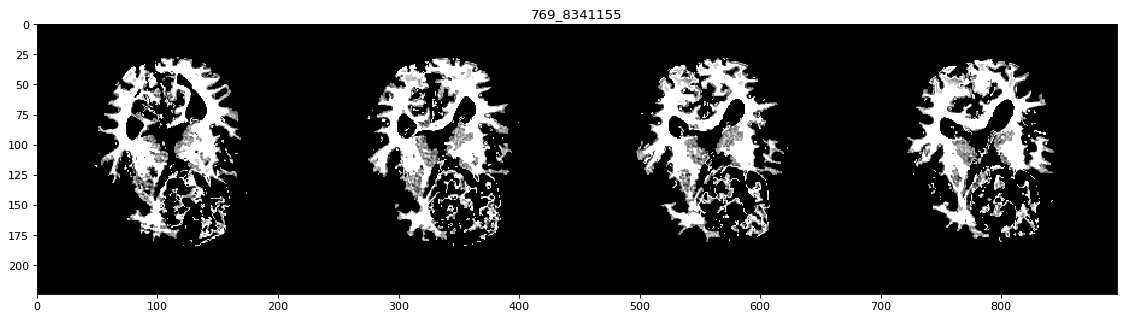

In [142]:
for k in t1_list:
    
    func_imshow_WM(k, k+1)

In [157]:

for i in range(len(ptlist)):
    unitno = ptlist[i]
    if i in t1_list2:
        src_file = 'mask/mask_iso_whitestripe/%s_t1_pve_2.nii.gz' % unitno
    else: 
        src_file = 'mask/mask_iso_whitestripe/%s_t1_pve_3.nii.gz' % unitno

    trg_file = 'mask/mask_iso_whitestripe/%s_t1_pve_wm.nii.gz' % unitno
    shutil.copy(src_file, trg_file)


In [158]:
for i in range(len(ptlist)):
    unitno = ptlist[i]
    if i in t2_list:
        src_file = 'mask/mask_iso_whitestripe/%s_t2_pve_2.nii.gz' % unitno
    else: 
        src_file = 'mask/mask_iso_whitestripe/%s_t2_pve_3.nii.gz' % unitno

    trg_file = 'mask/mask_iso_whitestripe/%s_t2_pve_wm.nii.gz' % unitno
    shutil.copy(src_file, trg_file)


In [ ]:
func_imshow_WM(200, 206)

In [ ]:
### Delete previous WM segmentation files


trg_path = 'mask/mask_iso_whitestripe/'
file1 = "_comb_mixeltype_wm.nii.gz"
file2 = "_mask_iso_whitestripe2.nii.gz"
file3 = "_comb_pveseg.nii.gz"
file4 = "_comb_seg.nii.gz"
file5 = "_comb_seg_0.nii.gz"
file6 = "_comb_seg_1.nii.gz"
file7 = "_comb_seg_2.nii.gz"
file8 = "_comb_pve_0.nii.gz"
file9 = "__pve_1.nii.gz"
file10 = "_comb_pve_2.nii.gz"
file11 = "_comb_mixeltype.nii.gz"
file_list = []

for i in range(1,12):
    file0 = eval("file" + str(i))
    file_list.append(file0)
 
print(file_list)

for unitno in ptlist:
    for j in range(len(file_list)):
        filename = str(unitno) + file_list[j]
        filepath = os.path.join(rootpath_work, trg_path, filename)
        print(filepath)
        if os.path.isfile(filepath):
            print(unitno)
            os.remove(filepath)

##### multiply T1_FAST_WM X T2_FAST_WM

In [365]:
def mask_t1_wm(unitno): 
    mask_t1_wm = 'mask/mask_iso_whitestripe/%s_t1_pve_wm.nii.gz'%unitno 
    return mask_t1_wm

def mask_t2_wm(unitno): 
    mask_t2_wm = 'mask/mask_iso_whitestripe/%s_t2_pve_wm.nii.gz'%unitno 
    return mask_t2_wm

def mask_t1t2_wm_prelim(unitno): 
    mask_t1t2_wm_prelim = 'mask/mask_iso_whitestripe/%s_fast_wm_t1t2_prelim.nii.gz'%unitno 
    return mask_t1t2_wm_prelim

def mask_t1t2_wm_prelim2(unitno): 
    mask_t1t2_wm_prelim2 = 'mask/mask_iso_whitestripe/%s_fast_wm_t1t2_prelim2.nii.gz'%unitno 
    return mask_t1t2_wm_prelim2


def mask_t1t2_wm(unitno): 
    mask_t1t2_wm = 'mask/mask_iso_whitestripe/%s_fast_wm_t1t2.nii.gz'%unitno 
    return mask_t1t2_wm


In [368]:
def func_fast_WM_t1t2(k, l) : 
    for i in range(k, l): 
        #unitno = ptlist[i] 
        unitno = ptlist[i] 
        print(unitno) 
#        p = subprocess.Popen(["""fslmaths %s -thr 1.5 -uthr 2.5 -bin %s\n"""%((os.path.join(rootpath_work, mask_mixeltype(unitno))), os.path.join(rootpath_work, mask_mixeltype_wm(unitno)))], shell = True) p.wait()

        FAST_t1t2 = BinaryMaths(in_file = mask_t1_wm(unitno), 
                                operand_file = mask_t2_wm(unitno),
                                operation = 'mul',
                                out_file = mask_t1t2_wm_prelim(unitno))
        FAST_t1t2.run()
        
        subt_roi = BinaryMaths(in_file = mask_t1t2_wm_prelim(unitno), 
                                operand_file = mask_iso_total(unitno),
                                operation = 'sub',
                                out_file = mask_t1t2_wm_prelim2(unitno))
        subt_roi.run()
        
        p = subprocess.Popen(["""fslmaths %s -thr 0.99 -bin %s\n"""%((os.path.join(rootpath_work, mask_t1t2_wm_prelim2(unitno))), 
                                                                     os.path.join(rootpath_work, mask_t1t2_wm(unitno)))], shell = True) 
        p.wait()
        os.remove(os.path.join(rootpath_work, mask_t1t2_wm_prelim(unitno)))
        os.remove(os.path.join(rootpath_work, mask_t1t2_wm_prelim2(unitno)))
        

In [369]:
func_multiproc(['func_fast_WM_t1t2'])





func_fast_WM_t1t2
651789
3174077
5069242
5401581
5881537
7416100
7751116
7973273
8268889
8397673
8463790
8513196
8581674
8648938
2379524
4240406
5390880
5808049
6601865
7432750
7526623
7654630
7756668
7844501
7946503
8055830
8125034
8214284
8303016
8377466
190424-16:08:21,587 interface INFO:
	 stderr 2019-04-24T16:08:21.587532:
190424-16:08:21,592 interface INFO:
	 stderr 2019-04-24T16:08:21.587532:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:21,595 interface INFO:
	 stderr 2019-04-24T16:08:21.587532:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:21,597 interface INFO:
	 stderr 2019-04-24T16:08:21.587532:
190424-16:08:21,603 interface INFO:
	 stderr 2019-04-24T16:08:21.603148:
190424-16:08:21,606 interface INFO:
	 stderr 2019-04-24T16:08:21.603148:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:21,612 interface INFO:
	 stderr 2019-04-24T16:08:21.603148: 

190424-16:08:21,922 interface INFO:
	 stderr 2019-04-24T16:08:21.909100:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:21,924 interface INFO:
	 stderr 2019-04-24T16:08:21.909100:
190424-16:08:21,924 interface INFO:
	 stderr 2019-04-24T16:08:21.909216:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:21,926 interface INFO:
	 stderr 2019-04-24T16:08:21.909216:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:21,944 interface INFO:
	 stderr 2019-04-24T16:08:21.944042:
190424-16:08:21,947 interface INFO:
	 stderr 2019-04-24T16:08:21.944042:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:21,934 interface INFO:
	 stderr 2019-04-24T16:08:21.909216:
190424-16:08:21,951 interface INFO:
	 stderr 2019-04-24T16:08:21.944042:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08

190424-16:08:25,640 interface INFO:
	 stderr 2019-04-24T16:08:25.636453:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:25,640 interface INFO:
	 stderr 2019-04-24T16:08:25.636409:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:25,643 interface INFO:
	 stderr 2019-04-24T16:08:25.636409:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:25,641 interface INFO:
	 stderr 2019-04-24T16:08:25.641148:
190424-16:08:25,642 interface INFO:
	 stderr 2019-04-24T16:08:25.636453:
190424-16:08:25,644 interface INFO:
	 stderr 2019-04-24T16:08:25.636409:
190424-16:08:25,645 interface INFO:
	 stderr 2019-04-24T16:08:25.641148:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:25,647 interface INFO:
	 stderr 2019-04-24T16:08:25.641148:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08

190424-16:08:26,181 interface INFO:
	 stderr 2019-04-24T16:08:26.180905:
190424-16:08:26,183 interface INFO:
	 stderr 2019-04-24T16:08:26.180905:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:26,186 interface INFO:
	 stderr 2019-04-24T16:08:26.180905:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:26,187 interface INFO:
	 stderr 2019-04-24T16:08:26.180905:
190424-16:08:26,379 interface INFO:
	 stderr 2019-04-24T16:08:26.378858:
190424-16:08:26,381 interface INFO:
	 stderr 2019-04-24T16:08:26.378858:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:26,383 interface INFO:
	 stderr 2019-04-24T16:08:26.378858:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:26,384 interface INFO:
	 stderr 2019-04-24T16:08:26.378858:
190424-16:08:26,432 interface INFO:
	 stderr 2019-04-24T16:08:26.432445:
190424-16:08:26,434 interfa

190424-16:08:29,765 interface INFO:
	 stderr 2019-04-24T16:08:29.758173:
190424-16:08:29,919 interface INFO:
	 stderr 2019-04-24T16:08:29.919451:
190424-16:08:29,924 interface INFO:
	 stderr 2019-04-24T16:08:29.919451:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:29,925 interface INFO:
	 stderr 2019-04-24T16:08:29.919451:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:29,927 interface INFO:
	 stderr 2019-04-24T16:08:29.919451:
190424-16:08:29,984 interface INFO:
	 stderr 2019-04-24T16:08:29.984164:
190424-16:08:29,987 interface INFO:
	 stderr 2019-04-24T16:08:29.984164:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:29,988 interface INFO:
	 stderr 2019-04-24T16:08:29.984164:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:29,990 interface INFO:
	 stderr 2019-04-24T16:08:29.984164:
190424-16:08:30,18 interfac

190424-16:08:32,928 interface INFO:
	 stderr 2019-04-24T16:08:32.924241:
190424-16:08:32,969 interface INFO:
	 stderr 2019-04-24T16:08:32.969190:
190424-16:08:32,971 interface INFO:
	 stderr 2019-04-24T16:08:32.969190:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:32,972 interface INFO:
	 stderr 2019-04-24T16:08:32.969190:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:32,973 interface INFO:
	 stderr 2019-04-24T16:08:32.969190:
190424-16:08:33,22 interface INFO:
	 stderr 2019-04-24T16:08:33.022631:
190424-16:08:33,25 interface INFO:
	 stderr 2019-04-24T16:08:33.022631:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:33,26 interface INFO:
	 stderr 2019-04-24T16:08:33.022631:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:33,27 interface INFO:
	 stderr 2019-04-24T16:08:33.022631:
190424-16:08:33,43 interface IN

190424-16:08:34,95 interface INFO:
	 stderr 2019-04-24T16:08:34.092742:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:34,96 interface INFO:
	 stderr 2019-04-24T16:08:34.092742:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:34,97 interface INFO:
	 stderr 2019-04-24T16:08:34.092742:
190424-16:08:34,114 interface INFO:
	 stderr 2019-04-24T16:08:34.113990:
190424-16:08:34,116 interface INFO:
	 stderr 2019-04-24T16:08:34.113990:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:34,129 interface INFO:
	 stderr 2019-04-24T16:08:34.113990:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:34,131 interface INFO:
	 stderr 2019-04-24T16:08:34.113990:
190424-16:08:34,134 interface INFO:
	 stderr 2019-04-24T16:08:34.134026:
190424-16:08:34,136 interface INFO:
	 stderr 2019-04-24T16:08:34.134026:WARNING:: Inconsistent orientat

190424-16:08:37,283 interface INFO:
	 stderr 2019-04-24T16:08:37.283089:
190424-16:08:37,285 interface INFO:
	 stderr 2019-04-24T16:08:37.283089:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:37,286 interface INFO:
	 stderr 2019-04-24T16:08:37.283089:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:37,288 interface INFO:
	 stderr 2019-04-24T16:08:37.283089:
190424-16:08:37,309 interface INFO:
	 stderr 2019-04-24T16:08:37.309373:
190424-16:08:37,311 interface INFO:
	 stderr 2019-04-24T16:08:37.309373:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:37,313 interface INFO:
	 stderr 2019-04-24T16:08:37.309373:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:37,314 interface INFO:
	 stderr 2019-04-24T16:08:37.309373:
190424-16:08:37,325 interface INFO:
	 stderr 2019-04-24T16:08:37.325103:
190424-16:08:37,328 interfa

190424-16:08:38,314 interface INFO:
	 stderr 2019-04-24T16:08:38.310656:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:38,316 interface INFO:
	 stderr 2019-04-24T16:08:38.310656:
5441955
8652741
5132299
1952345
6138036
8075803
2917442
8294589
8414278
4365261
5843358
5530743
6676176
7778901
8527924
7456941
7686002
7863907
7547026
7763347
8142439
8320306
7523529
8232694
8074420
7970660
3462944
8468984
190424-16:08:40,962 interface INFO:
	 stderr 2019-04-24T16:08:40.962669:
190424-16:08:40,965 interface INFO:
	 stderr 2019-04-24T16:08:40.962669:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:40,966 interface INFO:
	 stderr 2019-04-24T16:08:40.962669:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:40,971 interface INFO:
	 stderr 2019-04-24T16:08:40.962669:
190424-16:08:41,52 interface INFO:
	 stderr 2019-04-24T16:08:41.052222:
190424-16:08:41,52 i

190424-16:08:42,198 interface INFO:
	 stderr 2019-04-24T16:08:42.194114:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:42,199 interface INFO:
	 stderr 2019-04-24T16:08:42.194158:
190424-16:08:42,200 interface INFO:
	 stderr 2019-04-24T16:08:42.194114:
190424-16:08:42,293 interface INFO:
	 stderr 2019-04-24T16:08:42.293020:
190424-16:08:42,296 interface INFO:
	 stderr 2019-04-24T16:08:42.293020:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:42,298 interface INFO:
	 stderr 2019-04-24T16:08:42.293020:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:42,301 interface INFO:
	 stderr 2019-04-24T16:08:42.293020:
190424-16:08:42,325 interface INFO:
	 stderr 2019-04-24T16:08:42.324792:
190424-16:08:42,327 interface INFO:
	 stderr 2019-04-24T16:08:42.324792:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:42,329 interfa

190424-16:08:44,990 interface INFO:
	 stderr 2019-04-24T16:08:44.990059:
190424-16:08:44,992 interface INFO:
	 stderr 2019-04-24T16:08:44.989983:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:44,992 interface INFO:
	 stderr 2019-04-24T16:08:44.990059:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:44,994 interface INFO:
	 stderr 2019-04-24T16:08:44.990059:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:44,996 interface INFO:
	 stderr 2019-04-24T16:08:44.990059:
190424-16:08:44,998 interface INFO:
	 stderr 2019-04-24T16:08:44.989983:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:44,999 interface INFO:
	 stderr 2019-04-24T16:08:44.989983:
190424-16:08:45,69 interface INFO:
	 stderr 2019-04-24T16:08:45.068831:
190424-16:08:45,71 interface INFO:
	 stderr 2019-04-24T16:08:45.068831:WARNING:: Inconsistent orienta

190424-16:08:46,410 interface INFO:
	 stderr 2019-04-24T16:08:46.404599:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:46,412 interface INFO:
	 stderr 2019-04-24T16:08:46.404599:
190424-16:08:46,412 interface INFO:
	 stderr 2019-04-24T16:08:46.404563:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:46,413 interface INFO:
	 stderr 2019-04-24T16:08:46.404563:
190424-16:08:46,414 interface INFO:
	 stderr 2019-04-24T16:08:46.404620:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:46,416 interface INFO:
	 stderr 2019-04-24T16:08:46.404620:
190424-16:08:46,426 interface INFO:
	 stderr 2019-04-24T16:08:46.426538:
190424-16:08:46,429 interface INFO:
	 stderr 2019-04-24T16:08:46.426538:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:46,430 interface INFO:
	 stderr 2019-04-24T16:08:46.426538:          

190424-16:08:49,631 interface INFO:
	 stderr 2019-04-24T16:08:49.629038:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:49,632 interface INFO:
	 stderr 2019-04-24T16:08:49.629038:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:49,633 interface INFO:
	 stderr 2019-04-24T16:08:49.629038:
190424-16:08:49,666 interface INFO:
	 stderr 2019-04-24T16:08:49.666633:
190424-16:08:49,669 interface INFO:
	 stderr 2019-04-24T16:08:49.666633:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:49,670 interface INFO:
	 stderr 2019-04-24T16:08:49.666633:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:49,671 interface INFO:
	 stderr 2019-04-24T16:08:49.666633:
190424-16:08:49,816 interface INFO:
	 stderr 2019-04-24T16:08:49.815900:
190424-16:08:49,818 interface INFO:
	 stderr 2019-04-24T16:08:49.815900:WARNING:: Inconsistent orien

190424-16:08:52,670 interface INFO:
	 stderr 2019-04-24T16:08:52.670535:
190424-16:08:52,674 interface INFO:
	 stderr 2019-04-24T16:08:52.670535:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:52,676 interface INFO:
	 stderr 2019-04-24T16:08:52.670535:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:52,679 interface INFO:
	 stderr 2019-04-24T16:08:52.670535:
190424-16:08:52,758 interface INFO:
	 stderr 2019-04-24T16:08:52.758211:
190424-16:08:52,760 interface INFO:
	 stderr 2019-04-24T16:08:52.758211:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:52,762 interface INFO:
	 stderr 2019-04-24T16:08:52.758211:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:52,762 interface INFO:
	 stderr 2019-04-24T16:08:52.762526:
190424-16:08:52,764 interface INFO:
	 stderr 2019-04-24T16:08:52.758211:
190424-16:08:52,765 interfa

190424-16:08:53,988 interface INFO:
	 stderr 2019-04-24T16:08:53.984649:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:53,990 interface INFO:
	 stderr 2019-04-24T16:08:53.984649:
190424-16:08:54,20 interface INFO:
	 stderr 2019-04-24T16:08:54.019862:
190424-16:08:54,26 interface INFO:
	 stderr 2019-04-24T16:08:54.019862:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:54,28 interface INFO:
	 stderr 2019-04-24T16:08:54.019862:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:54,30 interface INFO:
	 stderr 2019-04-24T16:08:54.019862:
190424-16:08:54,32 interface INFO:
	 stderr 2019-04-24T16:08:54.032685:
190424-16:08:54,35 interface INFO:
	 stderr 2019-04-24T16:08:54.032685:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:54,37 interface INFO:
	 stderr 2019-04-24T16:08:54.032685:          Will use voxel-based orie

190424-16:08:56,743 interface INFO:
	 stderr 2019-04-24T16:08:56.739882:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:56,744 interface INFO:
	 stderr 2019-04-24T16:08:56.739882:
190424-16:08:56,787 interface INFO:
	 stderr 2019-04-24T16:08:56.787395:
190424-16:08:56,789 interface INFO:
	 stderr 2019-04-24T16:08:56.787395:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:56,791 interface INFO:
	 stderr 2019-04-24T16:08:56.787395:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:56,792 interface INFO:
	 stderr 2019-04-24T16:08:56.787395:
190424-16:08:56,809 interface INFO:
	 stderr 2019-04-24T16:08:56.809535:
190424-16:08:56,812 interface INFO:
	 stderr 2019-04-24T16:08:56.809535:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:56,813 interface INFO:
	 stderr 2019-04-24T16:08:56.809535:          Will use voxel-bas

190424-16:08:58,463 interface INFO:
	 stderr 2019-04-24T16:08:58.455297:
8437917
2136518
3173505
3638864
6776630
7834924
190424-16:08:59,62 interface INFO:
	 stderr 2019-04-24T16:08:59.062083:
190424-16:08:59,65 interface INFO:
	 stderr 2019-04-24T16:08:59.062083:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:59,67 interface INFO:
	 stderr 2019-04-24T16:08:59.062083:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
8535705
190424-16:08:59,69 interface INFO:
	 stderr 2019-04-24T16:08:59.062083:
190424-16:08:59,86 interface INFO:
	 stderr 2019-04-24T16:08:59.086609:
190424-16:08:59,90 interface INFO:
	 stderr 2019-04-24T16:08:59.086609:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:08:59,91 interface INFO:
	 stderr 2019-04-24T16:08:59.086609:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:08:59,107 interface INFO:
	 stderr 2019-0

190424-16:09:01,647 interface INFO:
	 stderr 2019-04-24T16:09:01.640741:
190424-16:09:01,652 interface INFO:
	 stderr 2019-04-24T16:09:01.652271:
190424-16:09:01,655 interface INFO:
	 stderr 2019-04-24T16:09:01.652271:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:01,657 interface INFO:
	 stderr 2019-04-24T16:09:01.652271:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:01,658 interface INFO:
	 stderr 2019-04-24T16:09:01.652271:
190424-16:09:01,658 interface INFO:
	 stderr 2019-04-24T16:09:01.658779:
190424-16:09:01,660 interface INFO:
	 stderr 2019-04-24T16:09:01.658779:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:01,662 interface INFO:
	 stderr 2019-04-24T16:09:01.658779:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:01,664 interface INFO:
	 stderr 2019-04-24T16:09:01.658779:
190424-16:09:01,688 interfa

190424-16:09:04,345 interface INFO:
	 stderr 2019-04-24T16:09:04.339292:
190424-16:09:04,384 interface INFO:
	 stderr 2019-04-24T16:09:04.384413:
190424-16:09:04,387 interface INFO:
	 stderr 2019-04-24T16:09:04.384413:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:04,389 interface INFO:
	 stderr 2019-04-24T16:09:04.384413:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:04,391 interface INFO:
	 stderr 2019-04-24T16:09:04.384413:
190424-16:09:04,407 interface INFO:
	 stderr 2019-04-24T16:09:04.407156:
190424-16:09:04,409 interface INFO:
	 stderr 2019-04-24T16:09:04.407156:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:04,411 interface INFO:
	 stderr 2019-04-24T16:09:04.407156:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:04,413 interface INFO:
	 stderr 2019-04-24T16:09:04.407156:
190424-16:09:04,453 interfa

190424-16:09:05,719 interface INFO:
	 stderr 2019-04-24T16:09:05.716089:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:05,720 interface INFO:
	 stderr 2019-04-24T16:09:05.716089:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:05,722 interface INFO:
	 stderr 2019-04-24T16:09:05.716089:
190424-16:09:05,792 interface INFO:
	 stderr 2019-04-24T16:09:05.791979:
190424-16:09:05,794 interface INFO:
	 stderr 2019-04-24T16:09:05.791979:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:05,795 interface INFO:
	 stderr 2019-04-24T16:09:05.791979:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:05,797 interface INFO:
	 stderr 2019-04-24T16:09:05.791979:
5916506
190424-16:09:05,834 interface INFO:
	 stderr 2019-04-24T16:09:05.834616:
190424-16:09:05,837 interface INFO:
	 stderr 2019-04-24T16:09:05.834616:WARNING:: Inconsiste

190424-16:09:08,781 interface INFO:
	 stderr 2019-04-24T16:09:08.780953:
190424-16:09:08,783 interface INFO:
	 stderr 2019-04-24T16:09:08.780953:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:08,784 interface INFO:
	 stderr 2019-04-24T16:09:08.780953:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:08,785 interface INFO:
	 stderr 2019-04-24T16:09:08.780953:
190424-16:09:09,116 interface INFO:
	 stderr 2019-04-24T16:09:09.116407:
190424-16:09:09,119 interface INFO:
	 stderr 2019-04-24T16:09:09.116407:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:09,120 interface INFO:
	 stderr 2019-04-24T16:09:09.116407:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:09,121 interface INFO:
	 stderr 2019-04-24T16:09:09.116407:
190424-16:09:09,342 interface INFO:
	 stderr 2019-04-24T16:09:09.342132:
190424-16:09:09,342 interfa

190424-16:09:11,843 interface INFO:
	 stderr 2019-04-24T16:09:11.836238:
190424-16:09:11,978 interface INFO:
	 stderr 2019-04-24T16:09:11.978610:
190424-16:09:11,981 interface INFO:
	 stderr 2019-04-24T16:09:11.978610:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:11,982 interface INFO:
	 stderr 2019-04-24T16:09:11.978610:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:11,983 interface INFO:
	 stderr 2019-04-24T16:09:11.978610:
190424-16:09:12,38 interface INFO:
	 stderr 2019-04-24T16:09:12.038481:
190424-16:09:12,42 interface INFO:
	 stderr 2019-04-24T16:09:12.038481:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:12,43 interface INFO:
	 stderr 2019-04-24T16:09:12.038481:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:12,44 interface INFO:
	 stderr 2019-04-24T16:09:12.038481:
190424-16:09:12,51 interface IN

190424-16:09:13,306 interface INFO:
	 stderr 2019-04-24T16:09:13.305830:
190424-16:09:13,308 interface INFO:
	 stderr 2019-04-24T16:09:13.305854:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:13,309 interface INFO:
	 stderr 2019-04-24T16:09:13.305830:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:13,310 interface INFO:
	 stderr 2019-04-24T16:09:13.305854:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:13,311 interface INFO:
	 stderr 2019-04-24T16:09:13.305830:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:13,311 interface INFO:
	 stderr 2019-04-24T16:09:13.305854:
190424-16:09:13,314 interface INFO:
	 stderr 2019-04-24T16:09:13.305830:
190424-16:09:13,314 interface INFO:
	 stderr 2019-04-24T16:09:13.314398:
190424-16:09:13,319 interface INFO:
	 stderr 2019-04-24T16:09:13.314398:WARNING:: Inconsistent orien

190424-16:09:16,44 interface INFO:
	 stderr 2019-04-24T16:09:16.044497:
190424-16:09:16,48 interface INFO:
	 stderr 2019-04-24T16:09:16.044497:WARNING:: Inconsistent orientations for individual images in pipeline!
8608471
190424-16:09:16,51 interface INFO:
	 stderr 2019-04-24T16:09:16.044497:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:16,52 interface INFO:
	 stderr 2019-04-24T16:09:16.044497:
486293
190424-16:09:16,197 interface INFO:
	 stderr 2019-04-24T16:09:16.197351:
190424-16:09:16,199 interface INFO:
	 stderr 2019-04-24T16:09:16.197351:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:16,201 interface INFO:
	 stderr 2019-04-24T16:09:16.197351:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:16,202 interface INFO:
	 stderr 2019-04-24T16:09:16.197351:
5643165
190424-16:09:16,481 interface INFO:
	 stderr 2019-04-24T16:09:16.481134:
190424-1

190424-16:09:18,250 interface INFO:
	 stderr 2019-04-24T16:09:18.250408:
190424-16:09:18,253 interface INFO:
	 stderr 2019-04-24T16:09:18.250408:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:18,255 interface INFO:
	 stderr 2019-04-24T16:09:18.250408:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:18,257 interface INFO:
	 stderr 2019-04-24T16:09:18.250408:
190424-16:09:18,378 interface INFO:
	 stderr 2019-04-24T16:09:18.378638:
190424-16:09:18,383 interface INFO:
	 stderr 2019-04-24T16:09:18.378638:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:18,399 interface INFO:
	 stderr 2019-04-24T16:09:18.378638:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:18,400 interface INFO:
	 stderr 2019-04-24T16:09:18.378638:
190424-16:09:18,466 interface INFO:
	 stderr 2019-04-24T16:09:18.466076:
190424-16:09:18,468 interfa

190424-16:09:20,831 interface INFO:
	 stderr 2019-04-24T16:09:20.831339:
190424-16:09:20,833 interface INFO:
	 stderr 2019-04-24T16:09:20.831339:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:20,835 interface INFO:
	 stderr 2019-04-24T16:09:20.831339:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:20,836 interface INFO:
	 stderr 2019-04-24T16:09:20.831339:
190424-16:09:20,857 interface INFO:
	 stderr 2019-04-24T16:09:20.857496:
190424-16:09:20,859 interface INFO:
	 stderr 2019-04-24T16:09:20.857496:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:20,862 interface INFO:
	 stderr 2019-04-24T16:09:20.857496:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:20,863 interface INFO:
	 stderr 2019-04-24T16:09:20.857496:
190424-16:09:20,865 interface INFO:
	 stderr 2019-04-24T16:09:20.865663:
190424-16:09:20,868 interfa

190424-16:09:23,552 interface INFO:
	 stderr 2019-04-24T16:09:23.530619:
190424-16:09:23,650 interface INFO:
	 stderr 2019-04-24T16:09:23.650611:
190424-16:09:23,660 interface INFO:
	 stderr 2019-04-24T16:09:23.650611:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:23,661 interface INFO:
	 stderr 2019-04-24T16:09:23.661305:
190424-16:09:23,662 interface INFO:
	 stderr 2019-04-24T16:09:23.662345:
190424-16:09:23,663 interface INFO:
	 stderr 2019-04-24T16:09:23.661305:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:23,665 interface INFO:
	 stderr 2019-04-24T16:09:23.661305:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:23,664 interface INFO:
	 stderr 2019-04-24T16:09:23.662345:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:23,666 interface INFO:
	 stderr 2019-04-24T16:09:23.661305:
190424-16:09:23,667 interface INFO:
	 stderr 

3944287
8213514
190424-16:09:25,301 interface INFO:
	 stderr 2019-04-24T16:09:25.301572:
190424-16:09:25,304 interface INFO:
	 stderr 2019-04-24T16:09:25.301572:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:25,305 interface INFO:
	 stderr 2019-04-24T16:09:25.301572:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:25,306 interface INFO:
	 stderr 2019-04-24T16:09:25.301572:
8448278
190424-16:09:25,365 interface INFO:
	 stderr 2019-04-24T16:09:25.365081:
190424-16:09:25,367 interface INFO:
	 stderr 2019-04-24T16:09:25.365081:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:25,369 interface INFO:
	 stderr 2019-04-24T16:09:25.365081:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:25,370 interface INFO:
	 stderr 2019-04-24T16:09:25.365081:
3688244
190424-16:09:25,424 interface INFO:
	 stderr 2019-04-24T16:09:25.424

190424-16:09:27,755 interface INFO:
	 stderr 2019-04-24T16:09:27.750557:
190424-16:09:27,770 interface INFO:
	 stderr 2019-04-24T16:09:27.770600:
190424-16:09:27,773 interface INFO:
	 stderr 2019-04-24T16:09:27.770600:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:27,774 interface INFO:
	 stderr 2019-04-24T16:09:27.770600:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:27,775 interface INFO:
	 stderr 2019-04-24T16:09:27.770600:
1184532
7637080
5222508
190424-16:09:28,368 interface INFO:
	 stderr 2019-04-24T16:09:28.368371:
190424-16:09:28,371 interface INFO:
	 stderr 2019-04-24T16:09:28.368371:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:28,372 interface INFO:
	 stderr 2019-04-24T16:09:28.368371:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:28,374 interface INFO:
	 stderr 2019-04-24T16:09:28.368371:
190

190424-16:09:30,487 interface INFO:
	 stderr 2019-04-24T16:09:30.480801:
8348833
190424-16:09:30,547 interface INFO:
	 stderr 2019-04-24T16:09:30.547716:
190424-16:09:30,550 interface INFO:
	 stderr 2019-04-24T16:09:30.547716:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:30,552 interface INFO:
	 stderr 2019-04-24T16:09:30.547716:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:30,554 interface INFO:
	 stderr 2019-04-24T16:09:30.547716:
7816559
7368360
7729312
8184994
8101370
190424-16:09:30,983 interface INFO:
	 stderr 2019-04-24T16:09:30.983141:
190424-16:09:30,987 interface INFO:
	 stderr 2019-04-24T16:09:30.983141:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:30,989 interface INFO:
	 stderr 2019-04-24T16:09:30.983141:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:30,990 interface INFO:
	 stderr 2019-04

190424-16:09:32,684 interface INFO:
	 stderr 2019-04-24T16:09:32.684280:
190424-16:09:32,687 interface INFO:
	 stderr 2019-04-24T16:09:32.684280:WARNING:: Inconsistent orientations for individual images in pipeline!
8382043
190424-16:09:32,689 interface INFO:
	 stderr 2019-04-24T16:09:32.684280:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:32,690 interface INFO:
	 stderr 2019-04-24T16:09:32.684280:
2533900
190424-16:09:32,831 interface INFO:
	 stderr 2019-04-24T16:09:32.831510:
190424-16:09:32,834 interface INFO:
	 stderr 2019-04-24T16:09:32.831510:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:32,835 interface INFO:
	 stderr 2019-04-24T16:09:32.831510:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:32,836 interface INFO:
	 stderr 2019-04-24T16:09:32.831510:
190424-16:09:32,917 interface INFO:
	 stderr 2019-04-24T16:09:32.917468:
190424-16:0

190424-16:09:35,232 interface INFO:
	 stderr 2019-04-24T16:09:35.227256:
190424-16:09:35,312 interface INFO:
	 stderr 2019-04-24T16:09:35.312667:
190424-16:09:35,315 interface INFO:
	 stderr 2019-04-24T16:09:35.312667:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:35,320 interface INFO:
	 stderr 2019-04-24T16:09:35.312667:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:35,332 interface INFO:
	 stderr 2019-04-24T16:09:35.312667:
190424-16:09:35,361 interface INFO:
	 stderr 2019-04-24T16:09:35.361569:
190424-16:09:35,363 interface INFO:
	 stderr 2019-04-24T16:09:35.361569:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:35,366 interface INFO:
	 stderr 2019-04-24T16:09:35.361569:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:35,367 interface INFO:
	 stderr 2019-04-24T16:09:35.361569:
1371892
190424-16:09:35,428

190424-16:09:37,285 interface INFO:
	 stderr 2019-04-24T16:09:37.279783:
8494290
190424-16:09:37,546 interface INFO:
	 stderr 2019-04-24T16:09:37.546427:
190424-16:09:37,549 interface INFO:
	 stderr 2019-04-24T16:09:37.546427:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:37,551 interface INFO:
	 stderr 2019-04-24T16:09:37.546427:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:37,552 interface INFO:
	 stderr 2019-04-24T16:09:37.546427:
190424-16:09:37,601 interface INFO:
	 stderr 2019-04-24T16:09:37.601389:
190424-16:09:37,604 interface INFO:
	 stderr 2019-04-24T16:09:37.601389:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:37,605 interface INFO:
	 stderr 2019-04-24T16:09:37.601389:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:37,606 interface INFO:
	 stderr 2019-04-24T16:09:37.601389:
7884200
190424-16:0

190424-16:09:40,6 interface INFO:
	 stderr 2019-04-24T16:09:40.001128:
190424-16:09:40,48 interface INFO:
	 stderr 2019-04-24T16:09:40.048569:
190424-16:09:40,49 interface INFO:
	 stderr 2019-04-24T16:09:40.049388:
190424-16:09:40,63 interface INFO:
	 stderr 2019-04-24T16:09:40.048569:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:40,63 interface INFO:
	 stderr 2019-04-24T16:09:40.049388:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:40,65 interface INFO:
	 stderr 2019-04-24T16:09:40.049388:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:40,65 interface INFO:
	 stderr 2019-04-24T16:09:40.048569:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:40,66 interface INFO:
	 stderr 2019-04-24T16:09:40.049388:
190424-16:09:40,67 interface INFO:
	 stderr 2019-04-24T16:09:40.048569:
190424-16:09:40,88 interface INFO:
	 

190424-16:09:42,546 interface INFO:
	 stderr 2019-04-24T16:09:42.537605:
8637535
190424-16:09:42,719 interface INFO:
	 stderr 2019-04-24T16:09:42.719284:
190424-16:09:42,725 interface INFO:
	 stderr 2019-04-24T16:09:42.719284:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:42,726 interface INFO:
	 stderr 2019-04-24T16:09:42.719284:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:42,728 interface INFO:
	 stderr 2019-04-24T16:09:42.719284:
190424-16:09:42,757 interface INFO:
	 stderr 2019-04-24T16:09:42.757004:
190424-16:09:42,757 interface INFO:
	 stderr 2019-04-24T16:09:42.756941:
190424-16:09:42,759 interface INFO:
	 stderr 2019-04-24T16:09:42.757004:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:42,759 interface INFO:
	 stderr 2019-04-24T16:09:42.756941:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:42,761 interface INFO:
	

190424-16:09:44,373 interface INFO:
	 stderr 2019-04-24T16:09:44.373620:
190424-16:09:44,376 interface INFO:
	 stderr 2019-04-24T16:09:44.373620:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:44,377 interface INFO:
	 stderr 2019-04-24T16:09:44.373620:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:44,379 interface INFO:
	 stderr 2019-04-24T16:09:44.373620:
8239331
8571328
8456743
190424-16:09:44,454 interface INFO:
	 stderr 2019-04-24T16:09:44.454593:
190424-16:09:44,456 interface INFO:
	 stderr 2019-04-24T16:09:44.454593:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:44,457 interface INFO:
	 stderr 2019-04-24T16:09:44.454593:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:44,458 interface INFO:
	 stderr 2019-04-24T16:09:44.454593:
5321826
3834916
190424-16:09:44,598 interface INFO:
	 stderr 2019-04-24T16:0

190424-16:09:46,871 interface INFO:
	 stderr 2019-04-24T16:09:46.866614:
1989160
7697438
190424-16:09:47,53 interface INFO:
	 stderr 2019-04-24T16:09:47.053536:
190424-16:09:47,56 interface INFO:
	 stderr 2019-04-24T16:09:47.053536:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:47,57 interface INFO:
	 stderr 2019-04-24T16:09:47.053536:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:47,58 interface INFO:
	 stderr 2019-04-24T16:09:47.053536:
5315302
6585366
190424-16:09:47,368 interface INFO:
	 stderr 2019-04-24T16:09:47.368245:
190424-16:09:47,373 interface INFO:
	 stderr 2019-04-24T16:09:47.368245:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:47,377 interface INFO:
	 stderr 2019-04-24T16:09:47.368245:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:47,378 interface INFO:
	 stderr 2019-04-24T16:09:47.368245:

190424-16:09:49,175 interface INFO:
	 stderr 2019-04-24T16:09:49.169137:
7911424
7635826
8290191
190424-16:09:49,277 interface INFO:
	 stderr 2019-04-24T16:09:49.277525:
190424-16:09:49,279 interface INFO:
	 stderr 2019-04-24T16:09:49.277525:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:49,281 interface INFO:
	 stderr 2019-04-24T16:09:49.277525:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:49,282 interface INFO:
	 stderr 2019-04-24T16:09:49.277525:
7513852
8037487
190424-16:09:49,388 interface INFO:
	 stderr 2019-04-24T16:09:49.388195:
190424-16:09:49,391 interface INFO:
	 stderr 2019-04-24T16:09:49.388195:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:49,393 interface INFO:
	 stderr 2019-04-24T16:09:49.388195:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:49,394 interface INFO:
	 stderr 2019-04-24T16:0

190424-16:09:51,516 interface INFO:
	 stderr 2019-04-24T16:09:51.512154:
2915686
190424-16:09:51,552 interface INFO:
	 stderr 2019-04-24T16:09:51.551824:
190424-16:09:51,554 interface INFO:
	 stderr 2019-04-24T16:09:51.551824:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:51,556 interface INFO:
	 stderr 2019-04-24T16:09:51.551824:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:51,557 interface INFO:
	 stderr 2019-04-24T16:09:51.551824:
190424-16:09:51,682 interface INFO:
	 stderr 2019-04-24T16:09:51.682630:
190424-16:09:51,686 interface INFO:
	 stderr 2019-04-24T16:09:51.682630:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:51,688 interface INFO:
	 stderr 2019-04-24T16:09:51.682630:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:51,689 interface INFO:
	 stderr 2019-04-24T16:09:51.682630:
8395201
5023296
190

190424-16:09:54,391 interface INFO:
	 stderr 2019-04-24T16:09:54.383553:
190424-16:09:54,469 interface INFO:
	 stderr 2019-04-24T16:09:54.468735:
190424-16:09:54,471 interface INFO:
	 stderr 2019-04-24T16:09:54.468735:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:54,472 interface INFO:
	 stderr 2019-04-24T16:09:54.468735:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:54,474 interface INFO:
	 stderr 2019-04-24T16:09:54.468735:
190424-16:09:54,486 interface INFO:
	 stderr 2019-04-24T16:09:54.486230:
190424-16:09:54,488 interface INFO:
	 stderr 2019-04-24T16:09:54.486230:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:54,490 interface INFO:
	 stderr 2019-04-24T16:09:54.486230:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:54,491 interface INFO:
	 stderr 2019-04-24T16:09:54.486230:
190424-16:09:54,625 interfa

190424-16:09:56,118 interface INFO:
	 stderr 2019-04-24T16:09:56.118405:
190424-16:09:56,121 interface INFO:
	 stderr 2019-04-24T16:09:56.118405:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:56,122 interface INFO:
	 stderr 2019-04-24T16:09:56.118405:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:56,123 interface INFO:
	 stderr 2019-04-24T16:09:56.118405:
8257588
4128210
8511910
7409719
190424-16:09:56,430 interface INFO:
	 stderr 2019-04-24T16:09:56.430643:
190424-16:09:56,433 interface INFO:
	 stderr 2019-04-24T16:09:56.430643:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:56,435 interface INFO:
	 stderr 2019-04-24T16:09:56.430643:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:56,438 interface INFO:
	 stderr 2019-04-24T16:09:56.430643:
5809085
8460907
7925555
190424-16:09:56,842 interface INFO:
	 stderr

190424-16:09:58,926 interface INFO:
	 stderr 2019-04-24T16:09:58.921049:
190424-16:09:59,52 interface INFO:
	 stderr 2019-04-24T16:09:59.052522:
190424-16:09:59,54 interface INFO:
	 stderr 2019-04-24T16:09:59.052522:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:59,55 interface INFO:
	 stderr 2019-04-24T16:09:59.052522:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:59,57 interface INFO:
	 stderr 2019-04-24T16:09:59.052522:
190424-16:09:59,76 interface INFO:
	 stderr 2019-04-24T16:09:59.076655:
190424-16:09:59,79 interface INFO:
	 stderr 2019-04-24T16:09:59.076655:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:09:59,80 interface INFO:
	 stderr 2019-04-24T16:09:59.076655:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:09:59,81 interface INFO:
	 stderr 2019-04-24T16:09:59.076655:
190424-16:09:59,122 interface INFO:

190424-16:10:01,616 interface INFO:
	 stderr 2019-04-24T16:10:01.611446:
190424-16:10:01,652 interface INFO:
	 stderr 2019-04-24T16:10:01.652078:
190424-16:10:01,655 interface INFO:
	 stderr 2019-04-24T16:10:01.652078:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:10:01,658 interface INFO:
	 stderr 2019-04-24T16:10:01.652078:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:10:01,661 interface INFO:
	 stderr 2019-04-24T16:10:01.652078:
190424-16:10:01,719 interface INFO:
	 stderr 2019-04-24T16:10:01.719137:
190424-16:10:01,722 interface INFO:
	 stderr 2019-04-24T16:10:01.719137:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:10:01,724 interface INFO:
	 stderr 2019-04-24T16:10:01.719137:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:10:01,726 interface INFO:
	 stderr 2019-04-24T16:10:01.719137:
190424-16:10:01,970 interfa

190424-16:10:03,498 interface INFO:
	 stderr 2019-04-24T16:10:03.494140:
190424-16:10:03,499 interface INFO:
	 stderr 2019-04-24T16:10:03.494096:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:10:03,500 interface INFO:
	 stderr 2019-04-24T16:10:03.494096:
190424-16:10:03,550 interface INFO:
	 stderr 2019-04-24T16:10:03.550391:
190424-16:10:03,553 interface INFO:
	 stderr 2019-04-24T16:10:03.550391:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:10:03,554 interface INFO:
	 stderr 2019-04-24T16:10:03.550391:          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!
190424-16:10:03,556 interface INFO:
	 stderr 2019-04-24T16:10:03.550391:
190424-16:10:03,673 interface INFO:
	 stderr 2019-04-24T16:10:03.672763:
190424-16:10:03,675 interface INFO:
	 stderr 2019-04-24T16:10:03.672763:WARNING:: Inconsistent orientations for individual images in pipeline!
190424-16:10:03,677 interfa

### register mask_t1t2_wm  to MNI space, using matrix

In [40]:
def matrix_t1gd_iso_bet_corrected2mni(unitno):
    matrix_t1gd_iso_bet_corrected2mni = 'matrix/matrix_t1gd2mni/%s_matrix_t1gd_iso_bet_corrected2mni.mat'%unitno
    return matrix_t1gd_iso_bet_corrected2mni

def mask_t1t2_wm_2MNI_prelim(unitno): 
    mask_t1t2_wm_2MNI_prelim = 'mask/mask_iso_whitestripe/%s_fast_wm_t1t2_2MNI_prelim.nii.gz'%unitno 
    return mask_t1t2_wm_2MNI_prelim


def mask_t1t2_wm_2MNI_prelim2(unitno): 
    mask_t1t2_wm_2MNI_prelim2 = 'mask/mask_iso_whitestripe/%s_fast_wm_t1t2_2MNI_prelim2.nii.gz'%unitno 
    return mask_t1t2_wm_2MNI_prelim2


def mask_t1t2_wm_2MNI(unitno): 
    mask_t1t2_wm_2MNI = 'mask/mask_iso_whitestripe/%s_fast_wm_t1t2_2MNI.nii.gz'%unitno 
    return mask_t1t2_wm_2MNI

In [32]:
def func_regi_mask_wm_2MNI(k, l) : 
    for i in range(k, l): 
        #unitno = ptlist[i] 
        unitno = ptlist[i] 
        print(unitno)
        coregi_mask_wm_2MNI = ApplyXFM(in_file = mask_t1t2_wm(unitno),
                                    in_matrix_file = matrix_t1gd_iso_bet_corrected2mni(unitno),
                                    out_file = mask_t1t2_wm_2MNI_prelim(unitno),
                                    reference='MNI152lin_T1_1mm_brain.nii.gz')

        coregi_mask_wm_2MNI.run()

        cut_hemisphere = BinaryMaths(in_file = mask_t1t2_wm_2MNI_prelim(unitno), 
                            operand_file = 'MNI_hemisphericWM.nii.gz',
                            operation = 'mul',
                            out_file = mask_t1t2_wm_2MNI_prelim2(unitno))
        cut_hemisphere.run()

        p = subprocess.Popen(["""fslmaths %s -thr 0.99 -bin %s\n"""%((os.path.join(rootpath_work, mask_t1t2_wm_2MNI_prelim2(unitno))), 
                                                                     os.path.join(rootpath_work, mask_t1t2_wm_2MNI(unitno)))], shell = True) 
        p.wait()

        os.remove(mask_t1t2_wm_2MNI_prelim(unitno))
        os.remove(mask_t1t2_wm_2MNI_prelim2(unitno))





In [ ]:
ptlist.index(5212139)

In [ ]:
func_regi_mask_wm_2MNI(421,422)
func

In [ ]:
for unitno in ptlist:
    if not os.path.isfile(t1gd_iso_bet_corrected2mni(unitno)):
        print(unitno)

In [373]:
func_multiproc(['func_regi_mask_wm_2MNI'])





func_regi_mask_wm_2MNI
651789
3174077
5069242
5401581
5881537
7416100
7751116
7973273
8268889
8397673
8463790
8513196
8581674
8648938
2379524
4240406
5390880
5808049
6601865
7432750
7526623
7654630
7756668
7844501
7946503
8055830
8125034
8214284
8303016
8377466
5403246
7760703
8271467
8513671
8401782
2544291
8581917
8649471
4249820
5401319
7438956
7757651
7664524
7528914
7947384
7845251
8058626
8127365
8215211
3175788
1068540
7458179
5069928
5928663
7975211
8464157
5820198
6609307
8303154
8650859
8404294
8583220
2545167
5414766
8131582
7849692
8060512
8283398
7767404
8219381
8518093
4294438
5408861
5956746
3232584
7481226
7439815
5080237
5827015
7530390
8465106
7985046
7759442
7955082
7667511
6645678
8303769
1908121
8651548
8409358
8583619
8135438
5415892
8064434
7850805
7767726
8284871
2602057
8229739
8527329
4309782
3405857
5494915
7441750
5987182
5096558
7502249
5835431
8465253
7533037
7760652
8051568
7957142
7674888
6659190
8313277
1909640
8651745
8413767
8588494
8527757
543644

####  image math - calculate mean / SD -> normalize images


In [30]:

def t1gd_iso_norm(unitno): 
    t1gd_iso_norm = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_norm.nii.gz' % (unitno) )
    return  t1gd_iso_norm

def t2_iso_norm(unitno): 
    t2_iso_norm = os.path.join('t2/t2_iso/%s_t2_iso_norm.nii.gz' % (unitno) )
    return  t2_iso_norm

def flair_iso_norm(unitno): 
    flair_iso_norm = os.path.join('flair/flair_iso/%s_flair_iso_norm.nii.gz' % (unitno) )
    return  flair_iso_norm

In [379]:
from nipype.interfaces.fsl import ImageStats, ImageMaths

def func_norm_t1gd(k, l) : 
    for i in range(k, l): 
        unitno = ptlist[i] 
        stats_t1gd = ImageStats(in_file = t1gd_iso_bet_corrected2mni(unitno), 
                           op_string='-k %s -M -S'% mask_t1t2_wm_2MNI(unitno), 
                           terminal_output='stream')
        res_t1gd = stats_t1gd.run()
        mean, sd = res_t1gd.outputs.out_stat
        
        norm_t1gd = ImageMaths(in_file = t1gd_iso_corrected(unitno), 
                             op_string = "-sub %f -div %f" % (float(mean), float(sd)),
                             out_file = t1gd_iso_norm(unitno))
        norm_t1gd.run()


def func_norm_t2(k, l) : 
    for i in range(k, l): 
        unitno = ptlist[i] 
        stats_t2 = ImageStats(in_file = t2_iso_bet_corrected2mni(unitno), 
                           op_string='-k %s -M -S'% mask_t1t2_wm_2MNI(unitno), 
                           terminal_output='stream')
        res_t2 = stats_t2.run()
        mean, sd = res_t2.outputs.out_stat
        
        norm_t2 = ImageMaths(in_file = t2_iso_corrected(unitno), 
                             op_string = "-sub %f -div %f" % (float(mean), float(sd)),
                             out_file = t2_iso_norm(unitno))
        norm_t2.run()
        
        
def func_norm_flair(k, l) : 
    for i in range(k, l): 
        unitno = ptlist[i] 
        
        if os.path.isfile(flair_iso_corrected(unitno)):
            stats_flair = ImageStats(in_file = flair_iso_bet_corrected2mni(unitno), 
                               op_string='-k %s -M -S'% mask_t1t2_wm_2MNI(unitno), 
                               terminal_output='stream')
            res_flair = stats_flair.run()
            mean, sd = res_flair.outputs.out_stat

            norm_flair = ImageMaths(in_file = flair_iso_corrected(unitno), 
                                 op_string = "-sub %f -div %f" % (float(mean), float(sd)),
                                 out_file = flair_iso_norm(unitno))
            norm_flair.run()

In [380]:
func_multiproc(['func_norm_t1gd', 'func_norm_t2', 'func_norm_flair'])





func_norm_t1gd
190424-18:47:15,121 interface INFO:
	 stdout 2019-04-24T18:47:15.120252:986.079135 28.188371 
190424-18:47:15,126 interface INFO:
	 stdout 2019-04-24T18:47:15.125676:385.340296 12.596628 
190424-18:47:15,148 interface INFO:
	 stdout 2019-04-24T18:47:15.146891:274.150480 5.751941 
190424-18:47:15,152 interface INFO:
	 stdout 2019-04-24T18:47:15.152153:616.088222 21.161936 
190424-18:47:15,168 interface INFO:
	 stdout 2019-04-24T18:47:15.167354:452.075786 17.666321 
190424-18:47:15,181 interface INFO:
	 stdout 2019-04-24T18:47:15.175554:3464.154343 134.861075 
190424-18:47:15,189 interface INFO:
	 stdout 2019-04-24T18:47:15.188292:1020.234234 26.536754 
190424-18:47:15,408 interface INFO:
	 stdout 2019-04-24T18:47:15.408263:826.845486 23.614209 
190424-18:47:15,411 interface INFO:
	 stdout 2019-04-24T18:47:15.411396:884.227669 21.762905 
190424-18:47:15,432 interface INFO:
	 stdout 2019-04-24T18:47:15.432448:832.235326 24.818738 
190424-18:47:15,436 interface INFO:
	 s

190424-18:47:40,974 interface INFO:
	 stdout 2019-04-24T18:47:40.974675:700.223466 21.286937 
190424-18:47:41,239 interface INFO:
	 stdout 2019-04-24T18:47:41.239371:892.595924 24.217085 
190424-18:47:41,323 interface INFO:
	 stdout 2019-04-24T18:47:41.322736:795.610082 22.537639 
190424-18:47:41,612 interface INFO:
	 stdout 2019-04-24T18:47:41.612285:1054.808098 30.085310 
190424-18:47:41,625 interface INFO:
	 stdout 2019-04-24T18:47:41.624993:1195.557469 35.539608 
190424-18:47:42,89 interface INFO:
	 stdout 2019-04-24T18:47:42.088839:726.811428 20.429281 
190424-18:47:42,125 interface INFO:
	 stdout 2019-04-24T18:47:42.125459:576.213473 20.207868 
190424-18:47:42,134 interface INFO:
	 stdout 2019-04-24T18:47:42.134291:723.020891 20.879929 
190424-18:47:42,405 interface INFO:
	 stdout 2019-04-24T18:47:42.405298:582.541933 15.308275 
190424-18:47:42,450 interface INFO:
	 stdout 2019-04-24T18:47:42.450498:755.047864 26.662124 
190424-18:47:42,715 interface INFO:
	 stdout 2019-04-24T18:

190424-18:48:10,13 interface INFO:
	 stdout 2019-04-24T18:48:10.012989:802.359303 16.928531 
190424-18:48:10,233 interface INFO:
	 stdout 2019-04-24T18:48:10.233219:795.614906 23.177210 
190424-18:48:10,244 interface INFO:
	 stdout 2019-04-24T18:48:10.244151:667.007139 20.465541 
190424-18:48:10,259 interface INFO:
	 stdout 2019-04-24T18:48:10.259106:885.566239 30.052268 
190424-18:48:11,106 interface INFO:
	 stdout 2019-04-24T18:48:11.106387:1026.174788 30.054580 
190424-18:48:11,143 interface INFO:
	 stdout 2019-04-24T18:48:11.143362:741.687450 20.646003 
190424-18:48:11,654 interface INFO:
	 stdout 2019-04-24T18:48:11.653964:694.130015 21.800533 
190424-18:48:11,653 interface INFO:
	 stdout 2019-04-24T18:48:11.653132:793.367679 17.591781 
190424-18:48:11,662 interface INFO:
	 stdout 2019-04-24T18:48:11.661881:774.083573 20.287475 
190424-18:48:11,747 interface INFO:
	 stdout 2019-04-24T18:48:11.747584:1090.872838 23.830118 
190424-18:48:12,253 interface INFO:
	 stdout 2019-04-24T18:

190424-18:48:43,152 interface INFO:
	 stdout 2019-04-24T18:48:43.151868:929.982812 24.420107 
190424-18:48:44,664 interface INFO:
	 stdout 2019-04-24T18:48:44.663839:312.559007 8.925210 
190424-18:48:44,665 interface INFO:
	 stdout 2019-04-24T18:48:44.665343:909.295178 22.711688 
190424-18:48:44,676 interface INFO:
	 stdout 2019-04-24T18:48:44.676609:885.356638 22.984636 
190424-18:48:45,229 interface INFO:
	 stdout 2019-04-24T18:48:45.229035:652.340961 18.947749 
190424-18:48:45,372 interface INFO:
	 stdout 2019-04-24T18:48:45.371930:504.659298 16.050143 
190424-18:48:45,380 interface INFO:
	 stdout 2019-04-24T18:48:45.379896:552.560019 18.509827 
190424-18:48:45,382 interface INFO:
	 stdout 2019-04-24T18:48:45.381942:1032.898556 28.628053 
190424-18:48:45,389 interface INFO:
	 stdout 2019-04-24T18:48:45.388834:655.549905 21.483029 
190424-18:48:45,389 interface INFO:
	 stdout 2019-04-24T18:48:45.388857:872.891829 26.052189 
190424-18:48:45,741 interface INFO:
	 stdout 2019-04-24T18:4

190424-18:49:12,936 interface INFO:
	 stdout 2019-04-24T18:49:12.936214:627.312774 17.783415 
190424-18:49:13,158 interface INFO:
	 stdout 2019-04-24T18:49:13.158672:858.116808 24.114837 
190424-18:49:13,172 interface INFO:
	 stdout 2019-04-24T18:49:13.171878:1098.108370 27.632246 
190424-18:49:13,979 interface INFO:
	 stdout 2019-04-24T18:49:13.979317:776.538001 17.877546 
190424-18:49:14,170 interface INFO:
	 stdout 2019-04-24T18:49:14.170640:790.381173 19.469937 
190424-18:49:14,924 interface INFO:
	 stdout 2019-04-24T18:49:14.924163:623.317505 19.636585 
190424-18:49:14,924 interface INFO:
	 stdout 2019-04-24T18:49:14.924164:544.995009 17.281036 
190424-18:49:14,924 interface INFO:
	 stdout 2019-04-24T18:49:14.924204:772.990186 19.424430 
190424-18:49:14,924 interface INFO:
	 stdout 2019-04-24T18:49:14.924214:785.024026 22.557819 
190424-18:49:15,185 interface INFO:
	 stdout 2019-04-24T18:49:15.184876:379.287577 10.976312 
190424-18:49:15,314 interface INFO:
	 stdout 2019-04-24T18:

190424-18:49:47,380 interface INFO:
	 stdout 2019-04-24T18:49:47.379685:965.151109 31.774107 
190424-18:49:47,421 interface INFO:
	 stdout 2019-04-24T18:49:47.420490:751.193229 21.675539 
190424-18:49:47,551 interface INFO:
	 stdout 2019-04-24T18:49:47.550764:822.465330 27.245248 
190424-18:49:47,611 interface INFO:
	 stdout 2019-04-24T18:49:47.611365:969.860195 24.099031 
190424-18:49:47,817 interface INFO:
	 stdout 2019-04-24T18:49:47.817097:684.737795 19.416580 
190424-18:49:47,880 interface INFO:
	 stdout 2019-04-24T18:49:47.880685:787.398928 25.742856 
190424-18:49:47,986 interface INFO:
	 stdout 2019-04-24T18:49:47.986610:863.171448 24.658019 
190424-18:49:47,998 interface INFO:
	 stdout 2019-04-24T18:49:47.998629:623.433808 24.462024 
190424-18:49:48,1 interface INFO:
	 stdout 2019-04-24T18:49:48.001394:1149.556384 30.897710 
190424-18:49:48,52 interface INFO:
	 stdout 2019-04-24T18:49:48.052090:524.897599 16.418778 
190424-18:49:48,91 interface INFO:
	 stdout 2019-04-24T18:49:4

190424-18:50:17,568 interface INFO:
	 stdout 2019-04-24T18:50:17.567604:578.703199 18.396969 
190424-18:50:17,568 interface INFO:
	 stdout 2019-04-24T18:50:17.567531:717.749544 19.195830 
190424-18:50:17,610 interface INFO:
	 stdout 2019-04-24T18:50:17.610307:731.914879 19.754213 
190424-18:50:18,66 interface INFO:
	 stdout 2019-04-24T18:50:18.066650:693.880002 19.700075 
190424-18:50:18,115 interface INFO:
	 stdout 2019-04-24T18:50:18.115293:521.233056 19.439915 
190424-18:50:18,141 interface INFO:
	 stdout 2019-04-24T18:50:18.141746:840.168453 24.425027 
190424-18:50:18,157 interface INFO:
	 stdout 2019-04-24T18:50:18.157311:613.135645 16.395215 
190424-18:50:18,285 interface INFO:
	 stdout 2019-04-24T18:50:18.284876:695.643001 16.350172 
190424-18:50:18,285 interface INFO:
	 stdout 2019-04-24T18:50:18.284908:589.571479 21.163344 
190424-18:50:18,285 interface INFO:
	 stdout 2019-04-24T18:50:18.285286:790.799916 19.068029 
190424-18:50:18,355 interface INFO:
	 stdout 2019-04-24T18:50

190424-18:50:46,921 interface INFO:
	 stdout 2019-04-24T18:50:46.920922:623.454624 22.870256 
190424-18:50:46,926 interface INFO:
	 stdout 2019-04-24T18:50:46.926632:547.461324 17.294998 
190424-18:50:47,816 interface INFO:
	 stdout 2019-04-24T18:50:47.816591:723.529126 21.153791 
190424-18:50:47,828 interface INFO:
	 stdout 2019-04-24T18:50:47.828092:1037.720620 29.744791 
190424-18:50:47,866 interface INFO:
	 stdout 2019-04-24T18:50:47.866284:885.080088 24.507768 
190424-18:50:48,117 interface INFO:
	 stdout 2019-04-24T18:50:48.116908:769.653680 20.920074 
190424-18:50:48,117 interface INFO:
	 stdout 2019-04-24T18:50:48.116987:1106.237650 30.287256 
190424-18:50:48,128 interface INFO:
	 stdout 2019-04-24T18:50:48.128406:711.361700 23.537436 
190424-18:50:48,640 interface INFO:
	 stdout 2019-04-24T18:50:48.639939:753.106505 15.703045 
190424-18:50:48,640 interface INFO:
	 stdout 2019-04-24T18:50:48.640293:814.022837 19.584525 
190424-18:50:48,640 interface INFO:
	 stdout 2019-04-24T18

190424-18:51:14,348 interface INFO:
	 stdout 2019-04-24T18:51:14.348732:536.836157 20.987826 
190424-18:51:14,349 interface INFO:
	 stdout 2019-04-24T18:51:14.349040:920.185123 25.467005 
190424-18:51:14,395 interface INFO:
	 stdout 2019-04-24T18:51:14.394796:638.345982 19.068872 
190424-18:51:14,732 interface INFO:
	 stdout 2019-04-24T18:51:14.731779:628.896907 21.864145 
190424-18:51:14,798 interface INFO:
	 stdout 2019-04-24T18:51:14.798196:646.193250 21.347636 
190424-18:51:14,858 interface INFO:
	 stdout 2019-04-24T18:51:14.858369:338.925413 8.672545 
190424-18:51:15,53 interface INFO:
	 stdout 2019-04-24T18:51:15.053324:757.640810 18.633036 
190424-18:51:15,97 interface INFO:
	 stdout 2019-04-24T18:51:15.097321:377.278307 11.742114 
190424-18:51:15,618 interface INFO:
	 stdout 2019-04-24T18:51:15.617824:718.675963 18.598078 
190424-18:51:15,928 interface INFO:
	 stdout 2019-04-24T18:51:15.927998:331.168454 10.845910 
190424-18:51:15,949 interface INFO:
	 stdout 2019-04-24T18:51:1

190424-18:51:56,987 interface INFO:
	 stdout 2019-04-24T18:51:56.986244:546.261147 24.090504 
190424-18:51:57,255 interface INFO:
	 stdout 2019-04-24T18:51:57.254789:2182.621200 117.906586 
190424-18:51:57,286 interface INFO:
	 stdout 2019-04-24T18:51:57.286667:595.997904 24.759049 
190424-18:51:57,437 interface INFO:
	 stdout 2019-04-24T18:51:57.436610:673.046162 27.697419 
190424-18:51:57,496 interface INFO:
	 stdout 2019-04-24T18:51:57.496261:564.274690 20.430262 
190424-18:51:57,509 interface INFO:
	 stdout 2019-04-24T18:51:57.509087:517.406043 16.866406 
190424-18:51:57,509 interface INFO:
	 stdout 2019-04-24T18:51:57.509139:483.813475 20.326603 
190424-18:51:57,517 interface INFO:
	 stdout 2019-04-24T18:51:57.517381:622.426936 31.007735 
190424-18:51:57,518 interface INFO:
	 stdout 2019-04-24T18:51:57.518145:367.962987 17.772932 
190424-18:51:57,518 interface INFO:
	 stdout 2019-04-24T18:51:57.518208:617.478804 26.687413 
190424-18:51:57,522 interface INFO:
	 stdout 2019-04-24T18

190424-18:52:26,738 interface INFO:
	 stdout 2019-04-24T18:52:26.738263:610.686463 44.853546 
190424-18:52:26,901 interface INFO:
	 stdout 2019-04-24T18:52:26.901412:532.188791 25.853058 
190424-18:52:26,910 interface INFO:
	 stdout 2019-04-24T18:52:26.910674:510.452156 20.387095 
190424-18:52:26,911 interface INFO:
	 stdout 2019-04-24T18:52:26.911152:505.210113 20.820459 
190424-18:52:26,911 interface INFO:
	 stdout 2019-04-24T18:52:26.911171:503.216292 29.354104 
190424-18:52:26,911 interface INFO:
	 stdout 2019-04-24T18:52:26.911549:573.461514 27.865637 
190424-18:52:26,911 interface INFO:
	 stdout 2019-04-24T18:52:26.911385:515.432983 25.245214 
190424-18:52:26,914 interface INFO:
	 stdout 2019-04-24T18:52:26.914212:542.485789 27.830575 
190424-18:52:26,914 interface INFO:
	 stdout 2019-04-24T18:52:26.914085:589.203673 22.675937 
190424-18:52:26,916 interface INFO:
	 stdout 2019-04-24T18:52:26.916268:683.596824 31.661893 
190424-18:52:27,222 interface INFO:
	 stdout 2019-04-24T18:5

190424-18:52:55,587 interface INFO:
	 stdout 2019-04-24T18:52:55.587018:505.315096 25.854130 
190424-18:52:55,592 interface INFO:
	 stdout 2019-04-24T18:52:55.592309:545.395017 25.821139 
190424-18:52:55,629 interface INFO:
	 stdout 2019-04-24T18:52:55.629326:511.822507 24.982688 
190424-18:52:55,708 interface INFO:
	 stdout 2019-04-24T18:52:55.707886:485.270209 16.322660 
190424-18:52:55,708 interface INFO:
	 stdout 2019-04-24T18:52:55.708051:593.348902 25.567009 
190424-18:52:55,924 interface INFO:
	 stdout 2019-04-24T18:52:55.924078:662.949520 29.675809 
190424-18:52:55,933 interface INFO:
	 stdout 2019-04-24T18:52:55.933393:586.545620 22.555732 
190424-18:52:55,943 interface INFO:
	 stdout 2019-04-24T18:52:55.943381:572.814428 25.518798 
190424-18:52:55,954 interface INFO:
	 stdout 2019-04-24T18:52:55.954403:532.847922 24.139270 
190424-18:52:56,97 interface INFO:
	 stdout 2019-04-24T18:52:56.097036:1565.908233 88.606498 
190424-18:52:56,97 interface INFO:
	 stdout 2019-04-24T18:52

190424-18:53:23,298 interface INFO:
	 stdout 2019-04-24T18:53:23.298158:484.335772 23.554301 
190424-18:53:23,343 interface INFO:
	 stdout 2019-04-24T18:53:23.342838:486.573082 15.764358 
190424-18:53:23,342 interface INFO:
	 stdout 2019-04-24T18:53:23.342649:593.589001 33.131461 
190424-18:53:23,347 interface INFO:
	 stdout 2019-04-24T18:53:23.347512:502.242147 22.641503 
190424-18:53:23,404 interface INFO:
	 stdout 2019-04-24T18:53:23.404260:632.127234 30.588372 
190424-18:53:23,422 interface INFO:
	 stdout 2019-04-24T18:53:23.421928:490.135831 21.477175 
190424-18:53:23,424 interface INFO:
	 stdout 2019-04-24T18:53:23.424237:480.638766 30.313777 
190424-18:53:23,434 interface INFO:
	 stdout 2019-04-24T18:53:23.434445:672.510350 38.305429 
190424-18:53:23,480 interface INFO:
	 stdout 2019-04-24T18:53:23.479858:526.561221 35.571349 
190424-18:53:23,480 interface INFO:
	 stdout 2019-04-24T18:53:23.479896:476.330968 16.526199 
190424-18:53:23,480 interface INFO:
	 stdout 2019-04-24T18:5

190424-18:53:51,585 interface INFO:
	 stdout 2019-04-24T18:53:51.585320:563.491492 22.185928 
190424-18:53:51,992 interface INFO:
	 stdout 2019-04-24T18:53:51.992125:468.829971 21.306899 
190424-18:53:51,997 interface INFO:
	 stdout 2019-04-24T18:53:51.997272:182.259464 7.440447 
190424-18:53:52,39 interface INFO:
	 stdout 2019-04-24T18:53:52.038717:541.172723 19.547166 
190424-18:53:52,47 interface INFO:
	 stdout 2019-04-24T18:53:52.047587:453.518934 23.495366 
190424-18:53:52,58 interface INFO:
	 stdout 2019-04-24T18:53:52.058056:544.627573 24.723893 
190424-18:53:52,230 interface INFO:
	 stdout 2019-04-24T18:53:52.230280:567.127865 25.223022 
190424-18:53:52,378 interface INFO:
	 stdout 2019-04-24T18:53:52.378659:586.512667 26.422070 
190424-18:53:52,379 interface INFO:
	 stdout 2019-04-24T18:53:52.379017:549.024319 25.269020 
190424-18:53:52,510 interface INFO:
	 stdout 2019-04-24T18:53:52.510369:644.588870 23.784348 
190424-18:53:52,521 interface INFO:
	 stdout 2019-04-24T18:53:52

190424-18:54:19,525 interface INFO:
	 stdout 2019-04-24T18:54:19.524976:470.617756 19.629529 
190424-18:54:19,537 interface INFO:
	 stdout 2019-04-24T18:54:19.537533:524.610358 24.687700 
190424-18:54:19,540 interface INFO:
	 stdout 2019-04-24T18:54:19.540525:545.639925 25.342362 
190424-18:54:19,560 interface INFO:
	 stdout 2019-04-24T18:54:19.560700:605.911138 18.873313 
190424-18:54:19,710 interface INFO:
	 stdout 2019-04-24T18:54:19.710639:466.842832 22.841546 
190424-18:54:19,720 interface INFO:
	 stdout 2019-04-24T18:54:19.719999:513.134225 23.666264 
190424-18:54:19,722 interface INFO:
	 stdout 2019-04-24T18:54:19.722331:498.191865 25.657279 
190424-18:54:19,730 interface INFO:
	 stdout 2019-04-24T18:54:19.730596:1701.314352 125.443844 
190424-18:54:19,730 interface INFO:
	 stdout 2019-04-24T18:54:19.730049:532.400347 34.569070 
190424-18:54:19,730 interface INFO:
	 stdout 2019-04-24T18:54:19.730394:645.790448 25.790032 
190424-18:54:19,733 interface INFO:
	 stdout 2019-04-24T18

190424-18:54:46,689 interface INFO:
	 stdout 2019-04-24T18:54:46.689282:602.234435 25.891776 
190424-18:54:47,454 interface INFO:
	 stdout 2019-04-24T18:54:47.454198:704.140009 32.894829 
190424-18:54:47,454 interface INFO:
	 stdout 2019-04-24T18:54:47.454198:814.277370 26.337897 
190424-18:54:47,465 interface INFO:
	 stdout 2019-04-24T18:54:47.465329:645.139007 28.560442 
190424-18:54:47,466 interface INFO:
	 stdout 2019-04-24T18:54:47.466022:591.596160 28.559119 
190424-18:54:47,466 interface INFO:
	 stdout 2019-04-24T18:54:47.466035:520.501019 21.435164 
190424-18:54:47,466 interface INFO:
	 stdout 2019-04-24T18:54:47.466169:490.302811 29.528813 
190424-18:54:47,466 interface INFO:
	 stdout 2019-04-24T18:54:47.466536:523.642332 22.465416 
190424-18:54:47,466 interface INFO:
	 stdout 2019-04-24T18:54:47.466605:488.448450 24.867176 
190424-18:54:47,475 interface INFO:
	 stdout 2019-04-24T18:54:47.475817:615.255343 34.873430 
190424-18:54:47,476 interface INFO:
	 stdout 2019-04-24T18:5

190424-18:55:16,812 interface INFO:
	 stdout 2019-04-24T18:55:16.812327:773.922991 33.397648 
190424-18:55:16,812 interface INFO:
	 stdout 2019-04-24T18:55:16.812087:488.034563 23.961950 
190424-18:55:16,823 interface INFO:
	 stdout 2019-04-24T18:55:16.823393:446.380849 26.296247 
190424-18:55:16,823 interface INFO:
	 stdout 2019-04-24T18:55:16.823757:521.486287 22.606922 
190424-18:55:17,85 interface INFO:
	 stdout 2019-04-24T18:55:17.085087:534.427143 25.719570 
190424-18:55:17,85 interface INFO:
	 stdout 2019-04-24T18:55:17.085087:586.472584 22.963387 
190424-18:55:17,168 interface INFO:
	 stdout 2019-04-24T18:55:17.168671:521.338123 26.111604 
190424-18:55:17,168 interface INFO:
	 stdout 2019-04-24T18:55:17.168325:612.967803 33.586597 
190424-18:55:17,181 interface INFO:
	 stdout 2019-04-24T18:55:17.181079:495.720465 20.922619 
190424-18:55:17,256 interface INFO:
	 stdout 2019-04-24T18:55:17.256168:537.077264 24.670058 
190424-18:55:17,760 interface INFO:
	 stdout 2019-04-24T18:55:

190424-18:55:44,469 interface INFO:
	 stdout 2019-04-24T18:55:44.469329:588.768934 29.396131 
190424-18:55:44,472 interface INFO:
	 stdout 2019-04-24T18:55:44.471903:526.480305 25.628229 
190424-18:55:44,472 interface INFO:
	 stdout 2019-04-24T18:55:44.471997:509.995653 30.858292 
190424-18:55:44,936 interface INFO:
	 stdout 2019-04-24T18:55:44.936164:125.308007 4.460772 
190424-18:55:44,944 interface INFO:
	 stdout 2019-04-24T18:55:44.944117:465.903518 20.486950 
190424-18:55:44,944 interface INFO:
	 stdout 2019-04-24T18:55:44.944095:597.722152 29.256309 
190424-18:55:44,953 interface INFO:
	 stdout 2019-04-24T18:55:44.953254:577.057681 26.038625 
190424-18:55:44,972 interface INFO:
	 stdout 2019-04-24T18:55:44.972065:517.572771 21.261642 
190424-18:55:44,972 interface INFO:
	 stdout 2019-04-24T18:55:44.972038:673.942562 32.399840 
190424-18:55:44,978 interface INFO:
	 stdout 2019-04-24T18:55:44.978202:433.769495 24.171289 
190424-18:55:44,982 interface INFO:
	 stdout 2019-04-24T18:55

190424-18:56:21,990 interface INFO:
	 stdout 2019-04-24T18:56:21.990107:329.049770 24.921477 
190424-18:56:21,990 interface INFO:
	 stdout 2019-04-24T18:56:21.990107:364.331190 24.413065 
190424-18:56:22,1 interface INFO:
	 stdout 2019-04-24T18:56:22.001520:407.589793 36.673276 
190424-18:56:22,2 interface INFO:
	 stdout 2019-04-24T18:56:22.001552:479.216574 27.975920 
190424-18:56:22,6 interface INFO:
	 stdout 2019-04-24T18:56:22.006365:548.330613 38.978237 
190424-18:56:22,14 interface INFO:
	 stdout 2019-04-24T18:56:22.014328:422.407564 26.565183 
190424-18:56:22,14 interface INFO:
	 stdout 2019-04-24T18:56:22.014294:365.320379 25.630638 
190424-18:56:22,39 interface INFO:
	 stdout 2019-04-24T18:56:22.038987:394.723506 28.088750 
190424-18:56:22,161 interface INFO:
	 stdout 2019-04-24T18:56:22.161217:430.547502 26.817185 
190424-18:56:22,161 interface INFO:
	 stdout 2019-04-24T18:56:22.161217:80.733316 5.684787 
190424-18:56:22,165 interface INFO:
	 stdout 2019-04-24T18:56:22.165404

190424-18:56:51,466 interface INFO:
	 stdout 2019-04-24T18:56:51.466117:295.431016 22.479777 
190424-18:56:51,478 interface INFO:
	 stdout 2019-04-24T18:56:51.478379:462.891693 38.175737 
190424-18:56:51,481 interface INFO:
	 stdout 2019-04-24T18:56:51.481347:426.108286 30.357670 
190424-18:56:51,496 interface INFO:
	 stdout 2019-04-24T18:56:51.495831:545.012734 36.451606 
190424-18:56:51,682 interface INFO:
	 stdout 2019-04-24T18:56:51.682257:450.742464 31.278467 
190424-18:56:51,760 interface INFO:
	 stdout 2019-04-24T18:56:51.760045:444.049438 31.213458 
190424-18:56:51,765 interface INFO:
	 stdout 2019-04-24T18:56:51.765336:382.129527 27.445403 
190424-18:56:51,774 interface INFO:
	 stdout 2019-04-24T18:56:51.774626:417.710610 30.950642 
190424-18:56:51,809 interface INFO:
	 stdout 2019-04-24T18:56:51.809094:416.970068 29.404315 
190424-18:56:51,809 interface INFO:
	 stdout 2019-04-24T18:56:51.809241:719.970790 53.885439 
190424-18:56:51,834 interface INFO:
	 stdout 2019-04-24T18:5

190424-18:57:21,12 interface INFO:
	 stdout 2019-04-24T18:57:21.012740:377.389351 25.386689 
190424-18:57:21,23 interface INFO:
	 stdout 2019-04-24T18:57:21.023212:744.019701 49.632524 
190424-18:57:21,50 interface INFO:
	 stdout 2019-04-24T18:57:21.050019:366.023154 27.921576 
190424-18:57:21,63 interface INFO:
	 stdout 2019-04-24T18:57:21.063211:438.060987 30.194533 
190424-18:57:21,73 interface INFO:
	 stdout 2019-04-24T18:57:21.073337:359.099894 33.230702 
190424-18:57:21,115 interface INFO:
	 stdout 2019-04-24T18:57:21.115611:478.949352 31.529213 
190424-18:57:21,129 interface INFO:
	 stdout 2019-04-24T18:57:21.129388:488.147169 41.696774 
190424-18:57:21,171 interface INFO:
	 stdout 2019-04-24T18:57:21.170881:625.855055 38.154286 
190424-18:57:21,308 interface INFO:
	 stdout 2019-04-24T18:57:21.308052:459.308749 33.860849 
190424-18:57:21,315 interface INFO:
	 stdout 2019-04-24T18:57:21.315213:488.103469 39.185924 
190424-18:57:21,315 interface INFO:
	 stdout 2019-04-24T18:57:21.

190424-18:57:48,127 interface INFO:
	 stdout 2019-04-24T18:57:48.127265:393.893855 33.003258 
190424-18:57:48,141 interface INFO:
	 stdout 2019-04-24T18:57:48.141322:536.741695 41.676426 
190424-18:57:48,141 interface INFO:
	 stdout 2019-04-24T18:57:48.141325:323.043045 22.838704 
190424-18:57:48,181 interface INFO:
	 stdout 2019-04-24T18:57:48.181350:281.262459 21.145058 
190424-18:57:48,352 interface INFO:
	 stdout 2019-04-24T18:57:48.352263:259.113659 13.032123 
190424-18:57:48,510 interface INFO:
	 stdout 2019-04-24T18:57:48.509885:291.383940 23.409291 
190424-18:57:48,690 interface INFO:
	 stdout 2019-04-24T18:57:48.690639:432.125782 41.256651 
190424-18:57:48,704 interface INFO:
	 stdout 2019-04-24T18:57:48.704077:493.936178 34.627240 
190424-18:57:50,55 interface INFO:
	 stdout 2019-04-24T18:57:50.054833:333.080067 20.624847 
190424-18:57:50,54 interface INFO:
	 stdout 2019-04-24T18:57:50.054375:436.287610 37.840557 
190424-18:57:50,55 interface INFO:
	 stdout 2019-04-24T18:57:5

190424-18:58:18,5 interface INFO:
	 stdout 2019-04-24T18:58:18.005078:339.429089 26.783991 
190424-18:58:18,150 interface INFO:
	 stdout 2019-04-24T18:58:18.150676:865.326900 66.310785 
190424-18:58:18,168 interface INFO:
	 stdout 2019-04-24T18:58:18.167942:379.328921 31.393463 
190424-18:58:18,168 interface INFO:
	 stdout 2019-04-24T18:58:18.167947:376.253487 35.306463 
190424-18:58:18,168 interface INFO:
	 stdout 2019-04-24T18:58:18.168105:497.480387 32.454322 
190424-18:58:18,438 interface INFO:
	 stdout 2019-04-24T18:58:18.438067:425.716672 30.483647 
190424-18:58:18,513 interface INFO:
	 stdout 2019-04-24T18:58:18.513264:398.436617 26.565010 
190424-18:58:18,536 interface INFO:
	 stdout 2019-04-24T18:58:18.536049:415.795530 29.528657 
190424-18:58:19,674 interface INFO:
	 stdout 2019-04-24T18:58:19.674389:724.479000 62.317427 
190424-18:58:20,51 interface INFO:
	 stdout 2019-04-24T18:58:20.051090:1269.481449 116.015551 
190424-18:58:20,158 interface INFO:
	 stdout 2019-04-24T18:58

190424-18:58:46,476 interface INFO:
	 stdout 2019-04-24T18:58:46.476454:558.791342 40.468824 
190424-18:58:46,594 interface INFO:
	 stdout 2019-04-24T18:58:46.594529:533.266003 30.982732 
190424-18:58:46,594 interface INFO:
	 stdout 2019-04-24T18:58:46.594611:596.634760 48.847910 
190424-18:58:46,607 interface INFO:
	 stdout 2019-04-24T18:58:46.607363:1139.370436 104.956908 
190424-18:58:46,608 interface INFO:
	 stdout 2019-04-24T18:58:46.607815:473.911819 55.499898 
190424-18:58:46,857 interface INFO:
	 stdout 2019-04-24T18:58:46.856983:996.558056 66.925682 
190424-18:58:48,148 interface INFO:
	 stdout 2019-04-24T18:58:48.147853:342.371273 27.236606 
190424-18:58:48,153 interface INFO:
	 stdout 2019-04-24T18:58:48.153301:498.477664 70.010522 
190424-18:58:49,471 interface INFO:
	 stdout 2019-04-24T18:58:49.471631:500.141833 25.592440 
190424-18:58:53,483 interface INFO:
	 stdout 2019-04-24T18:58:53.483253:552.323911 30.860544 
190424-18:58:53,520 interface INFO:
	 stdout 2019-04-24T18

190424-18:59:15,465 interface INFO:
	 stdout 2019-04-24T18:59:15.465294:593.366616 43.546790 
190424-18:59:15,466 interface INFO:
	 stdout 2019-04-24T18:59:15.465826:356.779599 23.339062 
190424-18:59:15,470 interface INFO:
	 stdout 2019-04-24T18:59:15.470620:499.353320 31.992415 
190424-18:59:15,471 interface INFO:
	 stdout 2019-04-24T18:59:15.470887:376.699957 22.749470 
190424-18:59:15,471 interface INFO:
	 stdout 2019-04-24T18:59:15.471665:292.938435 26.940488 
190424-18:59:15,654 interface INFO:
	 stdout 2019-04-24T18:59:15.654808:346.015176 24.405616 
190424-18:59:15,758 interface INFO:
	 stdout 2019-04-24T18:59:15.758606:399.755420 35.272968 
190424-18:59:22,85 interface INFO:
	 stdout 2019-04-24T18:59:22.085252:450.560477 34.037164 
190424-18:59:22,664 interface INFO:
	 stdout 2019-04-24T18:59:22.663845:390.173749 26.747375 
190424-18:59:23,456 interface INFO:
	 stdout 2019-04-24T18:59:23.456274:286.053647 17.193038 
190424-18:59:23,659 interface INFO:
	 stdout 2019-04-24T18:59

190424-18:59:43,516 interface INFO:
	 stdout 2019-04-24T18:59:43.516742:600.070813 33.652470 
190424-18:59:43,533 interface INFO:
	 stdout 2019-04-24T18:59:43.533498:431.376402 31.683401 
190424-18:59:43,534 interface INFO:
	 stdout 2019-04-24T18:59:43.533908:452.874652 30.627969 
190424-18:59:43,633 interface INFO:
	 stdout 2019-04-24T18:59:43.633056:475.340676 29.755647 
190424-18:59:47,368 interface INFO:
	 stdout 2019-04-24T18:59:47.368056:437.467749 62.351519 
190424-18:59:48,494 interface INFO:
	 stdout 2019-04-24T18:59:48.494118:422.290082 30.534742 
190424-18:59:50,145 interface INFO:
	 stdout 2019-04-24T18:59:50.145303:421.460093 49.872291 
190424-18:59:50,145 interface INFO:
	 stdout 2019-04-24T18:59:50.145293:413.042560 36.980947 
190424-18:59:50,173 interface INFO:
	 stdout 2019-04-24T18:59:50.173265:544.631374 31.522581 
190424-18:59:50,202 interface INFO:
	 stdout 2019-04-24T18:59:50.202649:1500.485427 173.252428 
190424-18:59:50,391 interface INFO:
	 stdout 2019-04-24T18

190424-19:00:16,965 interface INFO:
	 stdout 2019-04-24T19:00:16.965106:472.182641 37.345504 
190424-19:00:16,967 interface INFO:
	 stdout 2019-04-24T19:00:16.966993:406.061282 42.916465 
190424-19:00:16,968 interface INFO:
	 stdout 2019-04-24T19:00:16.967881:389.706339 27.208139 
190424-19:00:16,967 interface INFO:
	 stdout 2019-04-24T19:00:16.967744:291.004367 23.189030 
190424-19:00:16,969 interface INFO:
	 stdout 2019-04-24T19:00:16.969326:464.340698 29.074466 
190424-19:00:16,969 interface INFO:
	 stdout 2019-04-24T19:00:16.969805:476.653182 36.261805 
190424-19:00:16,976 interface INFO:
	 stdout 2019-04-24T19:00:16.976258:430.160836 33.946612 
190424-19:00:16,975 interface INFO:
	 stdout 2019-04-24T19:00:16.975754:373.117169 31.310398 
190424-19:00:16,979 interface INFO:
	 stdout 2019-04-24T19:00:16.979446:384.196517 32.575579 
190424-19:00:16,991 interface INFO:
	 stdout 2019-04-24T19:00:16.991803:422.090460 50.852729 
190424-19:00:16,991 interface INFO:
	 stdout 2019-04-24T19:0

#### B-5. (1x1x1) WhiteStripe normalization  
---> should be conducted in R!

# WM normalization test_ for ISMRM talk

### make mask_whitestripe 2 - by mask_whitestripe x FASMmask_wm

In [41]:
def mask_mixeltype(unitno):
    mask_mixeltype = 'mask/mask_iso_whitestripe/%s__mixeltype.nii.gz'%unitno
    return mask_mixeltype

def mask_mixeltype_wm(unitno):
    mask_mixeltype_wm = 'mask/mask_iso_whitestripe/%s__mixeltype_wm.nii.gz'%unitno
    return mask_mixeltype_wm

def mask_iso_whitestripe(unitno):
    mask_iso_whitestripe = 'mask/mask_iso_whitestripe/%s_mask_iso_whitestripe.nii.gz'%unitno
    return mask_iso_whitestripe

def mask_iso_whitestripe2(unitno):
    mask_iso_whitestripe2 = 'mask/mask_iso_whitestripe/%s_mask_iso_whitestripe2.nii.gz'%unitno
    return mask_iso_whitestripe2


In [114]:
from nipype.interfaces.fsl import ImageStats, ImageMaths


def func_normtest(k,l):

    df_t1gd = pd.DataFrame()
    df_t2 = pd.DataFrame()
    for i in range(k,l):
        unitno = ptlist[i]
        print(unitno)
        stats_t1gd = ImageStats(in_file = t1gd_iso_bet_corrected2mni(unitno), 
                       op_string='-k %s -M -S'% mask_t1t2_wm_2MNI(unitno), 
                       terminal_output='stream')
        res_t1gd = stats_t1gd.run()
        mean_fast, sd_fast = res_t1gd.outputs.out_stat

        stats_t1gd = ImageStats(in_file = t1gd_iso_bet_corrected(unitno), 
                       op_string='-k %s -M -S'% mask_iso_whitestripe(unitno), 
                       terminal_output='stream')
        res_t1gd = stats_t1gd.run()
        mean_ws, sd_ws = res_t1gd.outputs.out_stat

        df_sub_t1gd = {}

        df_sub_t1gd.update({'unitno':int(unitno), 'mean_fast':mean_fast, 'sd_fast':sd_fast, 'mean_ws':mean_ws, 'sd_ws':sd_ws, 'seq' : 't1gd'}) 
        df_sub_t1gd2  = pd.DataFrame([df_sub_t1gd], columns = df_sub_t1gd.keys())
        df_t1gd = pd.concat([df_t1gd, df_sub_t1gd2], axis =0)

        stats_t2 = ImageStats(in_file = t2_iso_bet_corrected2mni(unitno), 
                       op_string='-k %s -M -S'% mask_t1t2_wm_2MNI(unitno), 
                       terminal_output='stream')
        res_t2 = stats_t2.run()
        mean_fast, sd_fast = res_t2.outputs.out_stat

        stats_t2 = ImageStats(in_file = t2_iso_bet_corrected(unitno), 
                       op_string='-k %s -M -S'% mask_iso_whitestripe(unitno), 
                       terminal_output='stream')
        res_t2 = stats_t2.run()
        mean_ws, sd_ws = res_t2.outputs.out_stat

        df_sub_t2 = {}

        df_sub_t2.update({'unitno':int(unitno), 'mean_fast':mean_fast, 'sd_fast':sd_fast, 'mean_ws':mean_ws, 'sd_ws':sd_ws, 'seq' : 't2'}) 
        df_sub_t22  = pd.DataFrame([df_sub_t2], columns = df_sub_t2.keys())
        df_t2 = pd.concat([df_t2, df_sub_t22], axis =0)

        
    df_rbind = pd.concat([df_t1gd, df_t2], axis = 0)
    print(df_rbind)
        
    return df_rbind


def func_normtest2(k,l, result):
    df = func_normtest(k,l)
    result.put(df)
    return

In [115]:
df = func_multi_table(['func_normtest2'])
df.to_csv('./ismrmtalk_wm_icc_test_20190505.csv')





func_normtest2
651789
3174077
5069242
5401581
5881537
7416100
7751116
7973273
8268889
8397673
8463790
8513196
8581674
8648938
2379524
5390880
4240406
5808049
6601865
7432750
7526623
7654630
7756668
7844501
7946503
8055830
8125034
8214284
8303016
8377466
ready to get
190505-13:42:28,292 interface INFO:
	 stdout 2019-05-05T13:42:28.291885:385.340296 12.596628 
190505-13:42:28,292 interface INFO:
	 stdout 2019-05-05T13:42:28.291711:274.150480 5.751941 
190505-13:42:28,303 interface INFO:
	 stdout 2019-05-05T13:42:28.302775:452.075786 17.666321 
190505-13:42:28,303 interface INFO:
	 stdout 2019-05-05T13:42:28.303442:616.088222 21.161936 
190505-13:42:28,322 interface INFO:
	 stdout 2019-05-05T13:42:28.322480:1020.234234 26.536754 
190505-13:42:28,335 interface INFO:
	 stdout 2019-05-05T13:42:28.334726:732.856272 26.694538 
190505-13:42:28,340 interface INFO:
	 stdout 2019-05-05T13:42:28.340367:744.141796 21.755723 
190505-13:42:28,343 interface INFO:
	 stdout 2019-05-05T13:42:28.343347

190505-13:42:32,716 interface INFO:
	 stdout 2019-05-05T13:42:32.715846:601.808205 28.039486 
190505-13:42:32,745 interface INFO:
	 stdout 2019-05-05T13:42:32.745419:552.893454 23.383134 
190505-13:42:32,777 interface INFO:
	 stdout 2019-05-05T13:42:32.777456:622.426936 31.007735 
190505-13:42:32,786 interface INFO:
	 stdout 2019-05-05T13:42:32.786405:628.355017 19.993724 
190505-13:42:32,982 interface INFO:
	 stdout 2019-05-05T13:42:32.982291:291.189037 19.082862 
190505-13:42:33,81 interface INFO:
	 stdout 2019-05-05T13:42:33.081165:775.053784 14.183029 
190505-13:42:33,126 interface INFO:
	 stdout 2019-05-05T13:42:33.126668:646.931433 8.879461 
190505-13:42:33,538 interface INFO:
	 stdout 2019-05-05T13:42:33.537679:629.351713 7.772405 
190505-13:42:33,538 interface INFO:
	 stdout 2019-05-05T13:42:33.537758:587.161533 7.069760 
5928663
190505-13:42:33,639 interface INFO:
	 stdout 2019-05-05T13:42:33.639230:504.430360 6.297319 
190505-13:42:33,641 interface INFO:
	 stdout 2019-05-05T1

190505-13:42:38,68 interface INFO:
	 stdout 2019-05-05T13:42:38.067772:771.703143 9.586082 
190505-13:42:38,314 interface INFO:
	 stdout 2019-05-05T13:42:38.314713:325.108203 5.699588 
190505-13:42:38,318 interface INFO:
	 stdout 2019-05-05T13:42:38.318651:1047.176987 13.006114 
190505-13:42:38,325 interface INFO:
	 stdout 2019-05-05T13:42:38.325246:385.520473 4.173629 
190505-13:42:38,341 interface INFO:
	 stdout 2019-05-05T13:42:38.341516:997.239437 10.953066 
190505-13:42:38,371 interface INFO:
	 stdout 2019-05-05T13:42:38.371648:634.357946 29.015189 
190505-13:42:38,522 interface INFO:
	 stdout 2019-05-05T13:42:38.522498:558.061332 23.653546 
190505-13:42:38,522 interface INFO:
	 stdout 2019-05-05T13:42:38.522500:554.800187 29.194774 
190505-13:42:38,530 interface INFO:
	 stdout 2019-05-05T13:42:38.530559:447.111490 24.599521 
190505-13:42:38,600 interface INFO:
	 stdout 2019-05-05T13:42:38.600237:688.877794 8.081035 
190505-13:42:38,600 interface INFO:
	 stdout 2019-05-05T13:42:38

190505-13:42:43,150 interface INFO:
	 stdout 2019-05-05T13:42:43.150027:1002.519149 21.728720 
190505-13:42:43,204 interface INFO:
	 stdout 2019-05-05T13:42:43.204170:563.748561 6.626374 
190505-13:42:43,206 interface INFO:
	 stdout 2019-05-05T13:42:43.206194:695.620817 17.428840 
190505-13:42:43,368 interface INFO:
	 stdout 2019-05-05T13:42:43.368489:834.219701 22.281943 
190505-13:42:43,405 interface INFO:
	 stdout 2019-05-05T13:42:43.405459:919.419500 13.092899 
190505-13:42:43,418 interface INFO:
	 stdout 2019-05-05T13:42:43.418082:778.786460 19.795563 
190505-13:42:43,429 interface INFO:
	 stdout 2019-05-05T13:42:43.429364:653.195038 8.317985 
190505-13:42:43,443 interface INFO:
	 stdout 2019-05-05T13:42:43.443568:820.193797 11.196715 
190505-13:42:43,484 interface INFO:
	 stdout 2019-05-05T13:42:43.484569:596.051975 16.689884 
190505-13:42:43,486 interface INFO:
	 stdout 2019-05-05T13:42:43.486045:1029.060812 28.346799 
190505-13:42:43,638 interface INFO:
	 stdout 2019-05-05T13:4

5835431
7850805
8135438
8313277
2602057
190505-13:42:48,718 interface INFO:
	 stdout 2019-05-05T13:42:48.718740:738.922402 9.623015 
5096558
1909640
8229739
190505-13:42:48,792 interface INFO:
	 stdout 2019-05-05T13:42:48.791870:459.127791 6.872532 
190505-13:42:48,884 interface INFO:
	 stdout 2019-05-05T13:42:48.884031:543.001080 8.608117 
4309782
8064434
6659190
7441750
190505-13:42:49,137 interface INFO:
	 stdout 2019-05-05T13:42:49.137652:1170.746760 26.570199 
7674888
190505-13:42:49,251 interface INFO:
	 stdout 2019-05-05T13:42:49.250717:466.589278 5.780072 
8409358
190505-13:42:49,361 interface INFO:
	 stdout 2019-05-05T13:42:49.360491:500.608948 17.253496 
8465253
7502249
190505-13:42:49,463 interface INFO:
	 stdout 2019-05-05T13:42:49.463050:569.194100 17.411869 
190505-13:42:49,538 interface INFO:
	 stdout 2019-05-05T13:42:49.537644:576.213473 20.207868 
7760652
190505-13:42:50,48 interface INFO:
	 stdout 2019-05-05T13:42:50.048142:667.895945 16.070841 
190505-13:42:50,57 int

190505-13:42:54,903 interface INFO:
	 stdout 2019-05-05T13:42:54.903192:505.210113 20.820459 
190505-13:42:54,907 interface INFO:
	 stdout 2019-05-05T13:42:54.907743:469.312229 20.281204 
190505-13:42:54,913 interface INFO:
	 stdout 2019-05-05T13:42:54.912895:610.686463 44.853546 
190505-13:42:54,913 interface INFO:
	 stdout 2019-05-05T13:42:54.913080:496.342532 9.518598 
190505-13:42:54,926 interface INFO:
	 stdout 2019-05-05T13:42:54.926087:525.578677 18.629249 
190505-13:42:54,925 interface INFO:
	 stdout 2019-05-05T13:42:54.925424:444.833773 21.176990 
190505-13:42:54,931 interface INFO:
	 stdout 2019-05-05T13:42:54.930718:595.043070 9.003577 
190505-13:42:54,931 interface INFO:
	 stdout 2019-05-05T13:42:54.930956:607.336397 8.927383 
190505-13:42:54,990 interface INFO:
	 stdout 2019-05-05T13:42:54.989923:575.046285 23.354827 
5990327
190505-13:42:55,352 interface INFO:
	 stdout 2019-05-05T13:42:55.352469:576.060855 8.227337 
190505-13:42:55,360 interface INFO:
	 stdout 2019-05-05T

190505-13:43:00,529 interface INFO:
	 stdout 2019-05-05T13:43:00.528375:809.444057 7.862730 
190505-13:43:00,723 interface INFO:
	 stdout 2019-05-05T13:43:00.723588:1001.195587 11.018392 
190505-13:43:00,725 interface INFO:
	 stdout 2019-05-05T13:43:00.725279:611.845339 39.561085 
190505-13:43:00,725 interface INFO:
	 stdout 2019-05-05T13:43:00.725489:751.835200 9.759267 
190505-13:43:00,807 interface INFO:
	 stdout 2019-05-05T13:43:00.806929:486.790372 21.900971 
190505-13:43:00,951 interface INFO:
	 stdout 2019-05-05T13:43:00.951574:485.685521 5.748446 
190505-13:43:01,15 interface INFO:
	 stdout 2019-05-05T13:43:01.015307:554.548467 7.693158 
190505-13:43:01,18 interface INFO:
	 stdout 2019-05-05T13:43:01.018682:1227.378177 11.929446 
190505-13:43:01,98 interface INFO:
	 stdout 2019-05-05T13:43:01.098729:395.455760 5.264540 
190505-13:43:01,117 interface INFO:
	 stdout 2019-05-05T13:43:01.116810:746.783647 10.191381 
190505-13:43:01,170 interface INFO:
	 stdout 2019-05-05T13:43:01.1

8414278
190505-13:43:05,912 interface INFO:
	 stdout 2019-05-05T13:43:05.912069:386.672914 5.439226 
190505-13:43:05,918 interface INFO:
	 stdout 2019-05-05T13:43:05.918099:570.301662 20.021087 
7863907
190505-13:43:05,985 interface INFO:
	 stdout 2019-05-05T13:43:05.985092:1045.504451 28.557041 
8075803
7456941
190505-13:43:06,12 interface INFO:
	 stdout 2019-05-05T13:43:06.012044:731.674339 18.258603 
190505-13:43:06,35 interface INFO:
	 stdout 2019-05-05T13:43:06.035762:586.811002 6.716756 
190505-13:43:06,88 interface INFO:
	 stdout 2019-05-05T13:43:06.088210:891.368199 10.596733 
190505-13:43:06,264 interface INFO:
	 stdout 2019-05-05T13:43:06.264319:803.474780 23.820605 
7970660
190505-13:43:06,297 interface INFO:
	 stdout 2019-05-05T13:43:06.297504:1404.193548 51.271528 
190505-13:43:06,346 interface INFO:
	 stdout 2019-05-05T13:43:06.346151:828.377822 28.460660 
190505-13:43:06,397 interface INFO:
	 stdout 2019-05-05T13:43:06.397131:711.536853 9.876977 
7547026
190505-13:43:06,

8077298
7783437
190505-13:43:11,710 interface INFO:
	 stdout 2019-05-05T13:43:11.710212:534.980192 17.641756 
190505-13:43:11,747 interface INFO:
	 stdout 2019-05-05T13:43:11.746983:632.272337 17.765664 
8321636
190505-13:43:11,940 interface INFO:
	 stdout 2019-05-05T13:43:11.940468:683.929189 15.866606 
7767219
7687513
190505-13:43:12,97 interface INFO:
	 stdout 2019-05-05T13:43:12.097508:821.139339 8.005337 
190505-13:43:12,151 interface INFO:
	 stdout 2019-05-05T13:43:12.150889:573.225155 6.906854 
190505-13:43:12,208 interface INFO:
	 stdout 2019-05-05T13:43:12.207913:469.530965 24.892863 
190505-13:43:12,242 interface INFO:
	 stdout 2019-05-05T13:43:12.242616:965.813501 22.626829 
190505-13:43:12,295 interface INFO:
	 stdout 2019-05-05T13:43:12.295437:687.199029 8.502432 
190505-13:43:12,372 interface INFO:
	 stdout 2019-05-05T13:43:12.371844:514.130026 6.441304 
190505-13:43:12,377 interface INFO:
	 stdout 2019-05-05T13:43:12.377510:420.470965 7.069683 
190505-13:43:12,378 interf

190505-13:43:17,24 interface INFO:
	 stdout 2019-05-05T13:43:17.024272:518.640874 7.823764 
190505-13:43:17,72 interface INFO:
	 stdout 2019-05-05T13:43:17.071998:653.208999 36.160069 
190505-13:43:17,115 interface INFO:
	 stdout 2019-05-05T13:43:17.114783:588.328949 26.849510 
190505-13:43:17,151 interface INFO:
	 stdout 2019-05-05T13:43:17.151623:785.417998 8.415024 
190505-13:43:17,176 interface INFO:
	 stdout 2019-05-05T13:43:17.176479:484.548843 8.868746 
190505-13:43:17,177 interface INFO:
	 stdout 2019-05-05T13:43:17.177391:593.348902 25.567009 
190505-13:43:17,245 interface INFO:
	 stdout 2019-05-05T13:43:17.244866:477.075491 7.975084 
190505-13:43:17,372 interface INFO:
	 stdout 2019-05-05T13:43:17.372802:505.315096 25.854130 
190505-13:43:17,462 interface INFO:
	 stdout 2019-05-05T13:43:17.462532:703.756100 8.252365 
190505-13:43:17,494 interface INFO:
	 stdout 2019-05-05T13:43:17.494265:499.157741 6.851808 
190505-13:43:17,530 interface INFO:
	 stdout 2019-05-05T13:43:17.530

190505-13:43:22,3 interface INFO:
	 stdout 2019-05-05T13:43:22.002896:544.899387 24.746424 
190505-13:43:22,39 interface INFO:
	 stdout 2019-05-05T13:43:22.039429:869.182044 21.092114 
190505-13:43:22,201 interface INFO:
	 stdout 2019-05-05T13:43:22.201196:813.662891 11.345401 
190505-13:43:22,237 interface INFO:
	 stdout 2019-05-05T13:43:22.237156:475.322540 25.839425 
190505-13:43:22,257 interface INFO:
	 stdout 2019-05-05T13:43:22.257445:830.689621 8.454038 
190505-13:43:22,334 interface INFO:
	 stdout 2019-05-05T13:43:22.334159:718.739235 10.239601 
190505-13:43:22,367 interface INFO:
	 stdout 2019-05-05T13:43:22.366791:554.334492 4.703770 
190505-13:43:22,376 interface INFO:
	 stdout 2019-05-05T13:43:22.375976:641.325951 11.803526 
190505-13:43:22,425 interface INFO:
	 stdout 2019-05-05T13:43:22.425233:865.958772 10.435514 
190505-13:43:22,425 interface INFO:
	 stdout 2019-05-05T13:43:22.425237:710.791003 8.999321 
190505-13:43:22,661 interface INFO:
	 stdout 2019-05-05T13:43:22.6

190505-13:43:27,375 interface INFO:
	 stdout 2019-05-05T13:43:27.373996:662.644747 7.512157 
8479829
190505-13:43:27,735 interface INFO:
	 stdout 2019-05-05T13:43:27.735482:741.630481 19.847683 
190505-13:43:27,884 interface INFO:
	 stdout 2019-05-05T13:43:27.884459:498.232907 6.744411 
190505-13:43:27,996 interface INFO:
	 stdout 2019-05-05T13:43:27.996172:447.589914 5.223572 
190505-13:43:28,21 interface INFO:
	 stdout 2019-05-05T13:43:28.021695:438.503280 15.827383 
190505-13:43:28,21 interface INFO:
	 stdout 2019-05-05T13:43:28.021677:660.152383 18.824965 
190505-13:43:28,28 interface INFO:
	 stdout 2019-05-05T13:43:28.028547:893.399332 23.918535 
190505-13:43:28,51 interface INFO:
	 stdout 2019-05-05T13:43:28.050789:642.377459 24.924588 
190505-13:43:28,55 interface INFO:
	 stdout 2019-05-05T13:43:28.055550:484.400260 6.457587 
190505-13:43:28,182 interface INFO:
	 stdout 2019-05-05T13:43:28.182487:751.368414 19.562623 
190505-13:43:28,207 interface INFO:
	 stdout 2019-05-05T13:43

190505-13:43:32,788 interface INFO:
	 stdout 2019-05-05T13:43:32.788693:552.560019 18.509827 
190505-13:43:32,789 interface INFO:
	 stdout 2019-05-05T13:43:32.789357:467.411509 7.671162 
190505-13:43:32,803 interface INFO:
	 stdout 2019-05-05T13:43:32.802753:685.193132 9.182584 
190505-13:43:32,810 interface INFO:
	 stdout 2019-05-05T13:43:32.810018:439.174738 7.416792 
190505-13:43:32,827 interface INFO:
	 stdout 2019-05-05T13:43:32.826751:456.399050 20.035941 
8533045
190505-13:43:32,876 interface INFO:
	 stdout 2019-05-05T13:43:32.876812:667.336777 8.900721 
190505-13:43:32,997 interface INFO:
	 stdout 2019-05-05T13:43:32.996915:663.017369 16.643943 
3125132
5879074
7581363
190505-13:43:33,234 interface INFO:
	 stdout 2019-05-05T13:43:33.234738:693.246398 8.886009 
190505-13:43:33,270 interface INFO:
	 stdout 2019-05-05T13:43:33.270103:723.596740 12.570121 
190505-13:43:33,288 interface INFO:
	 stdout 2019-05-05T13:43:33.288263:692.659978 9.684116 
7790848
5166832
8595211
8240882
19

190505-13:43:38,869 interface INFO:
	 stdout 2019-05-05T13:43:38.869540:1027.698442 25.507810 
190505-13:43:38,885 interface INFO:
	 stdout 2019-05-05T13:43:38.885318:221.926538 2.696989 
190505-13:43:38,888 interface INFO:
	 stdout 2019-05-05T13:43:38.887811:607.329739 9.720457 
190505-13:43:38,886 interface INFO:
	 stdout 2019-05-05T13:43:38.886392:703.967153 10.789447 
190505-13:43:38,899 interface INFO:
	 stdout 2019-05-05T13:43:38.898792:523.989678 9.304646 
190505-13:43:38,933 interface INFO:
	 stdout 2019-05-05T13:43:38.932900:538.080845 6.325123 
190505-13:43:39,150 interface INFO:
	 stdout 2019-05-05T13:43:39.150264:554.847215 21.825585 
190505-13:43:39,157 interface INFO:
	 stdout 2019-05-05T13:43:39.156823:643.785183 10.197195 
190505-13:43:39,157 interface INFO:
	 stdout 2019-05-05T13:43:39.156835:486.573082 15.764358 
190505-13:43:39,157 interface INFO:
	 stdout 2019-05-05T13:43:39.156827:614.273306 9.985205 
190505-13:43:39,157 interface INFO:
	 stdout 2019-05-05T13:43:39

190505-13:43:43,723 interface INFO:
	 stdout 2019-05-05T13:43:43.723746:553.188412 7.883477 
190505-13:43:43,997 interface INFO:
	 stdout 2019-05-05T13:43:43.997437:639.997577 8.140646 
190505-13:43:44,246 interface INFO:
	 stdout 2019-05-05T13:43:44.245742:553.699060 18.778085 
8346310
190505-13:43:44,455 interface INFO:
	 stdout 2019-05-05T13:43:44.455224:730.978064 21.240107 
190505-13:43:44,494 interface INFO:
	 stdout 2019-05-05T13:43:44.494325:686.001474 10.015294 
190505-13:43:44,504 interface INFO:
	 stdout 2019-05-05T13:43:44.503769:65.602481 2.234704 
190505-13:43:44,521 interface INFO:
	 stdout 2019-05-05T13:43:44.521098:680.702205 19.087934 
190505-13:43:44,634 interface INFO:
	 stdout 2019-05-05T13:43:44.634503:734.820063 20.938819 
190505-13:43:44,683 interface INFO:
	 stdout 2019-05-05T13:43:44.683426:584.085729 20.010810 
190505-13:43:44,700 interface INFO:
	 stdout 2019-05-05T13:43:44.700378:636.884624 17.935181 
190505-13:43:44,717 interface INFO:
	 stdout 2019-05-05T

8667969
190505-13:43:49,746 interface INFO:
	 stdout 2019-05-05T13:43:49.746112:585.022743 9.799547 
190505-13:43:49,814 interface INFO:
	 stdout 2019-05-05T13:43:49.814174:1713.132472 35.907899 
190505-13:43:49,854 interface INFO:
	 stdout 2019-05-05T13:43:49.854486:678.260338 23.227196 
190505-13:43:49,888 interface INFO:
	 stdout 2019-05-05T13:43:49.888142:495.107620 6.394749 
190505-13:43:49,892 interface INFO:
	 stdout 2019-05-05T13:43:49.891947:543.950343 10.728802 
190505-13:43:49,916 interface INFO:
	 stdout 2019-05-05T13:43:49.915819:751.672519 10.936746 
6788409
190505-13:43:49,958 interface INFO:
	 stdout 2019-05-05T13:43:49.957873:1294.019273 39.956445 
190505-13:43:49,965 interface INFO:
	 stdout 2019-05-05T13:43:49.964950:404.550107 7.842282 
7898823
8176178
190505-13:43:50,39 interface INFO:
	 stdout 2019-05-05T13:43:50.039594:457.252322 6.816793 
190505-13:43:50,98 interface INFO:
	 stdout 2019-05-05T13:43:50.098715:547.412223 8.314177 
190505-13:43:50,129 interface INF

190505-13:43:54,793 interface INFO:
	 stdout 2019-05-05T13:43:54.792923:453.933468 21.829447 
6666080
3323869
190505-13:43:54,858 interface INFO:
	 stdout 2019-05-05T13:43:54.858462:622.012298 10.518686 
190505-13:43:54,894 interface INFO:
	 stdout 2019-05-05T13:43:54.894713:533.360849 34.281925 
190505-13:43:54,910 interface INFO:
	 stdout 2019-05-05T13:43:54.910410:614.656713 7.001496 
190505-13:43:54,920 interface INFO:
	 stdout 2019-05-05T13:43:54.920001:478.696195 25.355078 
190505-13:43:54,960 interface INFO:
	 stdout 2019-05-05T13:43:54.959833:491.327413 6.720733 
8603054
7855712
5531488
190505-13:43:55,141 interface INFO:
	 stdout 2019-05-05T13:43:55.141045:616.353163 6.562037 
190505-13:43:55,160 interface INFO:
	 stdout 2019-05-05T13:43:55.159830:472.856674 25.879516 
7604292
8445140
5916506
190505-13:43:55,588 interface INFO:
	 stdout 2019-05-05T13:43:55.588394:705.185388 8.544395 
190505-13:43:55,634 interface INFO:
	 stdout 2019-05-05T13:43:55.634321:514.294367 21.880317 


190505-13:44:00,955 interface INFO:
	 stdout 2019-05-05T13:44:00.955215:586.512667 26.422070 
190505-13:44:00,979 interface INFO:
	 stdout 2019-05-05T13:44:00.978755:649.580225 16.320783 
190505-13:44:01,123 interface INFO:
	 stdout 2019-05-05T13:44:01.123295:757.883435 9.696336 
190505-13:44:01,140 interface INFO:
	 stdout 2019-05-05T13:44:01.140032:497.213378 20.760363 
190505-13:44:01,143 interface INFO:
	 stdout 2019-05-05T13:44:01.143699:852.393412 10.117329 
190505-13:44:01,145 interface INFO:
	 stdout 2019-05-05T13:44:01.145393:615.001129 7.257849 
190505-13:44:01,146 interface INFO:
	 stdout 2019-05-05T13:44:01.146468:613.354899 7.928503 
190505-13:44:01,173 interface INFO:
	 stdout 2019-05-05T13:44:01.173380:619.966897 7.268899 
190505-13:44:01,173 interface INFO:
	 stdout 2019-05-05T13:44:01.173363:822.771303 10.099304 
190505-13:44:01,193 interface INFO:
	 stdout 2019-05-05T13:44:01.193218:701.959395 10.296915 
190505-13:44:01,294 interface INFO:
	 stdout 2019-05-05T13:44:01

190505-13:44:05,982 interface INFO:
	 stdout 2019-05-05T13:44:05.982454:602.771518 7.642357 
190505-13:44:05,982 interface INFO:
	 stdout 2019-05-05T13:44:05.982460:796.863781 10.184353 
8011358
190505-13:44:06,216 interface INFO:
	 stdout 2019-05-05T13:44:06.215868:570.148369 8.432877 
7568645
190505-13:44:06,392 interface INFO:
	 stdout 2019-05-05T13:44:06.391943:510.953001 22.352798 
190505-13:44:06,449 interface INFO:
	 stdout 2019-05-05T13:44:06.449291:603.466807 25.297350 
8367857
7699771
5628952
190505-13:44:06,873 interface INFO:
	 stdout 2019-05-05T13:44:06.873359:621.751581 19.071204 
190505-13:44:06,873 interface INFO:
	 stdout 2019-05-05T13:44:06.873377:660.398798 20.245006 
190505-13:44:06,877 interface INFO:
	 stdout 2019-05-05T13:44:06.877355:767.078549 19.405809 
190505-13:44:06,889 interface INFO:
	 stdout 2019-05-05T13:44:06.889339:675.351224 21.090541 
190505-13:44:06,891 interface INFO:
	 stdout 2019-05-05T13:44:06.891616:1024.106325 25.931219 
190505-13:44:07,144 i

190505-13:44:11,948 interface INFO:
	 stdout 2019-05-05T13:44:11.948389:524.576785 23.067536 
190505-13:44:12,175 interface INFO:
	 stdout 2019-05-05T13:44:12.175114:655.973533 7.583741 
5217724
190505-13:44:12,183 interface INFO:
	 stdout 2019-05-05T13:44:12.183244:661.395515 6.317961 
190505-13:44:12,207 interface INFO:
	 stdout 2019-05-05T13:44:12.206785:559.915483 7.390267 
190505-13:44:12,445 interface INFO:
	 stdout 2019-05-05T13:44:12.445503:902.584756 9.707421 
190505-13:44:12,453 interface INFO:
	 stdout 2019-05-05T13:44:12.453254:313.353305 8.361464 
190505-13:44:12,457 interface INFO:
	 stdout 2019-05-05T13:44:12.457361:503.620807 19.865033 
190505-13:44:12,459 interface INFO:
	 stdout 2019-05-05T13:44:12.458755:522.135298 8.961755 
190505-13:44:12,466 interface INFO:
	 stdout 2019-05-05T13:44:12.465958:1473.690393 35.447075 
190505-13:44:12,466 interface INFO:
	 stdout 2019-05-05T13:44:12.466710:904.329831 26.485422 
190505-13:44:12,502 interface INFO:
	 stdout 2019-05-05T1

190505-13:44:17,237 interface INFO:
	 stdout 2019-05-05T13:44:17.237278:152.978412 2.324947 
190505-13:44:17,243 interface INFO:
	 stdout 2019-05-05T13:44:17.243686:743.594398 24.197987 
190505-13:44:17,254 interface INFO:
	 stdout 2019-05-05T13:44:17.254566:522.645792 7.756552 
190505-13:44:17,381 interface INFO:
	 stdout 2019-05-05T13:44:17.380845:658.770050 8.541883 
190505-13:44:17,403 interface INFO:
	 stdout 2019-05-05T13:44:17.403393:649.389744 7.181518 
190505-13:44:17,536 interface INFO:
	 stdout 2019-05-05T13:44:17.535947:442.924667 23.445143 
190505-13:44:17,536 interface INFO:
	 stdout 2019-05-05T13:44:17.535962:521.715927 24.950659 
190505-13:44:17,543 interface INFO:
	 stdout 2019-05-05T13:44:17.543370:766.204343 19.506881 
3579055
190505-13:44:17,729 interface INFO:
	 stdout 2019-05-05T13:44:17.729037:676.339702 9.949337 
8486052
3893850
190505-13:44:17,765 interface INFO:
	 stdout 2019-05-05T13:44:17.765184:676.697007 8.268977 
5560825
7870422
190505-13:44:17,937 interf

190505-13:44:22,674 interface INFO:
	 stdout 2019-05-05T13:44:22.674599:791.409941 18.280647 
190505-13:44:22,732 interface INFO:
	 stdout 2019-05-05T13:44:22.732058:180.277200 1.242663 
190505-13:44:22,804 interface INFO:
	 stdout 2019-05-05T13:44:22.803755:624.630992 8.474586 
190505-13:44:23,44 interface INFO:
	 stdout 2019-05-05T13:44:23.043724:1701.314352 125.443844 
190505-13:44:23,246 interface INFO:
	 stdout 2019-05-05T13:44:23.246248:789.802827 10.428401 
190505-13:44:23,255 interface INFO:
	 stdout 2019-05-05T13:44:23.254760:1595.685484 40.770891 
190505-13:44:23,266 interface INFO:
	 stdout 2019-05-05T13:44:23.266523:498.191865 25.657279 
190505-13:44:23,441 interface INFO:
	 stdout 2019-05-05T13:44:23.441526:863.171448 24.658019 
190505-13:44:23,535 interface INFO:
	 stdout 2019-05-05T13:44:23.534778:965.151109 31.774107 
190505-13:44:23,832 interface INFO:
	 stdout 2019-05-05T13:44:23.832675:657.508967 9.260787 
190505-13:44:23,862 interface INFO:
	 stdout 2019-05-05T13:44

190505-13:44:28,963 interface INFO:
	 stdout 2019-05-05T13:44:28.963359:554.364633 5.477280 
190505-13:44:28,969 interface INFO:
	 stdout 2019-05-05T13:44:28.969364:513.366168 23.263267 
8556359
190505-13:44:29,107 interface INFO:
	 stdout 2019-05-05T13:44:29.107486:713.084683 9.970355 
190505-13:44:29,112 interface INFO:
	 stdout 2019-05-05T13:44:29.112453:581.209733 27.940415 
190505-13:44:29,114 interface INFO:
	 stdout 2019-05-05T13:44:29.114334:882.080642 20.155452 
190505-13:44:29,120 interface INFO:
	 stdout 2019-05-05T13:44:29.120209:805.419359 20.529411 
190505-13:44:29,125 interface INFO:
	 stdout 2019-05-05T13:44:29.125065:757.027602 11.210708 
190505-13:44:29,161 interface INFO:
	 stdout 2019-05-05T13:44:29.160860:866.976963 19.300399 
190505-13:44:29,207 interface INFO:
	 stdout 2019-05-05T13:44:29.207675:856.258861 10.126750 
190505-13:44:29,412 interface INFO:
	 stdout 2019-05-05T13:44:29.412392:514.170887 21.547752 
190505-13:44:29,464 interface INFO:
	 stdout 2019-05-0

2479047
190505-13:44:33,919 interface INFO:
	 stdout 2019-05-05T13:44:33.919664:547.056516 7.859980 
8277178
8213514
3944287
190505-13:44:34,113 interface INFO:
	 stdout 2019-05-05T13:44:34.113241:1011.646260 13.702252 
190505-13:44:34,127 interface INFO:
	 stdout 2019-05-05T13:44:34.126756:465.045821 23.825869 
190505-13:44:34,180 interface INFO:
	 stdout 2019-05-05T13:44:34.180601:592.078945 7.325340 
190505-13:44:34,180 interface INFO:
	 stdout 2019-05-05T13:44:34.180596:603.181749 26.988235 
190505-13:44:34,261 interface INFO:
	 stdout 2019-05-05T13:44:34.260803:481.739622 21.758048 
190505-13:44:34,262 interface INFO:
	 stdout 2019-05-05T13:44:34.262324:688.973946 9.266304 
190505-13:44:34,402 interface INFO:
	 stdout 2019-05-05T13:44:34.401986:630.069553 7.985487 
190505-13:44:34,403 interface INFO:
	 stdout 2019-05-05T13:44:34.402698:518.395619 23.735805 
190505-13:44:34,417 interface INFO:
	 stdout 2019-05-05T13:44:34.417309:302.738712 4.221141 
190505-13:44:34,412 interface IN

190505-13:44:39,156 interface INFO:
	 stdout 2019-05-05T13:44:39.155736:544.943418 21.436092 
190505-13:44:39,386 interface INFO:
	 stdout 2019-05-05T13:44:39.386494:558.484399 23.825351 
190505-13:44:39,407 interface INFO:
	 stdout 2019-05-05T13:44:39.407379:489.780769 6.420233 
190505-13:44:39,444 interface INFO:
	 stdout 2019-05-05T13:44:39.444107:864.265019 9.889869 
190505-13:44:39,466 interface INFO:
	 stdout 2019-05-05T13:44:39.466252:563.535055 26.476224 
190505-13:44:39,526 interface INFO:
	 stdout 2019-05-05T13:44:39.526175:995.380587 11.333942 
190505-13:44:39,607 interface INFO:
	 stdout 2019-05-05T13:44:39.607593:638.981941 9.661243 
190505-13:44:39,672 interface INFO:
	 stdout 2019-05-05T13:44:39.672100:547.542466 27.143082 
190505-13:44:39,682 interface INFO:
	 stdout 2019-05-05T13:44:39.682022:479.760127 19.479766 
190505-13:44:39,689 interface INFO:
	 stdout 2019-05-05T13:44:39.689486:803.115353 20.312815 
190505-13:44:39,700 interface INFO:
	 stdout 2019-05-05T13:44:3

190505-13:44:44,188 interface INFO:
	 stdout 2019-05-05T13:44:44.188010:890.994130 25.338827 
190505-13:44:44,261 interface INFO:
	 stdout 2019-05-05T13:44:44.260592:666.783616 25.824770 
190505-13:44:44,377 interface INFO:
	 stdout 2019-05-05T13:44:44.377580:1238.498565 28.462272 
190505-13:44:44,401 interface INFO:
	 stdout 2019-05-05T13:44:44.401137:745.056549 21.959792 
190505-13:44:44,409 interface INFO:
	 stdout 2019-05-05T13:44:44.409590:559.398892 7.058987 
190505-13:44:44,532 interface INFO:
	 stdout 2019-05-05T13:44:44.532644:813.522807 17.814357 
190505-13:44:44,621 interface INFO:
	 stdout 2019-05-05T13:44:44.620900:495.868198 6.635803 
8494094
190505-13:44:44,688 interface INFO:
	 stdout 2019-05-05T13:44:44.687790:598.990418 9.177392 
190505-13:44:44,698 interface INFO:
	 stdout 2019-05-05T13:44:44.698603:733.882138 7.599130 
190505-13:44:44,709 interface INFO:
	 stdout 2019-05-05T13:44:44.708790:755.871679 22.197168 
190505-13:44:44,779 interface INFO:
	 stdout 2019-05-05

5249885
190505-13:44:49,182 interface INFO:
	 stdout 2019-05-05T13:44:49.182569:734.734365 7.918037 
190505-13:44:49,182 interface INFO:
	 stdout 2019-05-05T13:44:49.182568:602.904702 9.487744 
190505-13:44:49,377 interface INFO:
	 stdout 2019-05-05T13:44:49.377009:576.692209 24.536293 
190505-13:44:49,421 interface INFO:
	 stdout 2019-05-05T13:44:49.420977:732.412673 17.683409 
7501312
190505-13:44:49,442 interface INFO:
	 stdout 2019-05-05T13:44:49.442159:513.049481 8.461588 
8023836
190505-13:44:49,526 interface INFO:
	 stdout 2019-05-05T13:44:49.526118:548.281228 23.695850 
8633978
8383007
8568316
7922825
7373066
190505-13:44:49,714 interface INFO:
	 stdout 2019-05-05T13:44:49.714704:814.277370 26.337897 
190505-13:44:49,717 interface INFO:
	 stdout 2019-05-05T13:44:49.716782:876.771256 23.699695 
190505-13:44:49,773 interface INFO:
	 stdout 2019-05-05T13:44:49.773136:823.053306 26.061794 
190505-13:44:49,827 interface INFO:
	 stdout 2019-05-05T13:44:49.826747:545.771800 9.412968 


190505-13:44:54,788 interface INFO:
	 stdout 2019-05-05T13:44:54.787707:521.486287 22.606922 
190505-13:44:54,916 interface INFO:
	 stdout 2019-05-05T13:44:54.916518:581.225653 7.729753 
190505-13:44:54,936 interface INFO:
	 stdout 2019-05-05T13:44:54.936181:568.328221 26.530568 
190505-13:44:55,99 interface INFO:
	 stdout 2019-05-05T13:44:55.098809:590.224475 7.541747 
190505-13:44:55,102 interface INFO:
	 stdout 2019-05-05T13:44:55.102058:520.269266 23.868302 
4186204
190505-13:44:55,151 interface INFO:
	 stdout 2019-05-05T13:44:55.150747:244.640247 3.931802 
190505-13:44:55,160 interface INFO:
	 stdout 2019-05-05T13:44:55.159861:673.778817 30.727329 
190505-13:44:55,161 interface INFO:
	 stdout 2019-05-05T13:44:55.161581:780.535982 11.407043 
7684534
190505-13:44:55,340 interface INFO:
	 stdout 2019-05-05T13:44:55.340116:783.466834 9.433699 
190505-13:44:55,361 interface INFO:
	 stdout 2019-05-05T13:44:55.361505:642.726594 21.393941 
190505-13:44:55,376 interface INFO:
	 stdout 2019

190505-13:44:59,683 interface INFO:
	 stdout 2019-05-05T13:44:59.682757:574.632917 30.192430 
190505-13:44:59,742 interface INFO:
	 stdout 2019-05-05T13:44:59.742243:719.862153 16.894576 
7886931
190505-13:44:59,877 interface INFO:
	 stdout 2019-05-05T13:44:59.876935:679.068819 8.918059 
8191262
190505-13:44:59,907 interface INFO:
	 stdout 2019-05-05T13:44:59.907465:271.592989 16.272862 
190505-13:44:59,937 interface INFO:
	 stdout 2019-05-05T13:44:59.936789:790.052977 10.893062 
190505-13:44:59,945 interface INFO:
	 stdout 2019-05-05T13:44:59.945375:476.190049 31.591110 
3824003
190505-13:45:00,141 interface INFO:
	 stdout 2019-05-05T13:45:00.141250:723.529126 21.153791 
190505-13:45:00,193 interface INFO:
	 stdout 2019-05-05T13:45:00.193484:959.281586 10.618198 
190505-13:45:00,265 interface INFO:
	 stdout 2019-05-05T13:45:00.265458:587.078514 26.590087 
190505-13:45:00,390 interface INFO:
	 stdout 2019-05-05T13:45:00.390375:580.673146 26.632819 
190505-13:45:00,456 interface INFO:
	

190505-13:45:04,925 interface INFO:
	 stdout 2019-05-05T13:45:04.925546:727.775486 21.579070 
8106159
190505-13:45:05,129 interface INFO:
	 stdout 2019-05-05T13:45:05.129410:489.978963 24.500002 
190505-13:45:05,134 interface INFO:
	 stdout 2019-05-05T13:45:05.134015:1085.224899 11.890486 
190505-13:45:05,154 interface INFO:
	 stdout 2019-05-05T13:45:05.154296:645.600974 8.719233 
190505-13:45:05,154 interface INFO:
	 stdout 2019-05-05T13:45:05.154144:885.080088 24.507768 
190505-13:45:05,186 interface INFO:
	 stdout 2019-05-05T13:45:05.186025:210.478549 2.665744 
190505-13:45:05,186 interface INFO:
	 stdout 2019-05-05T13:45:05.186026:711.361700 23.537436 
190505-13:45:05,209 interface INFO:
	 stdout 2019-05-05T13:45:05.208995:807.792568 9.728774 
190505-13:45:05,375 interface INFO:
	 stdout 2019-05-05T13:45:05.375100:821.334004 10.110197 
7360866
190505-13:45:05,387 interface INFO:
	 stdout 2019-05-05T13:45:05.386740:933.490959 22.143363 
190505-13:45:05,417 interface INFO:
	 stdout 2

190505-13:45:09,975 interface INFO:
	 stdout 2019-05-05T13:45:09.975288:725.917215 21.537547 
190505-13:45:10,112 interface INFO:
	 stdout 2019-05-05T13:45:10.111742:818.329597 10.168133 
190505-13:45:10,148 interface INFO:
	 stdout 2019-05-05T13:45:10.148098:503.891443 21.811506 
190505-13:45:10,148 interface INFO:
	 stdout 2019-05-05T13:45:10.148051:531.047163 33.328046 
190505-13:45:10,185 interface INFO:
	 stdout 2019-05-05T13:45:10.185477:680.238589 8.703418 
190505-13:45:10,198 interface INFO:
	 stdout 2019-05-05T13:45:10.198734:1821.851668 75.298063 
190505-13:45:10,238 interface INFO:
	 stdout 2019-05-05T13:45:10.238655:1024.655965 23.732840 
190505-13:45:10,289 interface INFO:
	 stdout 2019-05-05T13:45:10.288822:1266.406256 34.094969 
190505-13:45:10,289 interface INFO:
	 stdout 2019-05-05T13:45:10.288822:1792.456430 40.874754 
190505-13:45:10,437 interface INFO:
	 stdout 2019-05-05T13:45:10.436897:673.266153 7.992876 
190505-13:45:10,451 interface INFO:
	 stdout 2019-05-05T13

190505-13:45:14,724 interface INFO:
	 stdout 2019-05-05T13:45:14.724406:650.055350 8.234461 
8290191
190505-13:45:14,925 interface INFO:
	 stdout 2019-05-05T13:45:14.924901:614.919182 26.470256 
8458167
190505-13:45:14,941 interface INFO:
	 stdout 2019-05-05T13:45:14.940951:399.329751 11.366104 
190505-13:45:14,951 interface INFO:
	 stdout 2019-05-05T13:45:14.951573:848.618073 32.795100 
190505-13:45:15,81 interface INFO:
	 stdout 2019-05-05T13:45:15.081085:484.374787 8.248838 
2841389
190505-13:45:15,81 interface INFO:
	 stdout 2019-05-05T13:45:15.081090:851.458779 10.326562 
190505-13:45:15,90 interface INFO:
	 stdout 2019-05-05T13:45:15.090609:587.222090 7.570045 
190505-13:45:15,213 interface INFO:
	 stdout 2019-05-05T13:45:15.212916:399.989955 19.940745 
190505-13:45:15,235 interface INFO:
	 stdout 2019-05-05T13:45:15.235477:440.513972 14.553634 
5315302
190505-13:45:15,235 interface INFO:
	 stdout 2019-05-05T13:45:15.235273:533.122618 14.576830 
190505-13:45:15,435 interface INFO

190505-13:45:19,888 interface INFO:
	 stdout 2019-05-05T13:45:19.887911:620.379977 26.198153 
190505-13:45:19,894 interface INFO:
	 stdout 2019-05-05T13:45:19.894739:673.942562 32.399840 
7919574
190505-13:45:20,1 interface INFO:
	 stdout 2019-05-05T13:45:20.001221:727.375627 8.054602 
190505-13:45:20,1 interface INFO:
	 stdout 2019-05-05T13:45:20.001222:881.461118 10.635986 
190505-13:45:20,12 interface INFO:
	 stdout 2019-05-05T13:45:20.012246:513.761240 8.519663 
190505-13:45:20,194 interface INFO:
	 stdout 2019-05-05T13:45:20.194735:532.728559 7.632410 
190505-13:45:20,196 interface INFO:
	 stdout 2019-05-05T13:45:20.196059:920.185123 25.467005 
190505-13:45:20,223 interface INFO:
	 stdout 2019-05-05T13:45:20.223483:879.124391 7.328235 
190505-13:45:20,245 interface INFO:
	 stdout 2019-05-05T13:45:20.245196:696.434789 10.645233 
190505-13:45:20,250 interface INFO:
	 stdout 2019-05-05T13:45:20.250473:576.348000 22.947492 
190505-13:45:20,259 interface INFO:
	 stdout 2019-05-05T13:45

8511910
7522152
190505-13:45:24,739 interface INFO:
	 stdout 2019-05-05T13:45:24.738739:661.792133 8.251367 
190505-13:45:24,769 interface INFO:
	 stdout 2019-05-05T13:45:24.769326:308.176909 12.770992 
190505-13:45:24,779 interface INFO:
	 stdout 2019-05-05T13:45:24.779427:863.707955 12.465718 
190505-13:45:24,937 interface INFO:
	 stdout 2019-05-05T13:45:24.936620:943.687930 24.022354 
190505-13:45:24,998 interface INFO:
	 stdout 2019-05-05T13:45:24.998741:757.640810 18.633036 
190505-13:45:25,173 interface INFO:
	 stdout 2019-05-05T13:45:25.173280:468.081814 20.474365 
190505-13:45:25,252 interface INFO:
	 stdout 2019-05-05T13:45:25.251880:495.126092 23.822920 
7641663
190505-13:45:25,267 interface INFO:
	 stdout 2019-05-05T13:45:25.267305:646.193250 21.347636 
190505-13:45:25,267 interface INFO:
	 stdout 2019-05-05T13:45:25.267305:589.590038 24.400174 
190505-13:45:25,386 interface INFO:
	 stdout 2019-05-05T13:45:25.386678:519.361488 8.297645 
190505-13:45:25,431 interface INFO:
	 

8460907
8051073
190505-13:45:29,731 interface INFO:
	 stdout 2019-05-05T13:45:29.730745:737.833264 7.818285 
190505-13:45:29,747 interface INFO:
	 stdout 2019-05-05T13:45:29.747571:528.085475 8.517982 
190505-13:45:29,910 interface INFO:
	 stdout 2019-05-05T13:45:29.909622:711.257628 16.728264 
190505-13:45:29,913 interface INFO:
	 stdout 2019-05-05T13:45:29.913199:686.978737 8.512873 
190505-13:45:30,11 interface INFO:
	 stdout 2019-05-05T13:45:30.010798:621.795530 7.266451 
190505-13:45:30,36 interface INFO:
	 stdout 2019-05-05T13:45:30.035907:438.519636 17.721099 
190505-13:45:30,145 interface INFO:
	 stdout 2019-05-05T13:45:30.145396:526.480305 25.628229 
190505-13:45:30,201 interface INFO:
	 stdout 2019-05-05T13:45:30.201379:586.408635 7.663949 
190505-13:45:30,209 interface INFO:
	 stdout 2019-05-05T13:45:30.209052:659.096125 7.793623 
190505-13:45:30,238 interface INFO:
	 stdout 2019-05-05T13:45:30.238342:517.849905 6.278250 
190505-13:45:30,238 interface INFO:
	 stdout 2019-05-

       mean_ws    sd_fast   seq    mean_fast   unitno      sd_ws
0   644.742651  19.856384  t1gd   656.352730  8513196   7.334491
0   818.977875  23.183834  t1gd   833.853787  8513671  10.788798
0   587.679339  26.571229  t1gd   639.449300  8518093   7.500626
0   875.393382  24.217085  t1gd   892.595924  8527329  12.086680
0  1227.378177  30.121001  t1gd  1244.620488  8527757  11.929446
0  1343.407616  51.271528  t1gd  1404.193548  8527924  13.434731
0   838.867197  30.052268  t1gd   885.566239  8528052  11.784069
0  1161.552731  27.362968  t1gd  1167.123954  8529533  12.317443
0   761.713264  22.135469  t1gd   775.666718  8530157   9.808734
0   746.729116  22.422617  t1gd   766.245526  8533045   9.029782
0   561.599991  24.894288  t1gd   607.046810  8535705   8.161308
0   991.411375  23.121200  t1gd  1002.580371  8536936  10.074191
0   668.705573  21.408014  t1gd   691.499687  8542735   8.454504
0   933.638347  23.554455  t1gd   943.104882  8547642  11.274640
0   818.977263  22.655913

190505-13:45:35,212 interface INFO:
	 stdout 2019-05-05T13:45:35.212441:499.825193 8.374512 
190505-13:45:35,266 interface INFO:
	 stdout 2019-05-05T13:45:35.266730:444.326415 21.338128 
190505-13:45:35,333 interface INFO:
	 stdout 2019-05-05T13:45:35.333432:823.917212 9.612321 
190505-13:45:35,333 interface INFO:
	 stdout 2019-05-05T13:45:35.333432:588.254951 11.605663 
190505-13:45:35,462 interface INFO:
	 stdout 2019-05-05T13:45:35.462108:508.802614 22.462130 
190505-13:45:35,598 interface INFO:
	 stdout 2019-05-05T13:45:35.598133:826.871317 11.377512 
7431900
190505-13:45:35,739 interface INFO:
	 stdout 2019-05-05T13:45:35.739508:501.520729 5.651414 
190505-13:45:35,784 interface INFO:
	 stdout 2019-05-05T13:45:35.784251:580.505806 26.479348 
8298282
190505-13:45:35,886 interface INFO:
	 stdout 2019-05-05T13:45:35.886317:818.848645 21.755553 
190505-13:45:35,913 interface INFO:
	 stdout 2019-05-05T13:45:35.913218:499.059382 7.129573 
190505-13:45:35,913 interface INFO:
	 stdout 201

0   626.818865  26.875219    t2   518.079289  7414920   8.436622
190505-13:45:37,187 interface INFO:
	 stdout 2019-05-05T13:45:37.186813:792.493772 22.748194 
8367273
       mean_ws     sd_fast   seq    mean_fast   unitno      sd_ws
0   803.600737   23.614209  t1gd   826.845486  8463790   9.578412
0   917.114801   26.828251  t1gd   936.419186  8464157  10.554595
0   967.204287   27.044148  t1gd   986.003281  8465106  11.639959
0   754.769389   22.537639  t1gd   795.610082  8465253   8.257655
0   751.835200   23.367083  t1gd   788.661850  8465455   9.759267
0  1025.443826   28.557041  t1gd  1045.504451  8468984  11.831663
0  1003.332561   30.054580  t1gd  1026.174788  8473022  11.315933
0   736.855031   30.304936  t1gd   774.783481  8473161  11.639190
0   803.963280   26.816024  t1gd   826.600999  8479829  12.634028
0   969.471675   28.440320  t1gd  1000.938058  8480711  13.049934
0  1567.408032   41.328812  t1gd  1589.262973  8481377  18.504121
0  1287.508975   39.956445  t1gd  1294.01

0   581.686125  21.253890    t2   553.478404  2145869   6.375965
7753977
190505-13:45:38,629 interface INFO:
	 stdout 2019-05-05T13:45:38.628720:925.086371 22.697081 
190505-13:45:38,755 interface INFO:
	 stdout 2019-05-05T13:45:38.754746:781.438139 9.937778 
190505-13:45:38,892 interface INFO:
	 stdout 2019-05-05T13:45:38.892537:505.881416 8.437037 
190505-13:45:38,941 interface INFO:
	 stdout 2019-05-05T13:45:38.941309:1101.443798 28.806932 
190505-13:45:38,947 interface INFO:
	 stdout 2019-05-05T13:45:38.947293:778.178069 19.653786 
7650317
190505-13:45:39,52 interface INFO:
	 stdout 2019-05-05T13:45:39.052576:456.192143 27.411705 
190505-13:45:39,80 interface INFO:
	 stdout 2019-05-05T13:45:39.079846:613.245299 7.006585 
190505-13:45:39,80 interface INFO:
	 stdout 2019-05-05T13:45:39.079846:913.262713 12.215866 
190505-13:45:39,256 interface INFO:
	 stdout 2019-05-05T13:45:39.256195:554.610793 11.034414 
190505-13:45:39,256 interface INFO:
	 stdout 2019-05-05T13:45:39.256197:502.30

0   613.245299  23.807284    t2   569.104234  8397553   7.006585
190505-13:45:39,670 interface INFO:
	 stdout 2019-05-05T13:45:39.670615:663.248475 19.537447 
190505-13:45:39,742 interface INFO:
	 stdout 2019-05-05T13:45:39.742731:859.248581 10.683536 
190505-13:45:39,748 interface INFO:
	 stdout 2019-05-05T13:45:39.748643:543.341981 11.371559 
8120969
      mean_ws    sd_fast   seq   mean_fast   unitno      sd_ws
0  679.683176  17.327817  t1gd  685.866875  2379524   8.357306
0  784.030249  20.007562  t1gd  791.016638  2544291  10.503407
0  693.181376  15.812912  t1gd  699.337652  2545167   7.669152
0  511.740136  13.879733  t1gd  525.549848  2602057   5.926333
0  865.271369  19.815803  t1gd  871.363145  2659261   8.730634
0  793.227481  21.893117  t1gd  801.175135  2917442  11.380625
0  631.592823  15.704562  t1gd  637.291560  2973186   6.742094
0  830.115762  19.944686  t1gd  838.365960  3023175   9.257826
0  859.923263  20.757440  t1gd  865.405828  3057017  11.642549
0  310.389812  

      mean_ws    sd_fast   seq   mean_fast   unitno      sd_ws
0  717.873169  20.728892  t1gd  756.561497  8125034   9.522471
0  719.552405  22.050489  t1gd  728.317997  8127365   9.589072
0  921.942543  29.085909  t1gd  940.600239  8131582  12.409440
0  953.342062  28.847282  t1gd  968.284657  8135438  13.314777
0  545.856755  22.003983  t1gd  655.871935  8139113   7.630252
0  891.368199  26.570498  t1gd  909.150962  8142439  10.596733
0  681.883175  15.866606  t1gd  683.929189  8145726   7.682924
0  736.685204  26.177332  t1gd  750.071489  8151798  10.706954
0  662.644747  20.662547  t1gd  677.608456  8158022   7.512157
0  600.880138  18.196366  t1gd  633.638635  8159239   7.580242
0  906.126704  24.115646  t1gd  910.265839  8161015  11.950888
0  785.733758  19.469937  t1gd  790.381173  8164166  10.193395
0  630.482344  15.201251  t1gd  635.100187  8164554   6.934363
0  899.747189  21.195381  t1gd  910.333964  8164727  10.614072
0  655.973533  19.109641  t1gd  676.479451  8170673   7

0   210.485672  10.458785    t2   165.464422  5047430   2.948566
190505-13:45:40,628 interface INFO:
	 stdout 2019-05-05T13:45:40.628610:480.101571 8.906218 
190505-13:45:40,684 interface INFO:
	 stdout 2019-05-05T13:45:40.684419:585.536111 33.957899 
190505-13:45:40,837 interface INFO:
	 stdout 2019-05-05T13:45:40.837292:784.716975 24.312686 
190505-13:45:40,907 interface INFO:
	 stdout 2019-05-05T13:45:40.907567:669.325668 7.668571 
190505-13:45:40,975 interface INFO:
	 stdout 2019-05-05T13:45:40.975310:622.784251 7.748832 
       mean_ws     sd_fast   seq    mean_fast   unitno      sd_ws
0   589.598052   21.161936  t1gd   616.088222  5401581   8.565232
0   508.836615   21.637374  t1gd   600.525332  5403246   9.047575
0   540.425725   22.915501  t1gd   607.009559  5414766   5.565340
0   419.823079   17.253496  t1gd   500.608948  5415892   5.679589
0   458.758710   19.391106  t1gd   532.418789  5436441   5.785794
0   468.795607   14.527836  t1gd   537.830173  5441955   4.962235
0   50

0   669.325668  26.191606    t2   647.585878  3021261   7.668571
190505-13:45:41,497 interface INFO:
	 stdout 2019-05-05T13:45:41.497392:436.338686 19.824092 
190505-13:45:41,520 interface INFO:
	 stdout 2019-05-05T13:45:41.520165:1122.761672 13.397998 
190505-13:45:41,636 interface INFO:
	 stdout 2019-05-05T13:45:41.636524:519.210899 8.444839 
190505-13:45:41,636 interface INFO:
	 stdout 2019-05-05T13:45:41.636441:806.762623 8.844656 
190505-13:45:41,769 interface INFO:
	 stdout 2019-05-05T13:45:41.769321:487.691635 23.162644 
190505-13:45:41,892 interface INFO:
	 stdout 2019-05-05T13:45:41.892425:473.346209 8.907430 
       mean_ws    sd_fast   seq    mean_fast   unitno      sd_ws
0   686.788363  18.677981  t1gd   690.911340  6601865   7.338437
0   446.541437  10.675996  t1gd   472.331928  6609307   2.544641
0  1001.483207  21.728720  t1gd  1002.519149  6645678  11.097689
0   573.323021  15.308275  t1gd   582.541933  6659190   7.223693
0  1001.195587  21.632536  t1gd  1002.016492  66

0   473.346209  22.935700    t2   439.798323  8052811   8.907430
190505-13:45:42,542 interface INFO:
	 stdout 2019-05-05T13:45:42.542010:567.756414 30.978919 
       mean_ws     sd_fast   seq    mean_fast   unitno      sd_ws
0   719.405664   21.755723  t1gd   744.141796  8397673   9.356688
0   811.068416   22.337630  t1gd   823.592568  8401782  10.118504
0  1007.394122   28.346799  t1gd  1029.060812  8404294  11.717424
0   706.763824   20.879929  t1gd   723.020891  8409358   8.786862
0   863.187723   22.828319  t1gd   885.058944  8413767   8.153899
0   683.609043   20.015689  t1gd   705.408048  8414278   8.159314
0   785.332077   19.341433  t1gd   799.380722  8419455   7.821413
0   641.325951   23.091765  t1gd   663.683679  8420629  11.803526
0   725.011410   19.847683  t1gd   741.630481  8432565   8.982960
0   847.056922   26.052189  t1gd   872.891829  8432945   9.853087
0   811.101027   23.811123  t1gd   858.117381  8437917   9.318395
0   635.561027   23.144167  t1gd   656.826016  84

0   439.300388  19.824092    t2   436.338686  8367273   5.440468
190505-13:45:43,632 interface INFO:
	 stdout 2019-05-05T13:45:43.631849:632.798601 10.616010 
190505-13:45:43,652 interface INFO:
	 stdout 2019-05-05T13:45:43.652628:594.510360 8.361416 
       mean_ws     sd_fast   seq    mean_fast   unitno      sd_ws
0  3306.744435  134.861075  t1gd  3464.154343  7416100  48.854917
0   385.520473   14.732418  t1gd   461.149670  7458179   4.173629
0   693.178547   21.286937  t1gd   700.223466  7481226  12.909867
0   776.613323   23.887636  t1gd   793.423564  7502249  11.415655
0   881.349802   22.791324  t1gd   893.017053  7504011  10.971228
0   795.283473   16.928531  t1gd   802.359303  7523529   7.641854
0   781.387387   20.819600  t1gd   797.009697  7530559   9.728189
0   898.997689   20.777650  t1gd   903.973182  7546453  10.333870
0  1026.721131   28.628053  t1gd  1032.898556  7560950  17.771786
0   595.853810   20.775798  t1gd   610.434084  7581363   8.386443
0   678.949889   18.70

0  594.510360  27.124391    t2  548.830613  7525948   8.361416
190505-13:45:44,377 interface INFO:
	 stdout 2019-05-05T13:45:44.376902:433.688549 6.529595 
       mean_ws    sd_fast   seq    mean_fast   unitno      sd_ws
0   753.271089  24.516248  t1gd   773.458003  7756668  11.131135
0   614.580249  16.112659  t1gd   623.489376  7757651   7.251564
0   589.565202  16.689884  t1gd   596.051975  7759442   8.066839
0   637.738767  20.397174  t1gd   652.765473  7760652   9.583785
0   554.548467  18.434344  t1gd   563.726381  7762145   7.693158
0   569.692533  18.541432  t1gd   580.097678  7763347   7.239873
0   672.108188  19.898832  t1gd   678.090260  7767219   8.539657
0   813.662891  21.315186  t1gd   813.081001  7781243  11.345401
0   707.634863  20.210102  t1gd   719.645748  7783083   9.001274
0   612.535187  21.400543  t1gd   633.137526  7790848   7.646789
0   670.060964  22.394246  t1gd   686.342178  7793165  11.037663
0   542.627389  17.281036  t1gd   544.995009  7798641   7.866594

0   579.380930   20.904840    t2   552.464230  7650317   6.628595
190505-13:45:45,542 interface INFO:
	 stdout 2019-05-05T13:45:45.542612:692.736712 8.058310 
       mean_ws    sd_fast   seq    mean_fast   unitno      sd_ws
0   701.983381  15.982134  t1gd   709.078143  8055830   7.792191
0   691.938034  26.408098  t1gd   714.878897  8058626  10.883340
0   825.970330  21.681761  t1gd   836.136908  8060512  11.091451
0   699.572199  26.662124  t1gd   755.047864  8064434  11.668003
0   959.279260  24.682521  t1gd   975.925894  8072260  11.431181
0   967.444944  23.105264  t1gd   976.239751  8074420  10.845719
0  1053.378935  31.123975  t1gd  1063.981609  8077298  13.793640
0   722.499649  20.315295  t1gd   725.135798  8078358   8.560504
0   888.119904  23.918535  t1gd   893.399332  8079167  12.112322
0   637.831075  18.947749  t1gd   652.340961  8082756   8.868687
0   783.235108  24.787663  t1gd   802.690381  8083396  10.627925
0   791.399396  20.837911  t1gd   799.138248  8085539   8.772

In [102]:
df_sub_t1gd2  = pd.DataFrame([df_sub_t1gd], columns = df_sub_t1gd.keys())


def func_whitestripe2(k, l) :
    for i in range(k, l):
        unitno = ptlist[i]
        print(unitno)
        p = subprocess.Popen(["""fslmaths %s -thr 1.5 -uthr 2.5 -bin %s\n"""%((os.path.join(rootpath_work, mask_mixeltype(unitno))),
                                                                             os.path.join(rootpath_work, mask_mixeltype_wm(unitno)))],
                             shell = True)
        p.wait()
        
        FAST_WhiteStripe = BinaryMaths(in_file = mask_iso_whitestripe(unitno), 
                                    operand_file = mask_mixeltype_wm(unitno),
                                    operation = 'mul',
                                    out_file = mask_iso_whitestripe2(unitno))
        FAST_WhiteStripe.run()



func_multiproc2(['func_whitestripe2'])

#### check integrity

In [ ]:
## check file integrity
for i in range(len(ptlist)):
    unitno = ptlist[i]
    if (os.path.isfile(t1gd(unitno)) == False) or (os.path.isfile(t2(unitno)) == False) or (os.path.isfile(flair(unitno)) == False):
        print unitno
        print os.path.isfile(t1gd(unitno))
        print os.path.isfile(t2(unitno))
        print os.path.isfile(flair(unitno))

#  < mask generation - total >

## Define ptlist_mask  / call regi_table

In [ ]:
import os
import pandas as pd
import shutil

rootpath_work = '/media/baon/baondata/0_research/glioma/images_mipav_noskull3/'
os.chdir(rootpath_work)

from nipype.interfaces.ants import N4BiasFieldCorrection
from nipype.interfaces.fsl import BET, ApplyMask, ApplyXFM, ConvertXFM, BinaryMaths, ChangeDataType, MultiImageMaths

import SimpleITK as sitk

import numpy as np
import subprocess


total_list=pd.read_csv('tglioma_ptlist_20180905.csv')
ptlist_mask = pd.Series.tolist(total_list.iloc[:,0])
print ptlist_mask
print len(ptlist_mask)

In [ ]:
df_regitable = pd.read_csv('./df_regitable_iso_20181214.csv', sep = ',', index_col = [0])


df_regitable = df_regitable.loc[~df_regitable['t1gd_1005'].isin(['error'])]
df_regitable = df_regitable.loc[~df_regitable['t1gd_0753'].isin(['error'])]
df_regitable = df_regitable.loc[~df_regitable['flair_1005'].isin(['error'])]
df_regitable = df_regitable.loc[~df_regitable['flair_0753'].isin(['error'])]
df_regitable

ptlist_mask = df_regitable['unitno'].tolist()
print len(ptlist_mask)

######  check all masks are ready

##  Define file names - isovoxel 

In [70]:

# ROI mask


def mask_flair_total(unitno):
    mask_flair_total = os.path.join('mask/mask_flair_total/%s_mask_flair_total.nii.gz' %(unitno))
    return mask_flair_total

def mask_t2_total(unitno):
    mask_t2_total = os.path.join('mask/mask_flair_total/%s_mask_t2_total.nii.gz' %(unitno))
    return mask_t2_total

def mask_iso_total_prelim(unitno):
    mask_iso_total_prelim = os.path.join('mask/mask_iso/%s_mask_iso_total_prelim.nii.gz' %(unitno))
    return mask_iso_total_prelim

def mask_iso_total(unitno):
    mask_iso_total = os.path.join('mask/mask_iso/%s_mask_iso_total.nii.gz' %(unitno))
    return mask_iso_total

def mask_iso_total_bet(unitno):
    mask_iso_total_bet = os.path.join('mask/mask_iso/%s_mask_iso_total_bet.nii.gz' %(unitno))
    return mask_iso_total_bet


#### files 
### original files 

def t1gd_original(unitno):
    t1gd_original = os.path.join('t1gd/original/%s_t1gd_original2.nii.gz' % (unitno))
    return t1gd_original

def t2_original(unitno):
    t2_original = os.path.join('t2/original/%s_t2_original2.nii.gz' % (unitno))
    return t2_original

def flair_original(unitno):
    flair_original = os.path.join('flair/original/%s_flair_original2.nii.gz' % (unitno))
    return flair_original



### isofiles


    
def t1gd_iso_mipav(unitno): 
    t1gd_iso_mipav = os.path.join('t1gd/t1gd_iso/%s_t1gd_iso_mipav.nii.gz' % (unitno))
    return t1gd_iso_mipav


def t2_iso(unitno): 
    t2_iso = os.path.join('t2/t2_iso/%s_t2_iso.nii.gz' % (unitno))
    return t2_iso


def flair_iso(unitno): 
    flair_iso = os.path.join('flair/flair_iso/%s_flair_iso.nii.gz' % (unitno))
    return flair_iso



## matrix from FSL
def matrix_t22t1gd_iso_fsl(unitno):
    matrix_t22t1gd_iso_fsl = os.path.join('matrix/matrix_t22t1gd_iso_fsl/matrix_%s_t22t1gd_iso_fsl.mat' % (unitno))
    return matrix_t22t1gd_iso_fsl
    

def matrix_flair2t1gd_iso_fsl(unitno):
    matrix_flair2t1gd_iso_fsl = os.path.join('matrix/matrix_flair2t1gd_iso_fsl/matrix_%s_flair2t1gd_iso_fsl.mat' % (unitno))
    return matrix_flair2t1gd_iso_fsl
    
    
## matrix from mipav
def matrix_t22t1gd_iso_mipav(unitno):
    matrix_t22t1gd_iso_mipav = os.path.join('matrix/matrix_t22t1gd_iso_mipav/%s_t2_original2_To_%s_t1gd_iso_mipav.mtx' % (unitno, unitno))
    return matrix_t22t1gd_iso_mipav
    

def matrix_flair2t1gd_iso_mipav(unitno):
    matrix_flair2t1gd_iso_mipav = os.path.join('matrix/matrix_flair2t1gd_iso_mipav/%s_flair_original2_To_%s_t1gd_iso_mipav.mtx' % (unitno, unitno))
    return matrix_flair2t1gd_iso_mipav


###   multiproc for no table2 - smaller set

In [ ]:

from multiprocessing import Process, Queue
## parallel computing

j = len(ptlist_mask) // 29

def func_multiproc2(image_functions): # ex> func_multiproc['func_mipav_resampling', ...]
    for n in range(len(image_functions)):
        
        def image_process(k,l):
            eval(image_functions[n])(k,l)  

        print('\n\n\n\n%s'%image_functions[n])
        if __name__ == '__main__' :
            proc_list = []
               
            for i in range(29) :
                proc_list.append(Process(target=image_process, args= (j*(i), j*(i+1))))

            proc_list.append(Process(target=image_process, args= (j*(29), len(ptlist_mask))))

            for proc in proc_list :
                proc.start()

            for proc in proc_list :
                proc.join()

#### check whether flair_original2 = mask_flair_total in spatial resolution

In [ ]:

def func_mask_check_res(k,l):
    for i in range(k, l):
        unitno = ptlist_mask[i]
        
        if os.path.isfile(mask_flair_total(unitno)):
            mask = sitk.ReadImage(mask_flair_total(unitno))
            img = sitk.ReadImage(flair_original(unitno))
            mask_seq = 'mask_flair'
   
        else : 
            mask = sitk.ReadImage(mask_t2_total(unitno))
            img = sitk.ReadImage(t2_original(unitno))
            mask_seq = 'mask_t2'
            
        
        mask_size = mask.GetSize()
        mask_res = mask.GetSpacing()
        img_res = img.GetSpacing()
                
        if mask_res != img_res:
            img_flair = sitk.ReadImage(flair_original(unitno))
            size_flair = img_flair.GetSize()
            res_flair = img_flair.GetSpacing()
            
            img_t2 = sitk.ReadImage(t2_original(unitno))
            size_t2 = img_t2.GetSize()
            res_t2 = img_t2.GetSpacing()
            
            print("%s -%s \n%s_%s\n%s_%s\n%s_%s\n"% (unitno, mask_seq, 
                                              mask_res, mask_size,
                                              res_flair, size_flair,
                                              res_t2, size_t2))
            
            
           # os.rename(mask_flair_total(unitno), mask_t2_total(unitno))
            

In [ ]:
func_multiproc2(['func_mask_check_res'])

# mask registration - isovoxel 1x1x1mm

#### generate MIPAV script to apply mtx to mask_flair_total 

In [ ]:
for unitno in ptlist_mask : 
    
    if df_regitable.loc[df_regitable['unitno']==unitno, 'flair_iso'].values[0] == 'mipav':
  
        

        if os.path.isfile(mask_flair_total(unitno)):
            
            print(unitno)
            f= open(os.path.join('./matrix/mipav_resampling/mipav_mask_applymtx_%s_iso.sct' %unitno),"w+")
            
            f.write("""ScriptableTransform("input_image_1 ext_image $image1", "interpolation_type int 0", "constant_fov int 1",\
            "do_transform_VOIs boolean false", "do_clip_output boolean true", "do_rotate_about_center boolean false",\
            "do_talairach_transform boolean false", "use_scanner_center boolean false", "do_invert_matrix boolean false",\
            "do_process_in_2.5D boolean false", "do_update_origin boolean true", "do_pad boolean false",\
            "out_of_bounds_index int 0", "fill_value float 0.0", "transform_source string file",\
            "transform_file string %s",\
            "resample_type string to_image", "input_image_2 image $image1", "preserve_fov boolean false")
            SaveImageAs("input_image_1 image $image2", "file_type string .nii.gz")"""
                    % os.path.join(rootpath_work, matrix_flair2t1gd_iso_mipav(unitno)))


            f.close()
        
        
     
    if df_regitable.loc[df_regitable['unitno']==unitno, 't2_iso'].values[0] == 'mipav':
        
        

        if os.path.isfile(mask_t2_total(unitno)):
            print(unitno)
            f= open(os.path.join('./matrix/mipav_resampling/mipav_mask_applymtx_%s_iso.sct' %unitno),"w+")
            
            f.write("""ScriptableTransform("input_image_1 ext_image $image1", "interpolation_type int 0", "constant_fov int 1",\
            "do_transform_VOIs boolean false", "do_clip_output boolean true", "do_rotate_about_center boolean false",\
            "do_talairach_transform boolean false", "use_scanner_center boolean false", "do_invert_matrix boolean false",\
            "do_process_in_2.5D boolean false", "do_update_origin boolean true", "do_pad boolean false",\
            "out_of_bounds_index int 0", "fill_value float 0.0", "transform_source string file",\
            "transform_file string %s",\
            "resample_type string to_image", "input_image_2 image $image1", "preserve_fov boolean false")
            SaveImageAs("input_image_1 image $image2", "file_type string .nii.gz")"""
                    % os.path.join(rootpath_work, matrix_t22t1gd_iso_mipav(unitno)))
            
            f.close()


###### 1. apply FSL matrix  -> 2. apply MIPAV matrix in FSLerror cases

In [ ]:

def func_mask_isoregi(k,l):
    for i in range(k, l):
        unitno = ptlist_mask[i]
        
        if os.path.isfile(mask_flair_total(unitno)):
            
            if df_regitable.loc[df_regitable['unitno']==unitno, 'flair_iso'].values[0] == 'fsl' or \
            df_regitable.loc[df_regitable['unitno']==unitno, 'flair_iso'].values[0] == 'fsl2':
                
                print("%s_flair_fsl" % unitno)
                coregi_mask_flair = ApplyXFM(in_file = mask_flair_total(unitno),
                                            in_matrix_file = matrix_flair2t1gd_iso_fsl(unitno),
                                            out_file = mask_iso_total_prelim(unitno),
                                            reference= t1gd_iso_mipav(unitno))
                coregi_mask_flair.run()
            
            elif df_regitable.loc[df_regitable['unitno']==unitno, 'flair_iso'].values[0] == 'mipav':
                
                print("%s _flair_mipav" % unitno)
                
                applymtx_sct = os.path.join(rootpath_work,'matrix/mipav_resampling/mipav_mask_applymtx_%s_iso.sct' %unitno)

                p = subprocess.Popen(["""./mipav -i %s -s %s -o %s -hide \n"""%(os.path.join(rootpath_work, mask_flair_total(unitno)),
                                                                                applymtx_sct,
                                                                                os.path.join(rootpath_work, mask_iso_total_prelim(unitno)))],
                                     cwd= '/home/baon/mipav/', shell = True)
                p.wait()
                
    
            
        elif os.path.isfile(mask_t2_total(unitno)): 
            print("%s _t2"% unitno)
              
                           
            if df_regitable.loc[df_regitable['unitno']==unitno, 't2_iso'].values[0] == 'fsl' or \
            df_regitable.loc[df_regitable['unitno']==unitno, 't2_iso'].values[0] == 'fsl2':
                
                print("%s_t2_fsl" % unitno)
                coregi_mask_t2 = ApplyXFM(in_file = mask_t2_total(unitno),
                                            in_matrix_file = matrix_t22t1gd_iso_fsl(unitno),
                                            out_file = mask_iso_total_prelim(unitno),
                                            reference= t1gd_iso_mipav(unitno))
                coregi_mask_t2.run()
            
            elif df_regitable.loc[df_regitable['unitno']==unitno, 't2_iso'].values[0] == 'mipav':
                
                print("%s _t2_mipav" % unitno)
                
                applymtx_sct = os.path.join(rootpath_work,'matrix/mipav_resampling/mipav_mask_applymtx_%s_iso.sct' %unitno)

                p = subprocess.Popen(["""./mipav -i %s -s %s -o %s -hide \n"""%(os.path.join(rootpath_work, mask_t2_total(unitno)),
                                                                                applymtx_sct,
                                                                                os.path.join(rootpath_work, mask_iso_total_prelim(unitno)))],
                                     cwd= '/home/baon/mipav/', shell = True)
                p.wait()
        
        
        os.system("fslmaths %s -thr 0.1 -bin %s" % ((os.path.join(rootpath_work,mask_iso_total_prelim(unitno))),
                                                os.path.join(rootpath_work, mask_iso_total(unitno))))
        #os.remove(mask_1005_total_prelim(unitno))



In [ ]:
func_multiproc2(['func_mask_isoregi'])

###### binarize the mask_prelim with threshold = .1

In [ ]:
for unitno in ptlist_mask:                
    os.system("fslmaths %s -thr 0.1 -bin %s" % ((os.path.join(rootpath_work,mask_iso_total_prelim(unitno))),
                                                os.path.join(rootpath_work, mask_iso_total(unitno))))
    #os.remove(mask_1005_total_prelim(unitno))


###### excluded BET-eroded area from ROI

In [ ]:
def mask_iso_total_bet_prelim(unitno):
    mask_iso_total_bet_prelim = 'mask/mask_iso/%s_mask_iso_total_bet_prelim.nii.gz'%unitno
    return mask_iso_total_bet_prelim

def mask_iso_total_bet(unitno):
    mask_iso_total_bet = 'mask/mask_iso/%s_mask_iso_total_bet.nii.gz'%unitno
    return mask_iso_total_bet

In [ ]:
def func_trimROI(k,l):
    for i in range(k, l):
        unitno = ptlist_mask[i]
        print(unitno)
        mult_roi = BinaryMaths(in_file = t2_iso_bet_corrected(unitno), 
                               operand_file = mask_iso_total(unitno),
                               operation = 'mul',
                               out_file = mask_iso_total_bet_prelim(unitno))
        mult_roi.run()
        
        #img = sitk.ReadImage(t2_iso_bet_corrected(unitno))
        #direc=  img.GetDirection()
        #img_mask = sitk.ReadImage(mask_iso_total(unitno))
        #direc_mask = img_mask.GetDirection()
        #print("%s\n%s" % (direc_mask, direc))
        
        os.system("fslmaths %s -thr 0.1 -bin %s" % ((os.path.join(rootpath_work,mask_iso_total_bet_prelim(unitno))),
                                                    os.path.join(rootpath_work, mask_iso_total_bet(unitno))))
        os.remove(mask_iso_total_bet_prelim(unitno))


In [ ]:
func_multiproc2(['func_trimROI'])

 #### check wheter mask resolution = iso image resolution

In [ ]:

def func_mask_check_res_iso(k,l):
    for i in range(k, l):
        unitno = ptlist_mask[i]
        
        if os.path.isfile(mask_iso_total(unitno)):
            mask = sitk.ReadImage(mask_iso_total(unitno))
            img = sitk.ReadImage(t1gd_iso_mipav(unitno))
            
            mask_size = mask.GetSize()
            mask_res = mask.GetSpacing()
            img_res = img.GetSpacing()

            if mask_res != img_res:
                print("%s -%s - %s - %s" %(unitno, mask_res, img_res, os.path.isfile(flair_0753(unitno))))
            
           # os.rename(mask_flair_total(unitno), mask_t2_total(unitno))
            

In [ ]:
func_multiproc2(['func_mask_check_res_iso'])

## register mask_iso to MNI space


In [391]:
def mask_iso_total_bet(unitno):
    mask_iso_total_bet = 'mask/mask_iso/%s_mask_iso_total_bet.nii.gz'%unitno
    return mask_iso_total_bet

def mask_iso_total_bet2MNI(unitno):
    mask_iso_total_bet2MNI = 'mask/mask_iso/%s_mask_iso_total_bet2MNI.nii.gz'%unitno
    return mask_iso_total_bet2MNI

def mask_iso_total_bet2MNI_prelim(unitno):
    mask_iso_total_bet2MNI_prelim = 'mask/mask_iso/%s_mask_iso_total_bet2MNI_prelim.nii.gz'%unitno
    return mask_iso_total_bet2MNI_prelim

In [392]:
def func_regi_mask_iso_bet2MNI(k, l) : 
    for i in range(k, l): 
        unitno = ptlist[i] 
        
        print(unitno)
        coregi_mask_iso_bet2MNI = ApplyXFM(in_file = mask_iso_total_bet(unitno),
                                    in_matrix_file = matrix_t1gd_iso_bet_corrected2mni(unitno),
                                    out_file = mask_iso_total_bet2MNI_prelim(unitno),
                                    reference='MNI152lin_T1_1mm_brain.nii.gz')

        coregi_mask_iso_bet2MNI.run()

        p = subprocess.Popen(["""fslmaths %s -thr 0.1 -bin %s\n"""%(os.path.join(rootpath_work, mask_iso_total_bet2MNI_prelim(unitno)), 
                                                                     os.path.join(rootpath_work, mask_iso_total_bet2MNI(unitno)))], shell = True) 
        p.wait()

        os.remove(mask_iso_total_bet2MNI_prelim(unitno))
        




In [393]:
func_multiproc(['func_regi_mask_iso_bet2MNI'])





func_regi_mask_iso_bet2MNI
651789
3174077
5069242
5401581
5881537
7416100
7751116
7973273
8268889
8397673
8463790
8513196
8581674
8648938
2379524
4240406
5390880
5808049
6601865
7432750
7526623
7654630
7756668
7844501
7946503
8055830
8125034
8214284
8303016
8377466
2544291
5928663
5403246
7760703
7975211
8401782
8271467
8513671
8581917
4249820
8649471
5820198
7438956
7528914
7664524
7947384
8127365
8058626
8215211
7845251
8303154
1068540
5069928
3175788
8464157
7458179
5401319
6609307
7757651
8583220
2545167
5956746
7985046
8283398
8404294
8465106
5827015
8650859
7667511
7767404
5414766
8060512
7955082
8219381
7849692
8131582
8303769
8518093
1908121
5080237
4294438
5408861
7481226
3232584
7439815
7530390
7759442
6645678
8583619
2602057
5987182
8284871
8051568
8409358
8229739
8651548
7674888
7441750
3405857
7767726
7533037
8064434
8135438
7850805
7957142
8465253
5835431
8527329
8313277
4309782
1909640
5096558
5494915
7502249
7760652
5415892
6659190
8588494
2659261
5990327
8073224
82

# check the image consistentcy by displaying largest ROI 

In [ ]:
#arr_maxroi = np.empty((0,2), int)
import time
from IPython.display import clear_output


def func_imshow_roi(k, l):
    for i in range(k, l):
        unitno = ptlist_mask[i]

        img_roi = sitk.ReadImage(mask_iso_total_bet(unitno)) ### change the mask path
        img_roi_array = sitk.GetArrayViewFromImage(img_roi)
        img_roi_dim = img_roi_array.shape

        ## find the largest ROI slice
        arr = np.empty((0,2), int)  
        for z in range(img_roi_dim[0]):  
            slice = img_roi_array[z]
            slice_sum = np.sum(slice)
            arr = np.append(arr, np.array([[z, slice_sum]]), axis=0)    
        z_maxroi = np.argmax(arr[:,1])

        # generate [unitno, maxROI slice] table
        #arr_maxroi = np.append(arr_maxroi, np.array([[unitno, z_maxroi]]), axis=0) 

        # merge maxROI slice from t1gd / t2/ (flair) 
        img_t1gd = sitk.ReadImage(t1gd_iso_bet_corrected(unitno))
        img_t2 = sitk.ReadImage(t2_iso_bet_corrected(unitno))




        if (df_regitable.loc[df_regitable['unitno'] == unitno, 'flair_iso'].values[0] != 'no flair') and (df_regitable.loc[df_regitable['unitno'] == unitno, 'flair_iso'].values[0] != 'error'):

            img_flair = sitk.ReadImage(flair_iso_bet_corrected(unitno))

            arr_merged = np.append(sitk.GetArrayViewFromImage(img_t1gd)[z_maxroi], 
                                   sitk.GetArrayViewFromImage(img_t2)[z_maxroi], axis =1)
            arr_merged = np.append(arr_merged, sitk.GetArrayViewFromImage(img_flair)[z_maxroi] * 2, axis = 1)
            arr_merged = np.append(arr_merged, (sitk.GetArrayViewFromImage(img_roi)[z_maxroi]) * 1000 - 40, axis=1)


        else:
            arr_merged = np.append(sitk.GetArrayViewFromImage(img_t1gd)[z_maxroi], 
                                   sitk.GetArrayViewFromImage(img_t2)[z_maxroi],axis=1)
            arr_merged = np.append(arr_merged, (sitk.GetArrayViewFromImage(img_roi)[z_maxroi]) * 1000 - 40,axis=1)


        img_merged = sitk.GetImageFromArray(arr_merged)
        #img_merged = sitk.GetImageFromArray(sitk.GetArrayViewFromImage(img_roi)[z_maxroi])

        myshow(img_merged, title = "%d_%d" % (i,unitno))
        time.sleep(1.2)
        clear_output()
        plt.show()

In [ ]:
func_imshow_roi(21, 100)

In [ ]:
ptlist_mask[1]

In [ ]:
func_imshow_all(mask_flair_total(1068540))